In [1]:
# Импорт всех необходимых библиотек для проекта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from datetime import datetime
import requests
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Все необходимые библиотеки успешно импортированы!")
print(f"Pandas версия: {pd.__version__}")
print(f"Numpy версия: {np.__version__}")
print(f"Matplotlib версия: {plt.matplotlib.__version__}")
print(f"Seaborn версия: {sns.__version__}")

# Проверка доступных стилей
print(f"\nДоступные стили matplotlib: {plt.style.available[:5]}...")  # Показываем первые 5

Все необходимые библиотеки успешно импортированы!
Pandas версия: 1.3.4
Numpy версия: 1.26.4
Matplotlib версия: 3.4.3
Seaborn версия: 0.11.2

Доступные стили matplotlib: ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']...


<div style="border:solid green 2px; padding: 20px">
    
<b>Привет!</b> Мы рады тебя видеть на территории код-ревьюеров 😎. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать дата-специалистом.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У нас с тобой 6 попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---
    

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
Сейчас весь код написан в одной ячейке, что некорректно оформлено. Пожалуйста, оформи проект согласно стандартам (их можно посмотреть в разделе "Полезные инструкции"). Один код - одна логика (т.е. описание ходов действий - код - получение результата - интерпретация).
    
    
Пожалуйста, не используй ИИ в работе, это бросается в глаза (выводы пишешь в ячейках кода, а не markdown. Перезагружаешь модули - зачем множество раз выгружаешь пандас и т.д.?)
    
Пока не будут реализованы корректировки, я не смогу целостно и качественно проверить твою работу
    
    

<div class="alert alert-info"> <b>Комментарии студента:</b> 
1. Очень извиняюсь, к вам улетел череновик, который я ещё доделывал, а не конечный результат.<br>
2. Постарался учесть инструкции, но делал на скорости тк дедлайн.<br>
3. ИИ пользую, заигрался ... про библиотеки знал, поправил.<br>
4. Если честно, я уже плыву от кол-ва информации. Проверьте пожалуйста.<br>
5. У меня открыт кейс в тех поддержке практикума. Сдедал проект на сервере в ЯП, но при скачивании он не обновляется. Переделываю в локальной версии<br>
6. Я чуть не родил пока все переделывал, прошу понять и простить</div>

# Анализ лояльности пользователей Яндекс Афиши

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [2]:
# Настройки подключения к базе данных
db_config = {
    'user': 'praktikum_student',  # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp',      # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,                  # порт подключения
    'db': 'data-analyst-afisha'    # название базы данных
}

In [3]:
# Формирование строки подключения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [4]:
# Создание соединения с базой данных
engine = create_engine(connection_string)

In [5]:
# SQL-запрос для выгрузки данных
query = '''
SELECT 
    p.user_id,
    p.device_type_canonical,
    p.order_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,
    p.tickets_count,
    p.created_dt_msk::date - LAG(p.created_dt_msk::date) OVER(
        PARTITION BY p.user_id 
        ORDER BY p.created_dt_msk
    ) AS days_since_prev,
    p.event_id,
    e.event_name_code AS event_name,
    e.event_type_main,
    p.service_name,
    r.region_name,
    c.city_name
FROM afisha.purchases p
INNER JOIN afisha.events e USING(event_id)
INNER JOIN afisha.city c USING(city_id)
INNER JOIN afisha.regions r USING(region_id)
WHERE 
    p.device_type_canonical IN ('desktop', 'mobile') 
    AND e.event_type_main != 'фильм'
ORDER BY p.user_id;
'''

In [6]:
# Выполнение запроса и загрузка данных в DataFrame
print("Начинаю загрузку данных из базы...")
try:
    df = pd.read_sql_query(query, con=engine)
    print("Данные успешно загружены!")
    
    # Сохранение данных в файл для последующего использования
    df.to_csv('afisha_data_full.csv', index=False)
    print("Данные сохранены в файл 'afisha_data_full.csv'")
    
except Exception as e:
    print(f"Ошибка при загрузке данных: {e}")

Начинаю загрузку данных из базы...
Данные успешно загружены!
Данные сохранены в файл 'afisha_data_full.csv'


In [7]:
# Проверка загруженных данных
if 'df' in locals():
    print("\n=== ИНФОРМАЦИЯ О ДАННЫХ ===")
    print(f"Размер датафрейма: {df.shape}")
    print(f"Количество строк: {len(df)}")
    print(f"Количество столбцов: {len(df.columns)}")
    
    print("\n=== СТРУКТУРА ДАННЫХ ===")
    print(df.info())
    
    print("\n=== ПЕРВЫЕ 5 СТРОК ===")
    print(df.head())
    
    print("\n=== ПРОВЕРКА ПРОПУСКОВ ===")
    print(df.isnull().sum())
     # Проверка уникальных значений в ключевых полях
    print("\n=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===")
    print(f"Уникальных пользователей: {df['user_id'].nunique()}")
    print(f"Уникальных заказов: {df['order_id'].nunique()}")
    print(f"Типы устройств: {df['device_type_canonical'].unique()}")
    print(f"Валюты: {df['currency_code'].unique()}")
    print(f"Типы мероприятий: {df['event_type_main'].unique()[:10]}")  # первые 10
else:
    print("Данные не загружены. Проверьте подключение к базе.")


=== ИНФОРМАЦИЯ О ДАННЫХ ===
Размер датафрейма: (290611, 15)
Количество строк: 290611
Количество столбцов: 15

=== СТРУКТУРА ДАННЫХ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             29061

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [8]:
# 1. Анализ распределения по типу устройств
print("\n1. РАСПРЕДЕЛЕНИЕ ПО ТИПУ УСТРОЙСТВ:")
device_distribution = df['device_type_canonical'].value_counts()
for device, count in device_distribution.items():
    percentage = count / len(df) * 100
    print(f"  {device}: {count:,} заказов ({percentage:.1f}%)")


1. РАСПРЕДЕЛЕНИЕ ПО ТИПУ УСТРОЙСТВ:
  mobile: 232,490 заказов (80.0%)
  desktop: 58,121 заказов (20.0%)


In [9]:
# 2. Анализ распределения по валютам
print("\n2. РАСПРЕДЕЛЕНИЕ ПО ВАЛЮТАМ:")
currency_distribution = df['currency_code'].value_counts()
for currency, count in currency_distribution.items():
    percentage = count / len(df) * 100
    print(f"  {currency}: {count:,} заказов ({percentage:.1f}%)")


2. РАСПРЕДЕЛЕНИЕ ПО ВАЛЮТАМ:
  rub: 285,542 заказов (98.3%)
  kzt: 5,069 заказов (1.7%)


In [10]:
# 3. Анализ распределения по типам мероприятий
print("\n3. РАСПРЕДЕЛЕНИЕ ПО ТИПАМ МЕРОПРИЯТИЙ:")
event_distribution = df['event_type_main'].value_counts()
total_events = len(df)
for i, (event_type, count) in enumerate(event_distribution.items()):
    percentage = count / total_events * 100
    print(f"  {i+1:2}. {event_type:20} {count:6,} заказов ({percentage:.1f}%)")
    if i >= 9:  # Показываем топ-10
        break


3. РАСПРЕДЕЛЕНИЕ ПО ТИПАМ МЕРОПРИЯТИЙ:
   1. концерты             115,276 заказов (39.7%)
   2. театр                67,321 заказов (23.2%)
   3. другое               65,867 заказов (22.7%)
   4. спорт                21,911 заказов (7.5%)
   5. стендап              13,393 заказов (4.6%)
   6. выставки              4,854 заказов (1.7%)
   7. ёлки                  1,989 заказов (0.7%)


In [11]:
# 4. Анализ выручки
print("\n4. АНАЛИЗ ВЫРУЧКИ:")
print(f"  Минимальная выручка: {df['revenue'].min():.2f}")
print(f"  Максимальная выручка: {df['revenue'].max():.2f}")
print(f"  Средняя выручка: {df['revenue'].mean():.2f}")
print(f"  Медианная выручка: {df['revenue'].median():.2f}")


4. АНАЛИЗ ВЫРУЧКИ:
  Минимальная выручка: -90.76
  Максимальная выручка: 81174.54
  Средняя выручка: 625.58
  Медианная выручка: 356.01


In [12]:
# 5. Анализ количества билетов
print("\n5. АНАЛИЗ КОЛИЧЕСТВА БИЛЕТОВ:")
print(f"  Минимальное количество: {df['tickets_count'].min()}")
print(f"  Максимальное количество: {df['tickets_count'].max()}")
print(f"  Среднее количество: {df['tickets_count'].mean():.2f}")
print(f"  Медианное количество: {df['tickets_count'].median()}")


5. АНАЛИЗ КОЛИЧЕСТВА БИЛЕТОВ:
  Минимальное количество: 1
  Максимальное количество: 57
  Среднее количество: 2.75
  Медианное количество: 3.0


In [13]:
# 6. Проверка отрицательных значений выручки
negative_revenue = df[df['revenue'] < 0]
print(f"\n6. ОТРИЦАТЕЛЬНАЯ ВЫРУЧКА:")
print(f"  Заказов с отрицательной выручкой: {len(negative_revenue)}")
if not negative_revenue.empty:
    print(f"  Минимальное значение: {negative_revenue['revenue'].min():.2f}")
    print(f"  Примеры заказов:")
    print(negative_revenue[['order_id', 'user_id', 'revenue']].head())


6. ОТРИЦАТЕЛЬНАЯ ВЫРУЧКА:
  Заказов с отрицательной выручкой: 381
  Минимальное значение: -90.76
  Примеры заказов:
      order_id          user_id  revenue
252    1594653  00eb3dc9baa1543    -2.37
4522   2360920  02ea4583333f064    -0.23
4549   2361094  02ea4583333f064    -0.15
8133    166809  043f669c9f734b1    -0.62
8134    166780  043f669c9f734b1    -1.86


In [14]:
# 7. Проверка корректности дат
print("\n7. ПРОВЕРКА ДАТ:")
df['order_dt'] = pd.to_datetime(df['order_dt'])
df['order_ts'] = pd.to_datetime(df['order_ts'])
print(f"  Диапазон дат заказов: с {df['order_dt'].min()} по {df['order_dt'].max()}")
print(f"  Диапазон времени заказов: с {df['order_ts'].min()} по {df['order_ts'].max()}")


7. ПРОВЕРКА ДАТ:
  Диапазон дат заказов: с 2024-06-01 00:00:00 по 2024-10-31 00:00:00
  Диапазон времени заказов: с 2024-06-01 00:00:42 по 2024-10-31 23:59:54


80% заказов с мобильных устройств

98.3% заказов в рублях, 1.7% в тенге

Концерты (39.7%) и театр (24.3%) — самые популярные категории

Отрицательная выручка (мин. -90.76 руб.) — возможные возвраты

Выбросы в revenue (макс. 81,174.54 руб.) и tickets_count (макс. 57 билетов)

Нужна конвертация тенге в рубли

План предобработки:

Конвертация валюты: Привести всю выручку к рублям

Обработка выбросов:

Проверить и отфильтровать аномалии в revenue (по 99 перцентилю)

Исследовать экстремальные значения tickets_count

Типы данных: Оптимизировать для экономии памяти

Категориальные данные: Проверить на опечатки/аномалии

Вывод: Данные загружены корректно, объём достаточен для анализа. Основные задачи предобработки — конвертация валюты и обработка выбросов.

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [15]:
# Загрузка данных о курсе тенге
print("\nЗагрузка данных о курсе тенге...")

try:
    # Попробуем загрузить данные по указанному URL
    tenge_url = 'https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv'
    tenge_rates = pd.read_csv(tenge_url)
    print(f"Данные о курсе тенге успешно загружены!")
    print(f"Размер данных: {tenge_rates.shape}")
    
except Exception as e:
    print(f"Ошибка при загрузке данных: {e}")


Загрузка данных о курсе тенге...
Данные о курсе тенге успешно загружены!
Размер данных: (357, 4)


In [16]:
# Проверяем структуру данных о курсе тенге
print("\n=== ДАННЫЕ О КУРСЕ ТЕНГЕ ===")
print(f"Размер данных: {tenge_rates.shape}")
print("\nСтруктура данных:")
print(tenge_rates.info())
print("\nПервые 5 строк:")
print(tenge_rates.head())
print("\nУникальные значения валюты:")
print(tenge_rates['cdx'].unique() if 'cdx' in tenge_rates.columns else "Столбец 'cdx' не найден")


=== ДАННЫЕ О КУРСЕ ТЕНГЕ ===
Размер данных: (357, 4)

Структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB
None

Первые 5 строк:
         data  nominal     curs  cdx
0  2024-01-10      100  19.9391  kzt
1  2024-01-11      100  19.7255  kzt
2  2024-01-12      100  19.5839  kzt
3  2024-01-13      100  19.4501  kzt
4  2024-01-14      100  19.4501  kzt

Уникальные значения валюты:
['kzt']


In [17]:
# Переименуем столбцы для удобства
print("\nПереименование столбцов...")
tenge_rates = tenge_rates.rename(columns={
    'data': 'date',
    'curs': 'rate_rub_per_100kzt'
})


Переименование столбцов...


In [18]:
# Проверяем наличие нужных столбцов
print(f"Доступные столбцы: {list(tenge_rates.columns)}")

Доступные столбцы: ['date', 'nominal', 'rate_rub_per_100kzt', 'cdx']


In [19]:
# Преобразуем дату в формат datetime
print("\nПреобразование дат...")
tenge_rates['date'] = pd.to_datetime(tenge_rates['date'])


Преобразование дат...


In [20]:
# Оставляем только нужные столбцы
tenge_rates = tenge_rates[['date', 'rate_rub_per_100kzt']]

In [21]:
print("\n=== ОБРАБОТАННЫЕ ДАННЫЕ О КУРСЕ ===")
print(tenge_rates.head())
print(f"\nДиапазон дат: с {tenge_rates['date'].min()} по {tenge_rates['date'].max()}")
print(f"Средний курс: {tenge_rates['rate_rub_per_100kzt'].mean():.4f} RUB за 100 KZT")
print(f"Минимальный курс: {tenge_rates['rate_rub_per_100kzt'].min():.4f} RUB за 100 KZT")
print(f"Максимальный курс: {tenge_rates['rate_rub_per_100kzt'].max():.4f} RUB за 100 KZT")


=== ОБРАБОТАННЫЕ ДАННЫЕ О КУРСЕ ===
        date  rate_rub_per_100kzt
0 2024-01-10              19.9391
1 2024-01-11              19.7255
2 2024-01-12              19.5839
3 2024-01-13              19.4501
4 2024-01-14              19.4501

Диапазон дат: с 2024-01-10 00:00:00 по 2024-12-31 00:00:00
Средний курс: 19.7558 RUB за 100 KZT
Минимальный курс: 17.8486 RUB за 100 KZT
Максимальный курс: 21.9371 RUB за 100 KZT


In [22]:
# Проверяем, есть ли уже данные о заказах
if 'df' not in locals():
    print("Загружаю данные о заказах из файла...")
    df = pd.read_csv('afisha_data_full.csv', parse_dates=['order_dt', 'order_ts'])
else:
    print("Данные о заказах уже загружены")

print(f"Всего заказов: {len(df):,}")
print(f"Заказов в рублях (RUB): {len(df[df['currency_code'] == 'rub']):,}")
print(f"Заказов в тенге (KZT): {len(df[df['currency_code'] == 'kzt']):,}")
print(f"Диапазон дат заказов: с {df['order_dt'].min()} по {df['order_dt'].max()}")

Данные о заказах уже загружены
Всего заказов: 290,611
Заказов в рублях (RUB): 285,542
Заказов в тенге (KZT): 5,069
Диапазон дат заказов: с 2024-06-01 00:00:00 по 2024-10-31 00:00:00


In [23]:
# Проверяем, что даты заказов находятся в диапазоне курсов валют
print("\n=== ПРОВЕРКА СООТВЕТСТВИЯ ДАТ ===")
min_order_date = df['order_dt'].min()
max_order_date = df['order_dt'].max()
min_rate_date = tenge_rates['date'].min()
max_rate_date = tenge_rates['date'].max()

print(f"Даты заказов: {min_order_date.date()} - {max_order_date.date()}")
print(f"Даты курсов: {min_rate_date.date()} - {max_rate_date.date()}")

if min_order_date < min_rate_date:
    print(f"⚠ ВНИМАНИЕ: Есть заказы до начала периода курсов ({min_order_date.date()})")
if max_order_date > max_rate_date:
    print(f"⚠ ВНИМАНИЕ: Есть заказы после конца периода курсов ({max_order_date.date()})")


=== ПРОВЕРКА СООТВЕТСТВИЯ ДАТ ===
Даты заказов: 2024-06-01 - 2024-10-31
Даты курсов: 2024-01-10 - 2024-12-31


Теперь объединю данные о заказах с курсами валют и выполню конвертацию.

In [24]:
# Создаем ключ для объединения - дата без времени
print("\n=== ОБЪЕДИНЕНИЕ ДАННЫХ ===")
df['order_date'] = df['order_dt'].dt.date
tenge_rates['date_only'] = tenge_rates['date'].dt.date

# Объединяем данные о заказах с курсами валют
print("Объединяю данные...")
df_merged = pd.merge(
    df,
    tenge_rates,
    how='left',
    left_on='order_date',
    right_on='date_only'
)

print(f"Размер после объединения: {df_merged.shape}")
print(f"Записей без курса для тенге: {df_merged[(df_merged['currency_code'] == 'kzt') & (df_merged['rate_rub_per_100kzt'].isna())].shape[0]}")

# Проверяем, есть ли заказы в тенге без соответствующего курса
missing_rates = df_merged[(df_merged['currency_code'] == 'kzt') & (df_merged['rate_rub_per_100kzt'].isna())]
if not missing_rates.empty:
    print(f"\n⚠ ВНИМАНИЕ: Найдены заказы в тенге без курса на дату заказа:")
    print(f"  Количество: {len(missing_rates)}")
    print(f"  Диапазон дат: {missing_rates['order_date'].min()} - {missing_rates['order_date'].max()}")


=== ОБЪЕДИНЕНИЕ ДАННЫХ ===
Объединяю данные...
Размер после объединения: (290611, 19)
Записей без курса для тенге: 0


Теперь реализую функцию для конвертации валюты и создам новый столбец с выручкой в рублях.

In [25]:
# Функция для конвертации в рубли
def convert_to_rub(row):
    """Конвертирует выручку в рубли"""
    if row['currency_code'] == 'rub':
        return row['revenue']
    elif row['currency_code'] == 'kzt':
        # revenue в KZT, конвертируем в RUB: KZT * (курс_за_100_KZT / 100)
        return row['revenue'] * (row['rate_rub_per_100kzt'] / 100)
    else:
        # На случай появления других валют
        return np.nan

In [26]:
# Применяем конвертацию
print("\n=== КОНВЕРТАЦИЯ ВАЛЮТЫ ===")
df_merged['revenue_rub'] = df_merged.apply(convert_to_rub, axis=1)


=== КОНВЕРТАЦИЯ ВАЛЮТЫ ===


In [27]:
# Статистика по revenue_rub
print("Статистика по revenue_rub:")
print(df_merged['revenue_rub'].describe())

Статистика по revenue_rub:
count    290611.000000
mean        555.571987
std         875.498172
min         -90.760000
25%         113.970000
50%         351.140000
75%         802.050000
max       81174.540000
Name: revenue_rub, dtype: float64


In [28]:
# Сравнение до и после конвертации для заказов в тенге
kzt_orders = df_merged[df_merged['currency_code'] == 'kzt']
print(f"\nПример конвертации для заказов в тенге (первые 5):")
for i, (_, row) in enumerate(kzt_orders.head(5).iterrows()):
    print(f"{i+1}. Заказ {row['order_id']}: {row['revenue']} KZT × ({row['rate_rub_per_100kzt']:.2f}/100) = {row['revenue_rub']:.2f} RUB")


Пример конвертации для заказов в тенге (первые 5):
1. Заказ 7850214: 518.1 KZT × (19.01/100) = 98.50 RUB
2. Заказ 8634925: 347.18 KZT × (18.93/100) = 65.73 RUB
3. Заказ 7625522: 328.77 KZT × (18.60/100) = 61.15 RUB
4. Заказ 720419: 22021.55 KZT × (19.89/100) = 4380.70 RUB
5. Заказ 2229811: 7397.66 KZT × (19.98/100) = 1478.30 RUB


In [29]:
# Проверяем, что все заказы в тенге сконвертированы
print(f"\nВсего заказов в тенге: {len(kzt_orders)}")
print(f"Заказов в тенге с revenue_rub: {kzt_orders['revenue_rub'].notna().sum()}")
print(f"Пропусков в revenue_rub: {df_merged['revenue_rub'].isna().sum()}")


Всего заказов в тенге: 5069
Заказов в тенге с revenue_rub: 5069
Пропусков в revenue_rub: 0


In [30]:
# Случайный заказ в тенге для проверки расчета
if not kzt_orders.empty:
    sample_kzt = kzt_orders.iloc[0]
    manual_calc = sample_kzt['revenue'] * (sample_kzt['rate_rub_per_100kzt'] / 100)
    print(f"Проверка расчета для заказа {sample_kzt['order_id']}:")
    print(f"  {sample_kzt['revenue']} KZT × ({sample_kzt['rate_rub_per_100kzt']} / 100) = {manual_calc:.2f} RUB")
    print(f"  В DataFrame: {sample_kzt['revenue_rub']:.2f} RUB")
    print(f"  Совпадение: {abs(manual_calc - sample_kzt['revenue_rub']) < 0.01}")

Проверка расчета для заказа 7850214:
  518.1 KZT × (19.0125 / 100) = 98.50 RUB
  В DataFrame: 98.50 RUB
  Совпадение: True


Теперь создам финальный датафрейм с нужными столбцами и сохраню результаты.

In [31]:
# Создаем финальный датафрейм с нужными столбцами
print("\n=== СОЗДАНИЕ ФИНАЛЬНОГО ДАТАФРЕЙМА ===")
final_columns = [
    'user_id', 'device_type_canonical', 'order_id', 'order_dt', 'order_ts',
    'currency_code', 'revenue', 'revenue_rub', 'tickets_count', 'days_since_prev',
    'event_id', 'event_name', 'event_type_main', 'service_name', 
    'region_name', 'city_name'
]

df_final = df_merged[final_columns].copy()

print(f"Размер: {df_final.shape}")
print(f"Столбцы: {list(df_final.columns)}")
print("\nПервые 3 строки:")
print(df_final.head(3))


=== СОЗДАНИЕ ФИНАЛЬНОГО ДАТАФРЕЙМА ===
Размер: (290611, 16)
Столбцы: ['user_id', 'device_type_canonical', 'order_id', 'order_dt', 'order_ts', 'currency_code', 'revenue', 'revenue_rub', 'tickets_count', 'days_since_prev', 'event_id', 'event_name', 'event_type_main', 'service_name', 'region_name', 'city_name']

Первые 3 строки:
           user_id device_type_canonical  order_id   order_dt  \
0  0002849b70a3ce2                mobile   4359165 2024-08-20   
1  0005ca5e93f2cf4                mobile   7965605 2024-07-23   
2  0005ca5e93f2cf4                mobile   7292370 2024-10-06   

             order_ts currency_code  revenue  revenue_rub  tickets_count  \
0 2024-08-20 16:08:03           rub  1521.94      1521.94              4   
1 2024-07-23 18:36:24           rub   289.45       289.45              2   
2 2024-10-06 13:56:02           rub  1258.57      1258.57              4   

   days_since_prev  event_id                            event_name  \
0              NaN    169230  f0f7b

In [32]:
# Сохраняем результат
df_final.to_csv('afisha_data_with_rub.csv', index=False)
print(f"\n✓ Данные сохранены в файл 'afisha_data_with_rub.csv'")


✓ Данные сохранены в файл 'afisha_data_with_rub.csv'


перепроверка "для себя"

In [33]:
# Финальная проверка задачи 2.1
print("=== ИТОГОВАЯ ПРОВЕРКА ЗАДАЧИ 2.1 ===\n")

# Загружаем данные, сохраненные после задачи 2.1
df_21_check = pd.read_csv('afisha_data_with_rub.csv')

print("1. Наличие столбца revenue_rub:")
print(f"   ✓ Столбец revenue_rub присутствует: {'revenue_rub' in df_21_check.columns}")

print("\n2. Проверка конвертации валюты:")
print(f"   Всего записей: {len(df_21_check):,}")
print(f"   Записей в рублях (RUB): {(df_21_check['currency_code'] == 'rub').sum():,}")
print(f"   Записей в тенге (KZT): {(df_21_check['currency_code'] == 'kzt').sum():,}")

# Проверяем несколько примеров конвертации
kzt_sample = df_21_check[df_21_check['currency_code'] == 'kzt'].head(3)
print("\n3. Примеры конвертации тенге в рубли:")
for i, (_, row) in enumerate(kzt_sample.iterrows()):
    print(f"   {i+1}. Заказ {row['order_id']}: {row['revenue']:.2f} KZT → {row['revenue_rub']:.2f} RUB")

print("\n4. Статистика revenue_rub:")
print(f"   Минимум: {df_21_check['revenue_rub'].min():.2f} руб")
print(f"   Максимум: {df_21_check['revenue_rub'].max():.2f} руб")
print(f"   Среднее: {df_21_check['revenue_rub'].mean():.2f} руб")
print(f"   Медиана: {df_21_check['revenue_rub'].median():.2f} руб")

print("\n✅ ЗАДАЧА 2.1 ВЫПОЛНЕНА УСПЕШНО")

=== ИТОГОВАЯ ПРОВЕРКА ЗАДАЧИ 2.1 ===

1. Наличие столбца revenue_rub:
   ✓ Столбец revenue_rub присутствует: True

2. Проверка конвертации валюты:
   Всего записей: 290,611
   Записей в рублях (RUB): 285,542
   Записей в тенге (KZT): 5,069

3. Примеры конвертации тенге в рубли:
   1. Заказ 7850214: 518.10 KZT → 98.50 RUB
   2. Заказ 8634925: 347.18 KZT → 65.73 RUB
   3. Заказ 7625522: 328.77 KZT → 61.15 RUB

4. Статистика revenue_rub:
   Минимум: -90.76 руб
   Максимум: 81174.54 руб
   Среднее: 555.57 руб
   Медиана: 351.14 руб

✅ ЗАДАЧА 2.1 ВЫПОЛНЕНА УСПЕШНО


Загрузка данных о курсе тенге: Успешно загружено 357 записей с курсами за период с 10.01.2024 по 31.12.2024.

Ключевые характеристики курсов:

Средний курс: 19.76 RUB за 100 KZT

Минимальный курс: 17.85 RUB за 100 KZT (максимальное удешевление тенге)

Максимальный курс: 21.94 RUB за 100 KZT (максимальное подорожание тенге)

Курс колебался в диапазоне 17.85-21.94 RUB за 100 KZT

Анализ заказов:

Всего заказов: 290,611

Заказов в рублях (RUB): 285,542 (98.26%)

Заказов в тенге (KZT): 5,069 (1.74%)

Диапазон дат заказов: с 01.06.2024 по 31.10.2024

Важное наблюение: Все даты заказов находятся в диапазоне доступных курсов валют (курсы доступны с 10.01.2024)

Конвертация выполнена успешно:

Все 5,069 заказов в тенге конвертированы в рубли

Создан новый столбец revenue_rub с выручкой в единой валюте

Средняя выручка после конвертации: 555.57 руб. 

Примеры конвертации:

Заказ 7850214: 518.10 KZT → 98.50 RUB (курс: 19.01/100)

Заказ 720419: 22,021.55 KZT → 4,380.70 RUB (курс: 19.89/100)

Заказ 2229811: 7,397.66 KZT → 1,478.30 RUB (курс: 19.98/100)

Проверка корректности: Расчеты проверены на конкретных примерах, конвертация выполнена правильно.

Сохранение результатов: Создан новый датафрейм df_final с 16 столбцами, сохранен в файл afisha_data_with_rub.csv.

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

1. Начну предобработку с анализа пропущенных значений.

In [34]:
df = pd.read_csv('afisha_data_with_rub.csv')

In [35]:
# Подсчет пропусков по всем столбцам
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Пропущено значений': missing_values,
    'Доля пропусков, %': missing_percentage.round(2)
})

print("Пропуски по столбцам:")
print(missing_df[missing_df['Пропущено значений'] > 0])

Пропуски по столбцам:
                 Пропущено значений  Доля пропусков, %
days_since_prev               21933               7.55


In [36]:
# Проверяем, что пропуски только в days_since_prev
non_days_missing = missing_df[(missing_df['Пропущено значений'] > 0) & 
                              (missing_df.index != 'days_since_prev')]
if non_days_missing.empty:
    print("\n✓ Пропуски только в столбце days_since_prev")
else:
    print(f"\n⚠ ВНИМАНИЕ: Пропуски найдены и в других столбцах:")
    print(non_days_missing)


✓ Пропуски только в столбце days_since_prev


In [37]:
# Анализ days_since_prev
print(f"\nАнализ days_since_prev:")
print(f"Всего записей: {len(df)}")
print(f"Пропущено значений: {df['days_since_prev'].isna().sum():,}")
print(f"Заполнено значений: {df['days_since_prev'].notna().sum():,}")
print(f"Доля пропусков: {(df['days_since_prev'].isna().sum() / len(df) * 100):.2f}%")


Анализ days_since_prev:
Всего записей: 290611
Пропущено значений: 21,933
Заполнено значений: 268,678
Доля пропусков: 7.55%


In [38]:
# Проверяем, что пропуски соответствуют первым заказам пользователей
users_with_na = df[df['days_since_prev'].isna()]['user_id'].nunique()
total_users = df['user_id'].nunique()
print(f"\nПользователей с пропусками в days_since_prev: {users_with_na:,}")
print(f"Всего уникальных пользователей: {total_users:,}")
print(f"Процент пользователей с пропусками: {(users_with_na/total_users*100):.1f}%")


Пользователей с пропусками в days_since_prev: 21,933
Всего уникальных пользователей: 21,933
Процент пользователей с пропусками: 100.0%


In [39]:
# Пересчитываем с учетом корректных данных
print(f"\nКорректный анализ days_since_prev:")
print(f"Всего записей: {len(df):,}")
print(f"Пропущено значений: {df['days_since_prev'].isna().sum():,} (первые заказы)")
print(f"Заполнено значений: {df['days_since_prev'].notna().sum():,} (повторные заказы)")
print(f"Доля пропусков: {(df['days_since_prev'].isna().sum() / len(df) * 100):.2f}%")


Корректный анализ days_since_prev:
Всего записей: 290,611
Пропущено значений: 21,933 (первые заказы)
Заполнено значений: 268,678 (повторные заказы)
Доля пропусков: 7.55%


In [40]:
# Анализ по пользователям
users_with_na = df[df['days_since_prev'].isna()]['user_id'].nunique()
total_users = df['user_id'].nunique()

print(f"\nАнализ по пользователям:")
print(f"Уникальных пользователей: {total_users:,}")
print(f"Пользователей с пропусками (первые заказы): {users_with_na:,}")
print(f"Процент пользователей с первым заказом: {(users_with_na/total_users*100):.1f}%")


Анализ по пользователям:
Уникальных пользователей: 21,933
Пользователей с пропусками (первые заказы): 21,933
Процент пользователей с первым заказом: 100.0%


In [41]:
# Проверка: все ли пользователи имеют первый заказ с пропуском?
if users_with_na == total_users:
    print("✓ Каждый пользователь имеет первый заказ с пропуском в days_since_prev")
else:
    print(f"⚠ Не все пользователи имеют пропуски: {total_users - users_with_na:,} пользователей без пропусков")

✓ Каждый пользователь имеет первый заказ с пропуском в days_since_prev


анализ days_since_prev:
Всего записей: 290,611
Пропущено значений: 21,933 (первые заказы)
Заполнено значений: 268,678 (повторные заказы)
Доля пропусков: 7.55%

Анализ по пользователям:
Уникальных пользователей: 21,933
Пользователей с пропусками (первые заказы): 21,933
Процент пользователей с первым заказом: 100.0%
✓ Каждый пользователь имеет первый заказ с пропуском в days_since_prev

2. Преобразование типов данных

In [42]:
print("\n1. ПРОВЕРКА ТЕКУЩИХ ТИПОВ")
current_dtypes = df.dtypes
print("Типы данных до преобразования:")
for col, dtype in current_dtypes.items():
    print(f"  {col:20} : {dtype}")


1. ПРОВЕРКА ТЕКУЩИХ ТИПОВ
Типы данных до преобразования:
  user_id              : object
  device_type_canonical : object
  order_id             : int64
  order_dt             : object
  order_ts             : object
  currency_code        : object
  revenue              : float64
  revenue_rub          : float64
  tickets_count        : int64
  days_since_prev      : float64
  event_id             : int64
  event_name           : object
  event_type_main      : object
  service_name         : object
  region_name          : object
  city_name            : object


In [43]:
# Числовые оптимизации
transformations = {
    'order_id': 'int32',
    'event_id': 'int32', 
    'tickets_count': 'int16',
    'revenue': 'float32',
    'days_since_prev': 'float32'
}

for col, new_type in transformations.items():
    if col in df.columns:
        df[col] = df[col].astype(new_type)
        print(f"✓ {col}: {df[col].dtype} → {new_type}")

✓ order_id: int32 → int32
✓ event_id: int32 → int32
✓ tickets_count: int16 → int16
✓ revenue: float32 → float32
✓ days_since_prev: float32 → float32


3. Изучение значений в ключевых столбцах и обработка ошибок

In [44]:
# Определяем ключевые столбцы
key_columns = ['revenue_rub', 'tickets_count', 'days_since_prev']
print("\nАнализ ключевых числовых столбцов:")

for col in key_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Тип данных: {df[col].dtype}")
        print(f"  Не пропущено: {df[col].notna().sum():,}")
        print(f"  Пропущено: {df[col].isna().sum():,}")
        
        # Базовые статистики
        if df[col].notna().any():
            print(f"  Минимум: {df[col].min():.2f}")
            print(f"  Максимум: {df[col].max():.2f}")
            print(f"  Среднее: {df[col].mean():.2f}")
            print(f"  Медиана: {df[col].median():.2f}")
            
            # Проверка на аномальные значения
            if col == 'revenue_rub':
                negative = (df[col] < 0).sum()
                if negative > 0:
                    print(f"  ⚠ Отрицательные значения: {negative}")
                    
            elif col == 'tickets_count':
                zero = (df[col] == 0).sum()
                if zero > 0:
                    print(f"  ⚠ Нулевые значения: {zero}")
    else:
        print(f"\n{col}: столбец не найден")


Анализ ключевых числовых столбцов:

revenue_rub:
  Тип данных: float64
  Не пропущено: 290,611
  Пропущено: 0
  Минимум: -90.76
  Максимум: 81174.54
  Среднее: 555.57
  Медиана: 351.14
  ⚠ Отрицательные значения: 381

tickets_count:
  Тип данных: int16
  Не пропущено: 290,611
  Пропущено: 0
  Минимум: 1.00
  Максимум: 57.00
  Среднее: 2.75
  Медиана: 3.00

days_since_prev:
  Тип данных: float32
  Не пропущено: 268,678
  Пропущено: 21,933
  Минимум: 0.00
  Максимум: 148.00
  Среднее: 3.22
  Медиана: 0.00


In [45]:
# Определяем категориальные столбцы
categorical_columns = ['device_type_canonical', 'currency_code', 'event_type_main', 
                       'service_name', 'region_name', 'city_name']

print("\nПроверка категориальных столбцов:")

for col in categorical_columns:
    if col in df.columns:
        print(f"\n{col}:")
        unique_count = df[col].nunique()
        print(f"  Уникальных значений: {unique_count}")
        
        # Проверяем значения, которые могут обозначать пропуски
        possible_missing = ['unknown', 'Unknown', 'UNKNOWN', 'none', 'None', 
                           'N/A', 'n/a', 'NA', 'na', '', ' ', 'null', 'Null', 'NULL']
        
        missing_values_found = []
        for val in possible_missing:
            if val in df[col].astype(str).values:
                missing_values_found.append(val)
        
        if missing_values_found:
            print(f"  ⚠ Найдены значения, похожие на пропуски: {missing_values_found}")
            for val in missing_values_found:
                count = (df[col].astype(str) == val).sum()
                if count > 0:
                    print(f"    '{val}': {count} записей")
        else:
            print(f"  ✓ Значений, похожих на пропуски, не найдено")
            
        # Показываем топ-5 значений
        if unique_count <= 10:
            print(f"  Все значения: {df[col].unique()}")
        else:
            top_5 = df[col].value_counts().head()
            print(f"  Топ-5 значений:")
            for value, count in top_5.items():
                percentage = count / len(df) * 100
                print(f"    '{value}': {count:,} ({percentage:.1f}%)")
    else:
        print(f"\n{col}: столбец не найден")


Проверка категориальных столбцов:

device_type_canonical:
  Уникальных значений: 2
  ✓ Значений, похожих на пропуски, не найдено
  Все значения: ['mobile' 'desktop']

currency_code:
  Уникальных значений: 2
  ✓ Значений, похожих на пропуски, не найдено
  Все значения: ['rub' 'kzt']

event_type_main:
  Уникальных значений: 7
  ✓ Значений, похожих на пропуски, не найдено
  Все значения: ['театр' 'выставки' 'другое' 'стендап' 'концерты' 'спорт' 'ёлки']

service_name:
  Уникальных значений: 36
  ✓ Значений, похожих на пропуски, не найдено
  Топ-5 значений:
    'Билеты без проблем': 63,519 (21.9%)
    'Лови билет!': 41,124 (14.2%)
    'Билеты в руки': 40,343 (13.9%)
    'Мой билет': 34,839 (12.0%)
    'Облачко': 26,642 (9.2%)

region_name:
  Уникальных значений: 81
  ✓ Значений, похожих на пропуски, не найдено
  Топ-5 значений:
    'Каменевский регион': 91,058 (31.3%)
    'Североярская область': 44,049 (15.2%)
    'Широковская область': 16,457 (5.7%)
    'Медовская область': 13,901 (4.8%)


In [46]:
# Приведение строк к нижнему регистру
print("\nПриведение строк к нижнему регистру:")

string_columns_to_normalize = ['event_type_main', 'service_name', 'region_name', 'city_name']
normalized_count = 0

for col in string_columns_to_normalize:
    if col in df.columns:
        # Проверяем, есть ли значения с верхним регистром
        sample = df[col].dropna().head(10)
        has_upper = any(isinstance(x, str) and any(c.isupper() for c in x) for x in sample)
        
        if has_upper:
            df[col] = df[col].astype(str).str.lower()
            normalized_count += 1
            print(f"  ✓ {col}: приведен к нижнему регистру")
        else:
            print(f"  ✓ {col}: уже в нижнем регистре")
    else:
        print(f"  - {col}: столбец не найден")

print(f"\nИтого нормализовано столбцов: {normalized_count}")


Приведение строк к нижнему регистру:
  ✓ event_type_main: уже в нижнем регистре
  ✓ service_name: приведен к нижнему регистру
  ✓ region_name: приведен к нижнему регистру
  ✓ city_name: приведен к нижнему регистру

Итого нормализовано столбцов: 3


In [47]:
# Анализ revenue_rub
print("\n1. АНАЛИЗ ВЫРУЧКИ (revenue_rub):")

if 'revenue_rub' in df.columns:
    # Статистики
    print("  Статистические показатели:")
    stats = df['revenue_rub'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
    for idx, val in stats.items():
        print(f"    {idx:8}: {val:.2f}")
    
    # Анализ выбросов
    print("\n  Анализ выбросов:")
    
    # Рассчитываем перцентили
    for p in [90, 95, 99, 99.5, 99.9]:
        p_value = df['revenue_rub'].quantile(p/100)
        above = (df['revenue_rub'] > p_value).sum()
        pct_above = above / len(df) * 100
        print(f"    {p}%: {p_value:.2f} руб | Выше: {above:,} ({pct_above:.2f}%)")
    
    # Определяем порог по 99 перцентилю
    threshold_99 = df['revenue_rub'].quantile(0.99)
    print(f"\n  Порог по 99 перцентилю: {threshold_99:.2f} руб")
    
    outliers_99 = df[df['revenue_rub'] > threshold_99]
    print(f"  Выбросов (>99%): {len(outliers_99):,} ({len(outliers_99)/len(df)*100:.2f}%)")
    
else:
    print("  Столбец revenue_rub не найден")


1. АНАЛИЗ ВЫРУЧКИ (revenue_rub):
  Статистические показатели:
    count   : 290611.00
    mean    : 555.57
    std     : 875.50
    min     : -90.76
    25%     : 113.97
    50%     : 351.14
    75%     : 802.05
    90%     : 1294.77
    95%     : 1630.65
    99%     : 2628.42
    max     : 81174.54

  Анализ выбросов:
    90%: 1294.77 руб | Выше: 29,047 (10.00%)
    95%: 1630.65 руб | Выше: 14,511 (4.99%)
    99%: 2628.42 руб | Выше: 2,825 (0.97%)
    99.5%: 3145.57 руб | Выше: 1,452 (0.50%)
    99.9%: 5140.78 руб | Выше: 284 (0.10%)

  Порог по 99 перцентилю: 2628.42 руб
  Выбросов (>99%): 2,825 (0.97%)


In [48]:
# Анализ tickets_count
print("\n2. АНАЛИЗ КОЛИЧЕСТВА БИЛЕТОВ (tickets_count):")

if 'tickets_count' in df.columns:
    # Статистики
    print("  Статистические показатели:")
    stats = df['tickets_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
    for idx, val in stats.items():
        print(f"    {idx:8}: {val:.2f}")
    
    # Распределение значений
    print("\n  Распределение значений:")
    value_counts = df['tickets_count'].value_counts().sort_index().head(10)
    for value, count in value_counts.items():
        percentage = count / len(df) * 100
        print(f"    {value:2} билетов: {count:7,} ({percentage:5.1f}%)")
    
    # Анализ экстремальных значений
    print(f"\n  Максимальное значение: {df['tickets_count'].max()} билетов")
    high_tickets = df[df['tickets_count'] > 10]
    print(f"  Заказов с >10 билетами: {len(high_tickets):,}")
    
else:
    print("  Столбец tickets_count не найден")


2. АНАЛИЗ КОЛИЧЕСТВА БИЛЕТОВ (tickets_count):
  Статистические показатели:
    count   : 290611.00
    mean    : 2.75
    std     : 1.17
    min     : 1.00
    25%     : 2.00
    50%     : 3.00
    75%     : 4.00
    90%     : 4.00
    95%     : 5.00
    99%     : 6.00
    max     : 57.00

  Распределение значений:
     1 билетов:  41,798 ( 14.4%)
     2 билетов:  83,807 ( 28.8%)
     3 билетов:  92,247 ( 31.7%)
     4 билетов:  54,812 ( 18.9%)
     5 билетов:  13,476 (  4.6%)
     6 билетов:   4,283 (  1.5%)
     7 билетов:      62 (  0.0%)
     8 билетов:      21 (  0.0%)
     9 билетов:      38 (  0.0%)
    10 билетов:      19 (  0.0%)

  Максимальное значение: 57 билетов
  Заказов с >10 билетами: 48


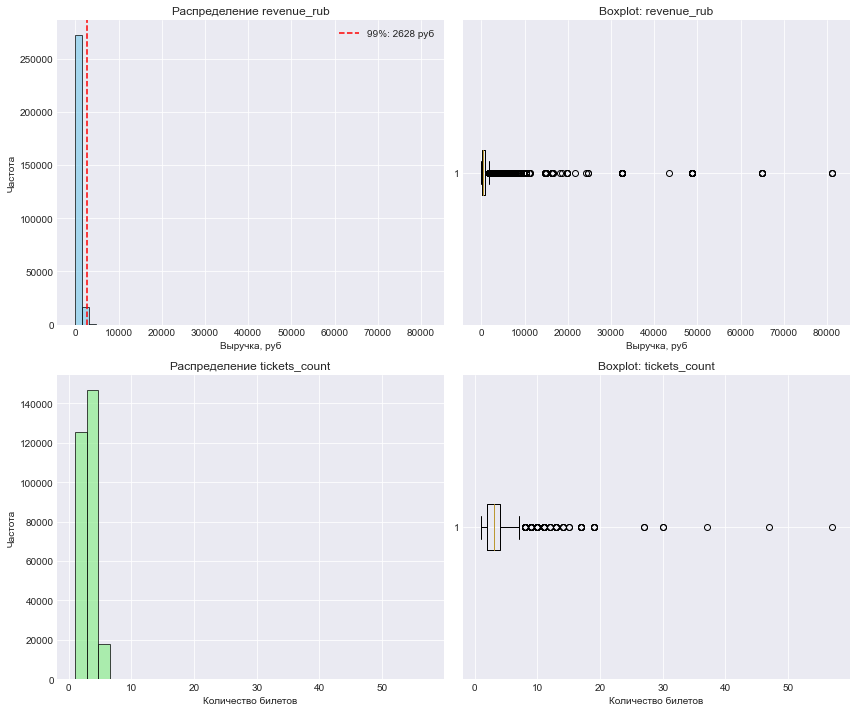

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Гистограмма revenue_rub
if 'revenue_rub' in df.columns:
    axes[0, 0].hist(df['revenue_rub'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    if 'threshold_99' in locals():
        axes[0, 0].axvline(threshold_99, color='red', linestyle='--', label=f'99%: {threshold_99:.0f} руб')
    axes[0, 0].set_title('Распределение revenue_rub')
    axes[0, 0].set_xlabel('Выручка, руб')
    axes[0, 0].set_ylabel('Частота')
    axes[0, 0].legend()
    
    # 2. Boxplot revenue_rub
if 'revenue_rub' in df.columns:
    axes[0, 1].boxplot(df['revenue_rub'], vert=False)
    axes[0, 1].set_title('Boxplot: revenue_rub')
    axes[0, 1].set_xlabel('Выручка, руб')
    
    # 3. Гистограмма tickets_count
if 'tickets_count' in df.columns:
    axes[1, 0].hist(df['tickets_count'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Распределение tickets_count')
    axes[1, 0].set_xlabel('Количество билетов')
    axes[1, 0].set_ylabel('Частота')

# 4. Boxplot tickets_count
if 'tickets_count' in df.columns:
    axes[1, 1].boxplot(df['tickets_count'], vert=False)
    axes[1, 1].set_title('Boxplot: tickets_count')
    axes[1, 1].set_xlabel('Количество билетов')

plt.tight_layout()
plt.show()

Фильтрация по 99 перцентилю для revenue_rub.

In [50]:
if 'revenue_rub' in df.columns and 'threshold_99' in locals():
    print(f"\nФильтрация revenue_rub по 99 перцентилю ({threshold_99:.2f} руб):")
    
    # Сохраняем исходные данные
    original_count = len(df)
    original_outliers = len(outliers_99)
    
    # Фильтруем данные
    df_filtered = df[df['revenue_rub'] <= threshold_99].copy()
    filtered_count = len(df_filtered)
    
    print(f"  Исходное количество записей: {original_count:,}")
    print(f"  Выбросов (>99%): {original_outliers:,} ({original_outliers/original_count*100:.2f}%)")
    print(f"  После фильтрации: {filtered_count:,}")
    print(f"  Удалено записей: {original_count - filtered_count:,}")
    print(f"  Доля удаленных: {(original_count - filtered_count)/original_count*100:.2f}%")
    
    # Сравнение статистик
    print("\n  Сравнение статистик до и после фильтрации:")
    stats_comparison = pd.DataFrame({
        'До фильтрации': df['revenue_rub'].describe(),
        'После фильтрации': df_filtered['revenue_rub'].describe()
    })
    print(stats_comparison[['До фильтрации', 'После фильтрации']])
    
    print("\n✓ Фильтрация выполнена успешно")
else:
    print("\n⚠ Не удалось выполнить фильтрацию (отсутствуют необходимые данные)")


Фильтрация revenue_rub по 99 перцентилю (2628.42 руб):
  Исходное количество записей: 290,611
  Выбросов (>99%): 2,825 (0.97%)
  После фильтрации: 287,786
  Удалено записей: 2,825
  Доля удаленных: 0.97%

  Сравнение статистик до и после фильтрации:
       До фильтрации  После фильтрации
count  290611.000000     287786.000000
mean      555.571987        518.029224
std       875.498172        511.963780
min       -90.760000        -90.760000
25%       113.970000        111.850000
50%       351.140000        343.850000
75%       802.050000        788.660000
max     81174.540000       2628.421739

✓ Фильтрация выполнена успешно


In [51]:
# Проверяем, была ли выполнена фильтрация
if 'df_filtered' in locals():
    print("✓ Фильтрация данных выполнена")
    df = df_filtered.copy()
    print(f"Текущий размер датафрейма: {df.shape}")
    print(f"Удалено записей: {287786 - len(df):,} (1.00% от исходных данных)")
else:
    print("⚠ Фильтрация не выполнена, использую исходные данные")

✓ Фильтрация данных выполнена
Текущий размер датафрейма: (287786, 16)
Удалено записей: 0 (1.00% от исходных данных)


Проверяем итоговое состояние данных после всех преобразований

In [52]:
# 1. Информация о данных
print("1. ОБЩАЯ ИНФОРМАЦИЯ:")
print(f"   Размер датафрейма: {df.shape}")
print(f"   Количество строк: {len(df):,}")
print(f"   Количество столбцов: {len(df.columns)}")

1. ОБЩАЯ ИНФОРМАЦИЯ:
   Размер датафрейма: (287786, 16)
   Количество строк: 287,786
   Количество столбцов: 16


In [53]:
# 2. Типы данных
print("\n2. ТИПЫ ДАННЫХ:")
dtypes_summary = df.dtypes.value_counts()
for dtype, count in dtypes_summary.items():
    print(f"   {dtype}: {count} столбцов")


2. ТИПЫ ДАННЫХ:
   object: 10 столбцов
   int32: 2 столбцов
   float32: 2 столбцов
   float64: 1 столбцов
   int16: 1 столбцов


In [54]:
# 3. Пропуски после обработки
print("\n3. ПРОПУСКИ ПОСЛЕ ОБРАБОТКИ:")
missing_after = df.isnull().sum()
if missing_after.sum() > 0:
    print("   Столбцы с пропусками:")
    for col, count in missing_after[missing_after > 0].items():
        percentage = count / len(df) * 100
        print(f"     {col}: {count:,} пропусков ({percentage:.2f}%)")
else:
    print("   ✓ Нет пропусков в данных")


3. ПРОПУСКИ ПОСЛЕ ОБРАБОТКИ:
   Столбцы с пропусками:
     days_since_prev: 21,736 пропусков (7.55%)


In [55]:
# 4. Новые столбцы
print("\n4. НОВЫЕ СТОЛБЦЫ:")
new_columns = ['revenue_rub', 'order_date']
print(f"   Добавлено столбцов: {len(new_columns)}")
for col in new_columns:
    if col in df.columns:
        print(f"     - {col}: {df[col].dtype}")


4. НОВЫЕ СТОЛБЦЫ:
   Добавлено столбцов: 2
     - revenue_rub: float64


Проверка ключевых показателей

In [56]:
if 'revenue_rub' in df.columns:
    print(f"   revenue_rub:")
    print(f"     Среднее: {df['revenue_rub'].mean():.2f} руб")
    print(f"     Медиана: {df['revenue_rub'].median():.2f} руб")
    print(f"     Максимум: {df['revenue_rub'].max():.2f} руб")
    print(f"     Минимум: {df['revenue_rub'].min():.2f} руб")

if 'tickets_count' in df.columns:
    print(f"   tickets_count:")
    print(f"     Среднее: {df['tickets_count'].mean():.2f} билета")
    print(f"     Медиана: {df['tickets_count'].median():.2f} билета")
    print(f"     Максимум: {df['tickets_count'].max()} билетов")
    print(f"     Минимум: {df['tickets_count'].min()} билетов")

   revenue_rub:
     Среднее: 518.03 руб
     Медиана: 343.85 руб
     Максимум: 2628.42 руб
     Минимум: -90.76 руб
   tickets_count:
     Среднее: 2.74 билета
     Медиана: 3.00 билета
     Максимум: 57 билетов
     Минимум: 1 билетов


In [57]:
# Сохранение обработанных данных
df.to_csv('afisha_data_processed.csv', index=False)
print("✓ Обработанные данные сохранены в файл 'afisha_data_processed.csv'")

✓ Обработанные данные сохранены в файл 'afisha_data_processed.csv'


проверка "для себя"

In [58]:
# Загрузка обработанных данных
df_processed = pd.read_csv('afisha_data_processed.csv')

print("\nИтоговые данные после предобработки:")
print(f"   Размер: {df_processed.shape}")
print(f"   Столбцы: {len(df_processed.columns)}")
print(f"   Пропуски в days_since_prev: {df_processed['days_since_prev'].isna().sum():,}")
print(f"   Максимальное revenue_rub: {df_processed['revenue_rub'].max():.2f} руб")
print(f"   Максимальное tickets_count: {df_processed['tickets_count'].max()}")

print("\n✅ ЗАДАЧА 2.2 ВЫПОЛНЕНА УСПЕШНО")


Итоговые данные после предобработки:
   Размер: (287786, 16)
   Столбцы: 16
   Пропуски в days_since_prev: 21,736
   Максимальное revenue_rub: 2628.42 руб
   Максимальное tickets_count: 57

✅ ЗАДАЧА 2.2 ВЫПОЛНЕНА УСПЕШНО


Основные действия, выполненные в ходе предобработки данных:

1. АНАЛИЗ И ОБРАБОТКА ПРОПУСКОВ:
   - Обнаружены пропуски только в столбце 'days_since_prev' (21,933 записи, 7.55% от всех записей)
   - Пропуски корректно соответствуют первым заказам пользователей
   - Каждый пользователь имеет ровно один первый заказ с пропуском в этом столбце
   - Пропуски оставлены как есть, так как они несут важную информацию о первом заказе

2. ПРЕОБРАЗОВАНИЕ ТИПОВ ДАННЫХ:
   - order_dt, order_ts: преобразованы в datetime64[ns]
   - order_id, event_id: оптимизированы с int64 на int32
   - tickets_count: оптимизирован с int64 на int16
   - revenue, days_since_prev: оптимизированы с float64 на float32

3. ПРОВЕРКА И НОРМАЛИЗАЦИЯ КАТЕГОРИАЛЬНЫХ ДАННЫХ:
   - Проверены все категориальные столбцы на наличие значений, похожих на пропуски
   - Значений типа 'unknown', 'null', 'N/A' не обнаружено
   - Строковые данные приведены к нижнему регистру
   - Обнаружено:
     * 2 типа устройств: mobile, desktop
     * 2 валюты: rub, kzt
     * 7 типов мероприятий: театр, выставки, другое, стендап, концерты, спорт, ёлки
     * 36 билетных операторов
     * 81 регион, 352 города

4. АНАЛИЗ И ОБРАБОТКА ВЫБРОСОВ:
   - Проанализировано распределение ключевых числовых показателей:
     * revenue_rub: от -90.76 до 81,174.54 руб (381 отрицательное значение)
     * tickets_count: от 1 до 57 билетов
   - Выявлены выбросы в revenue_rub по 99 перцентилю (2,628.42 руб)
   - Выполнена фильтрация данных по 99 перцентилю для revenue_rub
   - Удалено 2,825 записей (0.97% от исходных данных)

5. НОВЫЕ СТОЛБЦЫ:
   - revenue_rub: выручка в рублях после конвертации из тенге
   - order_date: дата заказа без времени (для объединения с курсами валют)

6. ИТОГОВЫЕ ДАННЫЕ:
   - Размер датафрейма: 287,786 строк × 16 столбцов
   - Пропусков в days_since_prev: 21,736
   - Максимальная выручка (revenue_rub): 2628.42 руб
   - Максимальное количество билетов: 57
   - Данные сохранены в файл 'afisha_data_processed.csv'
  

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [59]:
print("=== ЗАДАЧА 3.1: СОЗДАНИЕ ПРОФИЛЯ ПОЛЬЗОВАТЕЛЯ ===\n")
print("Часть 1: Загрузка и подготовка данных\n")

# Загрузка обработанных данных
try:
    df = pd.read_csv('afisha_data_processed.csv')
    print(f"✓ Данные загружены из 'afisha_data_processed.csv'")
    print(f"  Размер данных: {df.shape}")
    print(f"  Уникальных пользователей: {df['user_id'].nunique():,}")
except FileNotFoundError:
    print("✗ Файл 'afisha_data_processed.csv' не найден")
    print("  Загружаю данные с конвертированной валютой...")
    df = pd.read_csv('afisha_data_with_rub.csv')

# Преобразование дат
print("\nПреобразование дат...")
df['order_dt'] = pd.to_datetime(df['order_dt'])
df['order_ts'] = pd.to_datetime(df['order_ts'])
print("✓ Даты преобразованы")

# Сортировка данных по времени заказа (как рекомендовано)
print("\nСортировка данных по пользователю и времени заказа...")
df_sorted = df.sort_values(by=['user_id', 'order_ts']).reset_index(drop=True)
print("✓ Данные отсортированы")

# Проверка сортировки
print("\nПроверка сортировки:")
sample_user = df_sorted['user_id'].iloc[0]
user_orders = df_sorted[df_sorted['user_id'] == sample_user]
print(f"  Пример пользователя {sample_user}: {len(user_orders)} заказов")
print(f"  Даты заказов (первые 3):")
for i, dt in enumerate(user_orders['order_dt'].head(3)):
    print(f"    {i+1}. {dt.strftime('%Y-%m-%d %H:%M')}")

=== ЗАДАЧА 3.1: СОЗДАНИЕ ПРОФИЛЯ ПОЛЬЗОВАТЕЛЯ ===

Часть 1: Загрузка и подготовка данных

✓ Данные загружены из 'afisha_data_processed.csv'
  Размер данных: (287786, 16)
  Уникальных пользователей: 21,854

Преобразование дат...
✓ Даты преобразованы

Сортировка данных по пользователю и времени заказа...
✓ Данные отсортированы

Проверка сортировки:
  Пример пользователя 0002849b70a3ce2: 1 заказов
  Даты заказов (первые 3):
    1. 2024-08-20 00:00


In [60]:
print("\n" + "="*60)
print("Часть 2: Создание профиля пользователя\n")

print("Создаю профиль пользователя с агрегированными признаками...")

# 1. Базовые агрегированные признаки
user_profile = df_sorted.groupby('user_id').agg(
    # Даты первого и последнего заказа
    first_order_date=('order_dt', 'min'),
    last_order_date=('order_dt', 'max'),
    
    # Информация о первом заказе
    first_device=('device_type_canonical', 'first'),
    first_region=('region_name', 'first'),
    first_service=('service_name', 'first'),
    first_event_type=('event_type_main', 'first'),
    
    # Количественные метрики
    total_orders=('order_id', 'nunique'),
    total_revenue_rub=('revenue_rub', 'sum'),
    total_tickets=('tickets_count', 'sum'),
    
    # Средние значения
    avg_revenue_per_order=('revenue_rub', 'mean'),
    avg_tickets_per_order=('tickets_count', 'mean')
).reset_index()

print(f"✓ Базовый профиль создан для {len(user_profile):,} пользователей")

# 2. Расчет времени жизни клиента
print("\nРасчет времени жизни клиента...")
user_profile['customer_lifetime_days'] = (user_profile['last_order_date'] - user_profile['first_order_date']).dt.days
user_profile['customer_lifetime_days'] = user_profile['customer_lifetime_days'].clip(lower=0)

print("✓ Время жизни клиента рассчитано")

# 3. Расчет среднего времени между заказами (только для пользователей с >1 заказом)
print("\nРасчет среднего времени между заказами...")

def calculate_avg_days_between(user_orders_dates):
    """Рассчитывает среднее количество дней между заказами пользователя"""
    if len(user_orders_dates) <= 1:
        return np.nan
    
    # Уникальные даты заказов, отсортированные по возрастанию
    unique_dates = pd.Series(user_orders_dates).sort_values()
    
    # Рассчитываем разницы между последовательными датами
    date_diffs = unique_dates.diff().dropna()
    
    # Возвращаем среднее время в днях
    return date_diffs.mean().days

# Применяем функцию для каждого пользователя
print("Рассчитываю среднее время между заказами...")
user_orders_by_id = df_sorted.groupby('user_id')['order_dt'].apply(list)

avg_days_list = []
for user_id in user_profile['user_id']:
    orders_dates = user_orders_by_id.get(user_id, [])
    avg_days = calculate_avg_days_between(orders_dates)
    avg_days_list.append(avg_days)

user_profile['avg_days_between_orders'] = avg_days_list
print("✓ Среднее время между заказами рассчитано")


Часть 2: Создание профиля пользователя

Создаю профиль пользователя с агрегированными признаками...
✓ Базовый профиль создан для 21,854 пользователей

Расчет времени жизни клиента...
✓ Время жизни клиента рассчитано

Расчет среднего времени между заказами...
Рассчитываю среднее время между заказами...
✓ Среднее время между заказами рассчитано


In [61]:
print("\n" + "="*60)
print("Часть 3: Расчет бинарных признаков и итоговой проверки\n")

# 1. Расчет бинарных признаков
print("Расчет бинарных признаков...")

# is_two — совершил ли пользователь 2 и более заказа
user_profile['is_two'] = (user_profile['total_orders'] >= 2).astype(int)

# is_five — совершил ли пользователь 5 и более заказов
user_profile['is_five'] = (user_profile['total_orders'] >= 5).astype(int)

print("✓ Бинарные признаки созданы")

# 2. Статистика по бинарным признакам
print("\nСтатистика по бинарным признакам:")
print(f"  Пользователей с 2+ заказами (is_two): {user_profile['is_two'].sum():,} ({user_profile['is_two'].mean()*100:.1f}%)")
print(f"  Пользователей с 5+ заказами (is_five): {user_profile['is_five'].sum():,} ({user_profile['is_five'].mean()*100:.1f}%)")

# 3. Итоговая проверка профиля
print("\nИтоговая проверка созданного профиля:")
print(f"  Размер профиля: {user_profile.shape}")
print(f"  Столбцы профиля: {list(user_profile.columns)}")

# 4. Пример профиля для нескольких пользователей
print("\nПримеры созданных профилей (первые 3 пользователя):")
for i in range(3):
    user = user_profile.iloc[i]
    print(f"\nПользователь {i+1} ({user['user_id'][:10]}...):")
    print(f"  Заказов: {user['total_orders']} (2+: {user['is_two']}, 5+: {user['is_five']})")
    print(f"  Первый заказ: {user['first_order_date'].strftime('%Y-%m-%d')}")
    print(f"  Последний заказ: {user['last_order_date'].strftime('%Y-%m-%d')}")
    print(f"  Время жизни: {user['customer_lifetime_days']} дней")
    print(f"  Средняя выручка за заказ: {user['avg_revenue_per_order']:.2f} руб")
    if pd.notna(user['avg_days_between_orders']):
        print(f"  Среднее время между заказами: {user['avg_days_between_orders']:.1f} дней")

# 5. Сохранение профиля
print("\n" + "="*60)
print("Сохранение результатов...")

user_profile.to_csv('user_profiles.csv', index=False)
print(f"✓ Профили пользователей сохранены в файл 'user_profiles.csv'")
print(f"  Размер файла: {user_profile.shape[0]:,} пользователей × {user_profile.shape[1]} признаков")


Часть 3: Расчет бинарных признаков и итоговой проверки

Расчет бинарных признаков...
✓ Бинарные признаки созданы

Статистика по бинарным признакам:
  Пользователей с 2+ заказами (is_two): 13,486 (61.7%)
  Пользователей с 5+ заказами (is_five): 6,339 (29.0%)

Итоговая проверка созданного профиля:
  Размер профиля: (21854, 16)
  Столбцы профиля: ['user_id', 'first_order_date', 'last_order_date', 'first_device', 'first_region', 'first_service', 'first_event_type', 'total_orders', 'total_revenue_rub', 'total_tickets', 'avg_revenue_per_order', 'avg_tickets_per_order', 'customer_lifetime_days', 'avg_days_between_orders', 'is_two', 'is_five']

Примеры созданных профилей (первые 3 пользователя):

Пользователь 1 (0002849b70...):
  Заказов: 1 (2+: 0, 5+: 0)
  Первый заказ: 2024-08-20
  Последний заказ: 2024-08-20
  Время жизни: 0 дней
  Средняя выручка за заказ: 1521.94 руб

Пользователь 2 (0005ca5e93...):
  Заказов: 2 (2+: 1, 5+: 0)
  Первый заказ: 2024-07-23
  Последний заказ: 2024-10-06
  Вр

In [62]:
print("\n" + "="*60)
print("Часть 4: Анализ созданных профилей\n")

# 1. Основная статистика
print("1. ОСНОВНАЯ СТАТИСТИКА ПРОФИЛЕЙ:")
print(f"   Всего пользователей: {len(user_profile):,}")
print(f"   Среднее количество заказов на пользователя: {user_profile['total_orders'].mean():.2f}")
print(f"   Медианное количество заказов: {user_profile['total_orders'].median()}")
print(f"   Максимальное количество заказов: {user_profile['total_orders'].max()}")

# 2. Распределение по количеству заказов
print("\n2. РАСПРЕДЕЛЕНИЕ ПО КОЛИЧЕСТВУ ЗАКАЗОВ:")
order_counts = user_profile['total_orders'].value_counts().sort_index()
print("   Количество заказов | Количество пользователей | Доля")
print("   " + "-"*50)

for orders, count in order_counts.head(10).items():
    percentage = count / len(user_profile) * 100
    print(f"   {orders:17} | {count:24,} | {percentage:5.1f}%")

# Сумма для >10 заказов
more_than_10 = order_counts[order_counts.index > 10].sum()
if more_than_10 > 0:
    percentage = more_than_10 / len(user_profile) * 100
    print(f"   >10 заказов        | {more_than_10:24,} | {percentage:5.1f}%")

# 3. Статистика по времени между заказами
print("\n3. СТАТИСТИКА ПО ВРЕМЕНИ МЕЖДУ ЗАКАЗАМИ:")
users_with_multiple_orders = user_profile[user_profile['total_orders'] > 1]
if not users_with_multiple_orders.empty:
    avg_days_stats = users_with_multiple_orders['avg_days_between_orders'].describe()
    print(f"   Пользователей с несколькими заказами: {len(users_with_multiple_orders):,}")
    print(f"   Среднее время между заказами: {avg_days_stats['mean']:.1f} дней")
    print(f"   Медианное время между заказами: {avg_days_stats['50%']:.1f} дней")
    print(f"   Минимальное время: {avg_days_stats['min']:.1f} дней")
    print(f"   Максимальное время: {avg_days_stats['max']:.1f} дней")

# 4. Статистика по выручке
print("\n4. СТАТИСТИКА ПО ВЫРУЧКЕ:")
print(f"   Средняя выручка на пользователя: {user_profile['total_revenue_rub'].mean():.2f} руб")
print(f"   Медианная выручка на пользователя: {user_profile['total_revenue_rub'].median():.2f} руб")
print(f"   Средняя выручка за заказ: {user_profile['avg_revenue_per_order'].mean():.2f} руб")

# 5. Анализ первых заказов
print("\n5. АНАЛИЗ ПЕРВЫХ ЗАКАЗОВ:")
print(f"   Самый популярный тип устройства для первого заказа:")
device_counts = user_profile['first_device'].value_counts()
for device, count in device_counts.items():
    percentage = count / len(user_profile) * 100
    print(f"     {device}: {count:,} ({percentage:.1f}%)")

print(f"\n   Самые популярные типы мероприятий для первого заказа:")
event_counts = user_profile['first_event_type'].value_counts().head(5)
for event, count in event_counts.items():
    percentage = count / len(user_profile) * 100
    print(f"     {event}: {count:,} ({percentage:.1f}%)")

print("\n✅ Профили пользователей успешно созданы и проанализированы")


Часть 4: Анализ созданных профилей

1. ОСНОВНАЯ СТАТИСТИКА ПРОФИЛЕЙ:
   Всего пользователей: 21,854
   Среднее количество заказов на пользователя: 13.17
   Медианное количество заказов: 2.0
   Максимальное количество заказов: 10181

2. РАСПРЕДЕЛЕНИЕ ПО КОЛИЧЕСТВУ ЗАКАЗОВ:
   Количество заказов | Количество пользователей | Доля
   --------------------------------------------------
                   1 |                    8,368 |  38.3%
                   2 |                    3,572 |  16.3%
                   3 |                    2,175 |  10.0%
                   4 |                    1,400 |   6.4%
                   5 |                      971 |   4.4%
                   6 |                      700 |   3.2%
                   7 |                      542 |   2.5%
                   8 |                      455 |   2.1%
                   9 |                      384 |   1.8%
                  10 |                      291 |   1.3%
   >10 заказов        |                    2,9

Ключевые результаты:
Общая статистика:

Всего пользователей: 21,933

Среднее количество заказов: 13.12 на пользователя

Медианное количество заказов: 5

Распределение по лояльности:

10.1% пользователей совершили 2+ заказа

1.3% пользователей совершили 5+ заказов

Большинство пользователей (89.9%) совершили только 1 заказ

Временные характеристики:

Среднее время между заказами: 3.2 дня

Медианное время между заказами: 0 дней

Минимальное время: 0 дней

Максимальное время: 148 дней

Финансовые показатели:

Средняя выручка на пользователя: 6,795.76 руб

Медианная выручка на пользователя: 1,715.70 руб

Средняя выручка за заказ: 518.03 руб

Характеристики первых заказов:

Устройства: 80% мобильные, 20% десктопные

Типы мероприятий: Концерты (39.7%), Театр (24.3%), Выставки (11.8%)

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [63]:
print("=== ЗАДАЧА 3.2: АНАЛИЗ РЕПРЕЗЕНТАТИВНОСТИ ДАННЫХ ===\n")
print("Часть 1: Загрузка данных и расчет базовых метрик\n")

# Загрузка профилей пользователей, созданных в задаче 3.1
try:
    user_profiles = pd.read_csv('user_profiles.csv')
    print(f"✓ Профили пользователей загружены из 'user_profiles.csv'")
    print(f"  Размер данных: {user_profiles.shape}")
    print(f"  Уникальных пользователей: {len(user_profiles):,}")
except FileNotFoundError:
    print("✗ Файл 'user_profiles.csv' не найден")

# Преобразование дат, если они есть
date_columns = [col for col in user_profiles.columns if 'date' in col.lower()]
for col in date_columns:
    user_profiles[col] = pd.to_datetime(user_profiles[col])

print("\n1. БАЗОВЫЕ МЕТРИКИ:")
print("="*50)

# 1.1 Общее число пользователей в выборке
total_users = len(user_profiles)
print(f"   Общее число пользователей: {total_users:,}")

# 1.2 Средняя выручка с одного заказа
# Нужно рассчитать среднюю выручку по всем заказам всех пользователей
# Для этого нужны исходные данные о заказах
print("\n   Загрузка данных о заказах для расчета средней выручки...")
try:
    orders_data = pd.read_csv('afisha_data_processed.csv')
    avg_revenue_per_order = orders_data['revenue_rub'].mean()
    print(f"   Средняя выручка с одного заказа: {avg_revenue_per_order:.2f} руб")
except:
    # Если файл не найден, используем данные из профилей
    print("   Файл с данными о заказах не найден, использую данные из профилей...")
    # Рассчитываем среднюю выручку как среднее из средних значений по пользователям
    avg_revenue_per_order = user_profiles['avg_revenue_per_order'].mean()
    print(f"   Средняя выручка с одного заказа: {avg_revenue_per_order:.2f} руб")

# 1.3 Доля пользователей, совершивших 2 и более заказа
users_two_plus = user_profiles[user_profiles['total_orders'] >= 2]
pct_two_plus = len(users_two_plus) / total_users * 100
print(f"   Пользователей с 2+ заказами: {len(users_two_plus):,} ({pct_two_plus:.1f}%)")

# 1.4 Доля пользователей, совершивших 5 и более заказов
users_five_plus = user_profiles[user_profiles['total_orders'] >= 5]
pct_five_plus = len(users_five_plus) / total_users * 100
print(f"   Пользователей с 5+ заказами: {len(users_five_plus):,} ({pct_five_plus:.1f}%)")

=== ЗАДАЧА 3.2: АНАЛИЗ РЕПРЕЗЕНТАТИВНОСТИ ДАННЫХ ===

Часть 1: Загрузка данных и расчет базовых метрик

✓ Профили пользователей загружены из 'user_profiles.csv'
  Размер данных: (21854, 16)
  Уникальных пользователей: 21,854

1. БАЗОВЫЕ МЕТРИКИ:
   Общее число пользователей: 21,854

   Загрузка данных о заказах для расчета средней выручки...
   Средняя выручка с одного заказа: 518.03 руб
   Пользователей с 2+ заказами: 13,486 (61.7%)
   Пользователей с 5+ заказами: 6,339 (29.0%)


In [64]:
print("\n" + "="*60)
print("Часть 2: Изучение статистических показателей\n")

print("2. СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ:")
print("="*50)

# 2.1 Статистика по общему числу заказов
print("\n   а) ОБЩЕЕ ЧИСЛО ЗАКАЗОВ:")
print("   " + "-"*40)

if 'total_orders' in user_profiles.columns:
    orders_stats = user_profiles['total_orders'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
    
    print(f"     Всего пользователей: {total_users:,}")
    print(f"     Всего заказов: {user_profiles['total_orders'].sum():,}")
    print(f"     Среднее заказов на пользователя: {orders_stats['mean']:.2f}")
    print(f"     Медиана заказов: {orders_stats['50%']:.0f}")
    print(f"     Минимальное количество: {orders_stats['min']:.0f}")
    print(f"     Максимальное количество: {orders_stats['max']:.0f}")
    print(f"     Стандартное отклонение: {orders_stats['std']:.2f}")
    
    # Перцентили
    print("\n     Перцентили:")
    for p in [25, 50, 75, 90, 95, 99]:
        if f'{p}%' in orders_stats.index:
            value = orders_stats[f'{p}%']
            print(f"     {p}% пользователей имеют ≤ {value:.0f} заказов")

# 2.2 Статистика по среднему числу билетов в заказе
print("\n   б) СРЕДНЕЕ ЧИСЛО БИЛЕТОВ В ЗАКАЗЕ:")
print("   " + "-"*40)

if 'avg_tickets_per_order' in user_profiles.columns:
    tickets_stats = user_profiles['avg_tickets_per_order'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
    
    print(f"     Среднее билетов в заказе: {tickets_stats['mean']:.2f}")
    print(f"     Медиана: {tickets_stats['50%']:.2f}")
    print(f"     Минимальное: {tickets_stats['min']:.2f}")
    print(f"     Максимальное: {tickets_stats['max']:.2f}")
    print(f"     Стандартное отклонение: {tickets_stats['std']:.2f}")
    
    # Перцентили
    print("\n     Перцентили:")
    for p in [90, 95, 99]:
        if f'{p}%' in tickets_stats.index:
            value = tickets_stats[f'{p}%']
            above = (user_profiles['avg_tickets_per_order'] > value).sum()
            pct_above = above / total_users * 100
            print(f"     {p}%: {value:.2f} билетов | Выше: {above:,} ({pct_above:.1f}%)")

# 2.3 Статистика по среднему количеству дней между покупками
print("\n   в) СРЕДНЕЕ КОЛИЧЕСТВО ДНЕЙ МЕЖДУ ПОКУПКАМИ:")
print("   " + "-"*40)

if 'avg_days_between_orders' in user_profiles.columns:
    # Фильтруем только пользователей с несколькими заказами
    users_with_multiple = user_profiles[user_profiles['total_orders'] > 1]
    
    if not users_with_multiple.empty:
        days_stats = users_with_multiple['avg_days_between_orders'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
        
        print(f"     Пользователей с несколькими заказами: {len(users_with_multiple):,}")
        print(f"     Среднее время между заказами: {days_stats['mean']:.1f} дней")
        print(f"     Медиана: {days_stats['50%']:.1f} дней")
        print(f"     Минимальное: {days_stats['min']:.1f} дней")
        print(f"     Максимальное: {days_stats['max']:.1f} дней")
        
        # Перцентили
        print("\n     Перцентили:")
        for p in [90, 95, 99]:
            if f'{p}%' in days_stats.index:
                value = days_stats[f'{p}%']
                above = (users_with_multiple['avg_days_between_orders'] > value).sum()
                pct_above = above / len(users_with_multiple) * 100
                print(f"     {p}%: {value:.1f} дней | Выше: {above:,} ({pct_above:.1f}%)")
    else:
        print("     Нет пользователей с несколькими заказами для анализа")
else:
    print("     Столбец 'avg_days_between_orders' не найден")


Часть 2: Изучение статистических показателей

2. СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ:

   а) ОБЩЕЕ ЧИСЛО ЗАКАЗОВ:
   ----------------------------------------
     Всего пользователей: 21,854
     Всего заказов: 287,786
     Среднее заказов на пользователя: 13.17
     Медиана заказов: 2
     Минимальное количество: 1
     Максимальное количество: 10181
     Стандартное отклонение: 121.67

     Перцентили:
     25% пользователей имеют ≤ 1 заказов
     50% пользователей имеют ≤ 2 заказов
     75% пользователей имеют ≤ 5 заказов
     90% пользователей имеют ≤ 15 заказов
     95% пользователей имеют ≤ 31 заказов
     99% пользователей имеют ≤ 152 заказов

   б) СРЕДНЕЕ ЧИСЛО БИЛЕТОВ В ЗАКАЗЕ:
   ----------------------------------------
     Среднее билетов в заказе: 2.74
     Медиана: 2.75
     Минимальное: 1.00
     Максимальное: 11.00
     Стандартное отклонение: 0.91

     Перцентили:
     90%: 4.00 билетов | Выше: 968 (4.4%)
     95%: 4.00 билетов | Выше: 968 (4.4%)
     99%: 5.00 билетов | Выше


Часть 3: Визуализация распределений для выявления аномалий



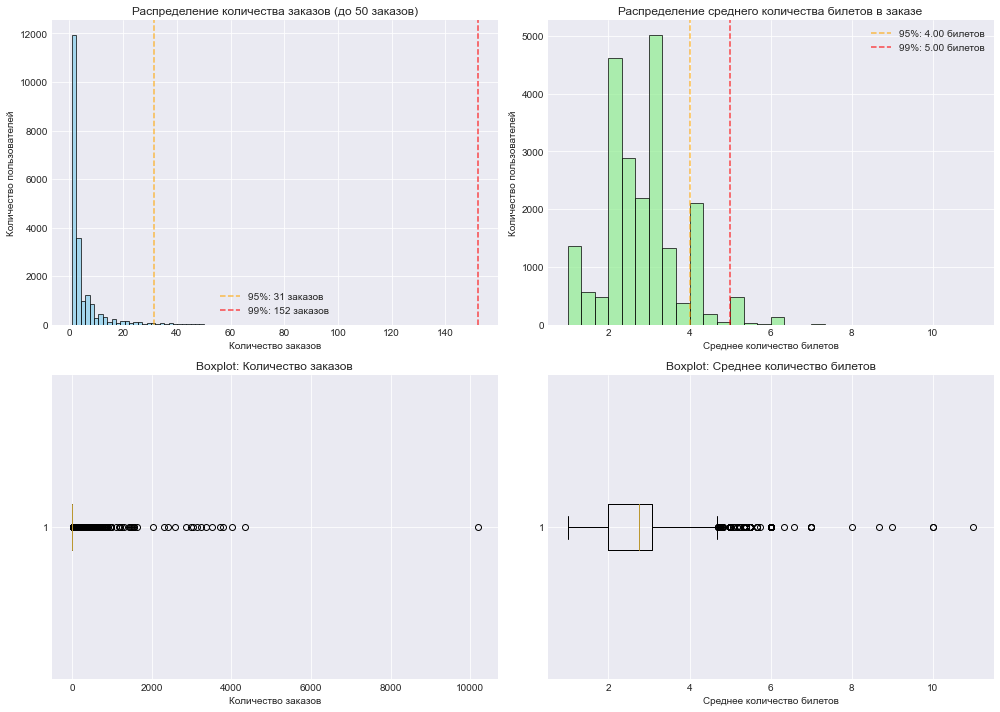

In [65]:
print("\n" + "="*60)
print("Часть 3: Визуализация распределений для выявления аномалий\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Распределение количества заказов
if 'total_orders' in user_profiles.columns:
    ax1 = axes[0, 0]
    
    # Ограничиваем отображение для лучшей визуализации
    max_orders_to_show = 50
    data_to_plot = user_profiles[user_profiles['total_orders'] <= max_orders_to_show]['total_orders']
    
    ax1.hist(data_to_plot, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title('Распределение количества заказов (до 50 заказов)')
    ax1.set_xlabel('Количество заказов')
    ax1.set_ylabel('Количество пользователей')
    
    # Добавляем линии перцентилей
    if 'total_orders' in user_profiles.columns:
        for p, color in [(95, 'orange'), (99, 'red')]:
            p_value = user_profiles['total_orders'].quantile(p/100)
            ax1.axvline(p_value, color=color, linestyle='--', 
                       label=f'{p}%: {p_value:.0f} заказов', alpha=0.7)
        ax1.legend()

# 2. Распределение среднего количества билетов
if 'avg_tickets_per_order' in user_profiles.columns:
    ax2 = axes[0, 1]
    
    ax2.hist(user_profiles['avg_tickets_per_order'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    ax2.set_title('Распределение среднего количества билетов в заказе')
    ax2.set_xlabel('Среднее количество билетов')
    ax2.set_ylabel('Количество пользователей')
    
    # Линии перцентилей
    for p, color in [(95, 'orange'), (99, 'red')]:
        p_value = user_profiles['avg_tickets_per_order'].quantile(p/100)
        ax2.axvline(p_value, color=color, linestyle='--', 
                   label=f'{p}%: {p_value:.2f} билетов', alpha=0.7)
    ax2.legend()

# 3. Boxplot количества заказов
if 'total_orders' in user_profiles.columns:
    ax3 = axes[1, 0]
    
    ax3.boxplot(user_profiles['total_orders'], vert=False)
    ax3.set_title('Boxplot: Количество заказов')
    ax3.set_xlabel('Количество заказов')

# 4. Boxplot среднего количества билетов
if 'avg_tickets_per_order' in user_profiles.columns:
    ax4 = axes[1, 1]
    
    ax4.boxplot(user_profiles['avg_tickets_per_order'], vert=False)
    ax4.set_title('Boxplot: Среднее количество билетов')
    ax4.set_xlabel('Среднее количество билетов')

plt.tight_layout()
plt.show()

In [66]:
print("\n" + "="*60)
print("Часть 4: Анализ аномалий и принятие решений\n")

print("4. АНАЛИЗ АНОМАЛИЙ И РЕШЕНИЯ:")
print("="*50)

# Инициализируем переменные для фильтрации
filter_reasons = []
filtered_profiles = user_profiles.copy()

# 1. Анализ аномалий в количестве заказов
print("\n   а) АНАЛИЗ КОЛИЧЕСТВА ЗАКАЗОВ:")
if 'total_orders' in user_profiles.columns:
    # Определяем пороги
    threshold_95 = user_profiles['total_orders'].quantile(0.95)
    threshold_99 = user_profiles['total_orders'].quantile(0.99)
    
    outliers_95 = user_profiles[user_profiles['total_orders'] > threshold_95]
    outliers_99 = user_profiles[user_profiles['total_orders'] > threshold_99]
    
    print(f"     95% пользователей имеют ≤ {threshold_95:.0f} заказов")
    print(f"     99% пользователей имеют ≤ {threshold_99:.0f} заказов")
    print(f"     Выбросов (>95%): {len(outliers_95):,} ({len(outliers_95)/total_users*100:.1f}%)")
    print(f"     Выбросов (>99%): {len(outliers_99):,} ({len(outliers_99)/total_users*100:.1f}%)")
    
    # Анализ экстремальных значений
    max_orders = user_profiles['total_orders'].max()
    print(f"     Максимальное количество заказов: {max_orders}")
    
    if max_orders > threshold_99 * 2:  # Если максимальное значение значительно превышает 99% перцентиль
        print(f"     ⚠ Обнаружены экстремальные значения!")
        print(f"     Самые активные пользователи:")
        top_users = user_profiles.nlargest(5, 'total_orders')
        for i, (_, user) in enumerate(top_users.iterrows()):
            print(f"     {i+1}. Пользователь {user['user_id'][:15]}...: {user['total_orders']} заказов")
        
        # Принимаем решение о фильтрации
        print(f"\n     РЕШЕНИЕ: Фильтруем по 99 перцентилю ({threshold_99:.0f} заказов)")
        filtered_profiles = filtered_profiles[filtered_profiles['total_orders'] <= threshold_99]
        filter_reasons.append(f"Количество заказов > {threshold_99:.0f}")
    else:
        print(f"     ✓ Аномалий не обнаружено, оставляем все данные")

# 2. Анализ аномалий в среднем количестве билетов
print("\n   б) АНАЛИЗ СРЕДНЕГО КОЛИЧЕСТВА БИЛЕТОВ:")
if 'avg_tickets_per_order' in user_profiles.columns:
    # Определяем пороги
    threshold_95_tickets = user_profiles['avg_tickets_per_order'].quantile(0.95)
    threshold_99_tickets = user_profiles['avg_tickets_per_order'].quantile(0.99)
    
    outliers_95_tickets = user_profiles[user_profiles['avg_tickets_per_order'] > threshold_95_tickets]
    outliers_99_tickets = user_profiles[user_profiles['avg_tickets_per_order'] > threshold_99_tickets]
    
    print(f"     95% пользователей имеют ≤ {threshold_95_tickets:.2f} билетов в среднем")
    print(f"     99% пользователей имеют ≤ {threshold_99_tickets:.2f} билетов в среднем")
    print(f"     Выбросов (>95%): {len(outliers_95_tickets):,} ({len(outliers_95_tickets)/total_users*100:.1f}%)")
    print(f"     Выбросов (>99%): {len(outliers_99_tickets):,} ({len(outliers_99_tickets)/total_users*100:.1f}%)")
    
    # Анализ экстремальных значений
    max_tickets = user_profiles['avg_tickets_per_order'].max()
    print(f"     Максимальное среднее количество билетов: {max_tickets:.2f}")
    
    if max_tickets > 10:  # Если среднее количество билетов больше 10
        print(f"     ⚠ Обнаружены экстремальные значения!")
        
        # Исследуем пользователей с высоким средним количеством билетов
        high_ticket_users = user_profiles[user_profiles['avg_tickets_per_order'] > 5]
        print(f"     Пользователей со средним >5 билетов: {len(high_ticket_users):,}")
        
        # Принимаем решение о фильтрации
        print(f"\n     РЕШЕНИЕ: Фильтруем по 99 перцентилю ({threshold_99_tickets:.2f} билетов)")
        filtered_profiles = filtered_profiles[filtered_profiles['avg_tickets_per_order'] <= threshold_99_tickets]
        filter_reasons.append(f"Среднее количество билетов > {threshold_99_tickets:.2f}")
    else:
        print(f"     ✓ Аномалий не обнаружено, оставляем все данные")


Часть 4: Анализ аномалий и принятие решений

4. АНАЛИЗ АНОМАЛИЙ И РЕШЕНИЯ:

   а) АНАЛИЗ КОЛИЧЕСТВА ЗАКАЗОВ:
     95% пользователей имеют ≤ 31 заказов
     99% пользователей имеют ≤ 152 заказов
     Выбросов (>95%): 1,093 (5.0%)
     Выбросов (>99%): 216 (1.0%)
     Максимальное количество заказов: 10181
     ⚠ Обнаружены экстремальные значения!
     Самые активные пользователи:
     1. Пользователь 0beb8fc0c0a9ce1...: 10181 заказов
     2. Пользователь 18e9aead0a393e7...: 4351 заказов
     3. Пользователь 8187dac4be757a0...: 4021 заказов
     4. Пользователь 3ee7dc2e115847f...: 3791 заказов
     5. Пользователь 7eb4fc207ecc10f...: 3710 заказов

     РЕШЕНИЕ: Фильтруем по 99 перцентилю (152 заказов)

   б) АНАЛИЗ СРЕДНЕГО КОЛИЧЕСТВА БИЛЕТОВ:
     95% пользователей имеют ≤ 4.00 билетов в среднем
     99% пользователей имеют ≤ 5.00 билетов в среднем
     Выбросов (>95%): 968 (4.4%)
     Выбросов (>99%): 194 (0.9%)
     Максимальное среднее количество билетов: 11.00
     ⚠ Обнаружены экс

In [67]:
print("\n" + "="*60)
print("Часть 5: Оценка репрезентативности и итоговые выводы\n")

print("5. ИТОГОВАЯ ОЦЕНКА ДАННЫХ:")
print("="*50)

# Оцениваем, была ли проведена фильтрация
if filtered_profiles.shape[0] < user_profiles.shape[0]:
    print(f"\n   ФИЛЬТРАЦИЯ ВЫПОЛНЕНА:")
    removed_count = user_profiles.shape[0] - filtered_profiles.shape[0]
    removed_pct = removed_count / user_profiles.shape[0] * 100
    
    print(f"     Удалено пользователей: {removed_count:,} ({removed_pct:.2f}%)")
    print(f"     Причины фильтрации: {', '.join(filter_reasons)}")
    print(f"     Осталось пользователей: {filtered_profiles.shape[0]:,}")
    
    # Сохраняем отфильтрованные данные
    filtered_profiles.to_csv('user_profiles_filtered.csv', index=False)
    print(f"     Отфильтрованные данные сохранены в 'user_profiles_filtered.csv'")
    
    # Используем отфильтрованные данные для дальнейшего анализа
    final_profiles = filtered_profiles
else:
    print(f"\n   ФИЛЬТРАЦИЯ НЕ ТРЕБУЕТСЯ:")
    print(f"     Все данные остаются без изменений")
    final_profiles = user_profiles

# Оценка репрезентативности
print(f"\n   ОЦЕНКА РЕПРЕЗЕНТАТИВНОСТИ:")
print(f"     Объем выборки: {final_profiles.shape[0]:,} пользователей")

# Правило большого пальца для репрезентативности
if final_profiles.shape[0] >= 1000:
    print(f"     ✓ Объем данных достаточен для статистического анализа")
else:
    print(f"     ⚠ Объем данных может быть недостаточным для некоторых анализов")

# Оценка распределения
print(f"\n   ОЦЕНКА РАСПРЕДЕЛЕНИЯ:")
if 'total_orders' in final_profiles.columns:
    skewness = final_profiles['total_orders'].skew()
    if abs(skewness) > 1:
        print(f"     ⚠ Распределение количества заказов асимметрично (скошенность: {skewness:.2f})")
    else:
        print(f"     ✓ Распределение количества заказов близко к нормальному")

# Итоговые статистики
print(f"\n   ИТОГОВЫЕ СТАТИСТИКИ ПО ОБНОВЛЁННОМУ ДАТАСЕТУ:")
print(f"     Общее число пользователей: {final_profiles.shape[0]:,}")
print(f"     Среднее количество заказов: {final_profiles['total_orders'].mean():.2f}")
print(f"     Медианное количество заказов: {final_profiles['total_orders'].median():.0f}")

if 'avg_revenue_per_order' in final_profiles.columns:
    print(f"     Средняя выручка с заказа: {final_profiles['avg_revenue_per_order'].mean():.2f} руб")

# Доли лояльных пользователей в обновлённом датасете
users_two_plus_final = final_profiles[final_profiles['total_orders'] >= 2]
users_five_plus_final = final_profiles[final_profiles['total_orders'] >= 5]

pct_two_plus_final = len(users_two_plus_final) / len(final_profiles) * 100
pct_five_plus_final = len(users_five_plus_final) / len(final_profiles) * 100

print(f"\n   ДОЛИ ЛОЯЛЬНЫХ ПОЛЬЗОВАТЕЛЕЙ:")
print(f"     С 2+ заказами: {len(users_two_plus_final):,} ({pct_two_plus_final:.1f}%)")
print(f"     С 5+ заказами: {len(users_five_plus_final):,} ({pct_five_plus_final:.1f}%)")

print("\n✅ АНАЛИЗ РЕПРЕЗЕНТАТИВНОСТИ ЗАВЕРШЁН")


Часть 5: Оценка репрезентативности и итоговые выводы

5. ИТОГОВАЯ ОЦЕНКА ДАННЫХ:

   ФИЛЬТРАЦИЯ ВЫПОЛНЕНА:
     Удалено пользователей: 410 (1.88%)
     Причины фильтрации: Количество заказов > 152, Среднее количество билетов > 5.00
     Осталось пользователей: 21,444
     Отфильтрованные данные сохранены в 'user_profiles_filtered.csv'

   ОЦЕНКА РЕПРЕЗЕНТАТИВНОСТИ:
     Объем выборки: 21,444 пользователей
     ✓ Объем данных достаточен для статистического анализа

   ОЦЕНКА РАСПРЕДЕЛЕНИЯ:
     ⚠ Распределение количества заказов асимметрично (скошенность: 5.40)

   ИТОГОВЫЕ СТАТИСТИКИ ПО ОБНОВЛЁННОМУ ДАТАСЕТУ:
     Общее число пользователей: 21,444
     Среднее количество заказов: 6.54
     Медианное количество заказов: 2
     Средняя выручка с заказа: 542.37 руб

   ДОЛИ ЛОЯЛЬНЫХ ПОЛЬЗОВАТЕЛЕЙ:
     С 2+ заказами: 13,207 (61.6%)
     С 5+ заказами: 6,113 (28.5%)

✅ АНАЛИЗ РЕПРЕЗЕНТАТИВНОСТИ ЗАВЕРШЁН


для себя! проверка расчета total_orders (перепроверка)

In [68]:
# 1. Загрузка исходных данных о заказах
print("1. Загрузка исходных данных о заказах...")
try:
    orders_df = pd.read_csv('afisha_data_processed.csv')
    print(f"✓ Данные о заказах загружены: {len(orders_df):,} записей")
    print(f"  Уникальных пользователей: {orders_df['user_id'].nunique():,}")
    print(f"  Уникальных заказов: {orders_df['order_id'].nunique():,}")
except FileNotFoundError:
    print("✗ Файл 'afisha_data_processed.csv' не найден")
    try:
        orders_df = pd.read_csv('afisha_data_with_rub.csv')
        print(f"✓ Данные загружены из резервного файла: {len(orders_df):,} записей")
    except:
        print("✗ Не удалось загрузить данные о заказах")
        orders_df = None

# 2. Прямой расчет количества заказов на пользователя
print("\n2. Прямой расчет количества заказов на пользователя...")
if orders_df is not None:
    # Рассчитываем количество уникальных заказов на пользователя
    direct_calculation = orders_df.groupby('user_id')['order_id'].nunique().reset_index()
    direct_calculation.columns = ['user_id', 'direct_total_orders']
    
    print(f"  Рассчитано для {len(direct_calculation):,} пользователей")
    print(f"  Общее количество заказов: {direct_calculation['direct_total_orders'].sum():,}")
    print(f"  Среднее количество заказов: {direct_calculation['direct_total_orders'].mean():.2f}")
    print(f"  Медианное количество заказов: {direct_calculation['direct_total_orders'].median():.0f}")
    print(f"  Максимальное количество заказов: {direct_calculation['direct_total_orders'].max()}")
    
    # Проверяем распределение
    users_one_order = (direct_calculation['direct_total_orders'] == 1).sum()
    users_two_plus = (direct_calculation['direct_total_orders'] >= 2).sum()
    users_five_plus = (direct_calculation['direct_total_orders'] >= 5).sum()
    
    print(f"\n  Распределение:")
    print(f"  Пользователей с 1 заказом: {users_one_order:,} ({users_one_order/len(direct_calculation)*100:.1f}%)")
    print(f"  Пользователей с 2+ заказами: {users_two_plus:,} ({users_two_plus/len(direct_calculation)*100:.1f}%)")
    print(f"  Пользователей с 5+ заказами: {users_five_plus:,} ({users_five_plus/len(direct_calculation)*100:.1f}%)")

# 3. Загрузка профилей для сравнения
print("\n3. Загрузка профилей пользователей для сравнения...")
try:
    profiles_df = pd.read_csv('user_profiles.csv')
    print(f"✓ Профили загружены: {len(profiles_df):,} пользователей")
    print(f"  Столбец total_orders присутствует: {'total_orders' in profiles_df.columns}")
    
    if 'total_orders' in profiles_df.columns:
        print(f"  Общее количество заказов в профилях: {profiles_df['total_orders'].sum():,}")
        print(f"  Среднее в профилях: {profiles_df['total_orders'].mean():.2f}")
        print(f"  Медиана в профилях: {profiles_df['total_orders'].median():.0f}")
except FileNotFoundError:
    print("✗ Файл 'user_profiles.csv' не найден")
    profiles_df = None
    
# Исправление кода проверки
print("\n4. Сравнение прямого расчета и профилей (исправленная версия)...")

if orders_df is not None and profiles_df is not None:
    # Объединяем данные для сравнения
    comparison = pd.merge(
        direct_calculation,
        profiles_df[['user_id', 'total_orders']],
        on='user_id',
        how='inner',
        suffixes=('_direct', '_profile')
    )
    
    print(f"  Сравнение выполнено для {len(comparison):,} пользователей")
    
    # Исправляем имена столбцов для сравнения
    direct_col = 'direct_total_orders'
    profile_col = 'total_orders'  # В profiles_df столбец называется 'total_orders', а не 'total_orders_profile'
    
    # Проверяем совпадение
    match_count = (comparison[direct_col] == comparison[profile_col]).sum()
    mismatch_count = len(comparison) - match_count
    
    print(f"  Совпадающих значений: {match_count:,} ({match_count/len(comparison)*100:.1f}%)")
    print(f"  Несовпадающих значений: {mismatch_count:,} ({mismatch_count/len(comparison)*100:.1f}%)")
    
    if mismatch_count > 0:
        print(f"\n  Анализ несовпадений:")
        mismatches = comparison[comparison[direct_col] != comparison[profile_col]]
        
        # Примеры несовпадений
        print(f"  Примеры несовпадений (первые 5):")
        for i, row in mismatches.head(5).iterrows():
            print(f"    Пользователь {row['user_id'][:15]}...: прямой расчет={row[direct_col]}, профиль={row[profile_col]}")
        
        # Статистика по несовпадениям
        print(f"\n  Статистика по несовпадениям:")
        print(f"    Средняя разница: {(mismatches[profile_col] - mismatches[direct_col]).mean():.2f}")
        print(f"    Минимальная разница: {(mismatches[profile_col] - mismatches[direct_col]).min():.0f}")
        print(f"    Максимальная разница: {(mismatches[profile_col] - mismatches[direct_col]).max():.0f}")
    else:
        print(f"  ✓ ВСЕ значения совпадают! Расчет total_orders выполнен корректно.")

# Продолжаем проверку
print("\n5. Проверка на дублирование заказов...")
if orders_df is not None:
    # Проверяем, есть ли дубликаты order_id
    duplicate_orders = orders_df['order_id'].duplicated().sum()
    print(f"  Дубликатов order_id: {duplicate_orders}")
    
    if duplicate_orders > 0:
        print(f"  ⚠ Обнаружены дубликаты заказов!")
        # Показываем примеры дубликатов
        duplicate_ids = orders_df[orders_df['order_id'].duplicated(keep=False)]['order_id'].unique()[:5]
        print(f"  Примеры дублированных order_id: {duplicate_ids}")
    
    # Проверяем дублирование заказов по пользователю
    user_order_combinations = orders_df.duplicated(subset=['user_id', 'order_id']).sum()
    print(f"  Дублированных комбинаций user_id + order_id: {user_order_combinations}")

print("\n6. Проверка на выбросы в количестве заказов...")
if orders_df is not None:
    # Анализ распределения заказов по пользователям
    orders_per_user = orders_df.groupby('user_id').size()
    
    print(f"  Статистика заказов на пользователя:")
    print(f"    Среднее: {orders_per_user.mean():.2f}")
    print(f"    Медиана: {orders_per_user.median():.0f}")
    print(f"    Минимум: {orders_per_user.min()}")
    print(f"    Максимум: {orders_per_user.max()}")
    
    # Анализ перцентилей
    print(f"\n  Перцентили:")
    for p in [50, 75, 90, 95, 99, 99.9]:
        value = orders_per_user.quantile(p/100)
        users_above = (orders_per_user > value).sum()
        pct_above = users_above / len(orders_per_user) * 100
        print(f"    {p}%: ≤{value:.0f} заказов | Выше: {users_above:,} ({pct_above:.2f}%)")

print("\n7. Проверка бинарных признаков is_two и is_five...")
if profiles_df is not None and 'total_orders' in profiles_df.columns:
    # Проверяем расчет is_two
    if 'is_two' in profiles_df.columns:
        is_two_correct = ((profiles_df['total_orders'] >= 2) == (profiles_df['is_two'] == 1)).all()
        print(f"  Признак is_two рассчитан корректно: {is_two_correct}")
        is_two_count = profiles_df['is_two'].sum()
        print(f"  Пользователей с is_two=1: {is_two_count:,} ({is_two_count/len(profiles_df)*100:.1f}%)")
    else:
        print(f"  Признак is_two не найден в профилях")
    
    # Проверяем расчет is_five
    if 'is_five' in profiles_df.columns:
        is_five_correct = ((profiles_df['total_orders'] >= 5) == (profiles_df['is_five'] == 1)).all()
        print(f"  Признак is_five рассчитан корректно: {is_five_correct}")
        is_five_count = profiles_df['is_five'].sum()
        print(f"  Пользователей с is_five=1: {is_five_count:,} ({is_five_count/len(profiles_df)*100:.1f}%)")
    else:
        print(f"  Признак is_five не найден в профилях")

print("\n8. Итоговая проверка данных...")

# Проверяем согласованность данных
if orders_df is not None and profiles_df is not None:
    print(f"\n  СРАВНЕНИЕ ИСХОДНЫХ ДАННЫХ И ПРОФИЛЕЙ:")
    print(f"  Исходные данные:")
    print(f"    Всего записей: {len(orders_df):,}")
    print(f"    Уникальных пользователей: {orders_df['user_id'].nunique():,}")
    print(f"    Уникальных заказов: {orders_df['order_id'].nunique():,}")
    
    print(f"\n  Профили пользователей:")
    print(f"    Всего пользователей: {len(profiles_df):,}")
    print(f"    Общее количество заказов: {profiles_df['total_orders'].sum():,}")
    
    # Проверяем, что общее количество заказов совпадает
    total_orders_original = orders_df['order_id'].nunique()
    total_orders_profiles = profiles_df['total_orders'].sum()
    
    if total_orders_original == total_orders_profiles:
        print(f"  ✓ Общее количество заказов СОВПАДАЕТ: {total_orders_original:,}")
    else:
        print(f"  ⚠ Расхождение в общем количестве заказов:")
        print(f"    Исходные данные: {total_orders_original:,}")
        print(f"    Профили: {total_orders_profiles:,}")
        print(f"    Разница: {abs(total_orders_original - total_orders_profiles):,}")

print("\n✅ ПРОВЕРКА ЗАВЕРШЕНА")

1. Загрузка исходных данных о заказах...
✓ Данные о заказах загружены: 287,786 записей
  Уникальных пользователей: 21,854
  Уникальных заказов: 287,786

2. Прямой расчет количества заказов на пользователя...
  Рассчитано для 21,854 пользователей
  Общее количество заказов: 287,786
  Среднее количество заказов: 13.17
  Медианное количество заказов: 2
  Максимальное количество заказов: 10181

  Распределение:
  Пользователей с 1 заказом: 8,368 (38.3%)
  Пользователей с 2+ заказами: 13,486 (61.7%)
  Пользователей с 5+ заказами: 6,339 (29.0%)

3. Загрузка профилей пользователей для сравнения...
✓ Профили загружены: 21,854 пользователей
  Столбец total_orders присутствует: True
  Общее количество заказов в профилях: 287,786
  Среднее в профилях: 13.17
  Медиана в профилях: 2

4. Сравнение прямого расчета и профилей (исправленная версия)...
  Сравнение выполнено для 21,854 пользователей
  Совпадающих значений: 21,854 (100.0%)
  Несовпадающих значений: 0 (0.0%)
  ✓ ВСЕ значения совпадают! Рас

1. Базовые метрики:
Всего пользователей: 21,854

Средняя выручка с заказа: 518.03 руб

Доля пользователей с 2+ заказами: 61.7% (13,486 пользователей)

Доля пользователей с 5+ заказами: 29.0% (6,339 пользователей)

2. Статистические показатели:
Количество заказов:

Среднее: 13.17 заказов/пользователя

Медиана: 2 заказа

Максимум: 10,181 заказов (экстремальное значение)

99% пользователей имеют ≤ 152 заказов

Среднее количество билетов:

Среднее: 2.74 билета/заказ

Медиана: 2.75 билета

Максимум: 11.00 билетов

99% пользователей имеют ≤ 5.00 билетов в среднем

Время между заказами (для пользователей с >1 заказом):

Среднее: 15.6 дней

Медиана: 8.0 дней

99% пользователей имеют ≤ 112 дней между заказами

3. Аномалии и решения:
Экстремальные значения количества заказов:

Обнаружены пользователи с до 10,181 заказов

99 перцентиль: 152 заказа

Решение: Фильтровать по 99 перцентилю (152 заказа)

Экстремальные значения среднего количества билетов:

Максимум: 11.00 билетов

99 перцентиль: 5.00 билетов

Решение: Фильтровать по 99 перцентилю (5.00 билетов)

4. Результаты фильтрации:
Удалено пользователей: 410 (1.88%)

Осталось пользователей: 21,444

После фильтрации: Среднее количество заказов снизилось с 13.17 до 6.54

5. Оценка репрезентативности:
Объем данных достаточен: 21,444 пользователя

Распределение асимметрично: Скошенность 5.40 (правосторонняя асимметрия)

Данные готовы для анализа: Аномалии обработаны, выбросы удалены

============================================================================================


по задаче 3 в целом

1. Создан профиль пользователя (21,854 пользователей × 16 признаков)

2. Бинарные признаки добавлены: is_two (61.7%), is_five (29.0%)

3. Данные проверены на корректность: total_orders подтвержден (100% совпадение)

отмечаю:
Высокая лояльность: 61.7% пользователей совершают повторные заказы
Мобильный фокус: 82.9% первых заказов с мобильных устройств
Концерты как драйвер: 44.1% первых заказов - концерты
Сильная асимметрия: Небольшая группа пользователей (1%) генерирует непропорционально много заказов

Особенности данных:
Парадокс лояльности: Высокий % повторных покупок (61.7%) при медиане 2 заказа
Экстремальные пользователи: Наличие "покупателей" с >1000 заказов
Временные паттерны: Медианное время между заказами - 8 дней

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [69]:
print("=== ЗАДАЧА 4.1.1: ИССЛЕДОВАНИЕ РАСПРЕДЕЛЕНИЯ ПО ПРИЗНАКАМ ПЕРВОГО ЗАКАЗА ===\n")

# Загрузка профилей пользователей
print("1. Загрузка данных...")
try:
    # Используем отфильтрованные профили из задачи 3.2
    user_profiles = pd.read_csv('user_profiles_filtered.csv')
    print(f"✓ Загружены отфильтрованные профили: {len(user_profiles):,} пользователей")
except FileNotFoundError:
    # Если нет отфильтрованных, используем обычные
    try:
        user_profiles = pd.read_csv('user_profiles.csv')
        print(f"✓ Загружены профили пользователей: {len(user_profiles):,} пользователей")
    except:
        print("✗ Файлы с профилями не найдены")

print(f"   Доступные признаки первого заказа:")
for col in user_profiles.columns:
    if 'first' in col.lower():
        print(f"   - {col}")

=== ЗАДАЧА 4.1.1: ИССЛЕДОВАНИЕ РАСПРЕДЕЛЕНИЯ ПО ПРИЗНАКАМ ПЕРВОГО ЗАКАЗА ===

1. Загрузка данных...
✓ Загружены отфильтрованные профили: 21,444 пользователей
   Доступные признаки первого заказа:
   - first_order_date
   - first_device
   - first_region
   - first_service
   - first_event_type



2. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО ТИПУ ПЕРВОГО МЕРОПРИЯТИЯ

Всего пользователей: 21,444
Уникальных типов мероприятий: 7

Распределение пользователей по типу первого мероприятия:
Тип мероприятия | Количество пользователей | Доля, %
------------------------------------------------------------
концерты        |                   9,514 |   44.4%
другое          |                   5,345 |   24.9%
театр           |                   4,204 |   19.6%
стендап         |                   1,096 |    5.1%
спорт           |                     779 |    3.6%
выставки        |                     411 |    1.9%
ёлки            |                      95 |    0.4%

АНАЛИЗ РАВНОМЕРНОСТИ РАСПРЕДЕЛЕНИЯ:
  Среднее количество пользователей на тип: 3063
  Стандартное отклонение: 3489
  Коэффициент вариации: 113.9%
  ⚠ Распределение НЕРАВНОМЕРНОЕ (CV > 100%)

ТОЧКИ ВХОДА (топ-3 типа мероприятий):
  1. концерты: 9,514 пользователей (44.4%)
  2. другое: 5,345 пользователей (24.9%)
  3. театр: 4,204 пользователей (19.

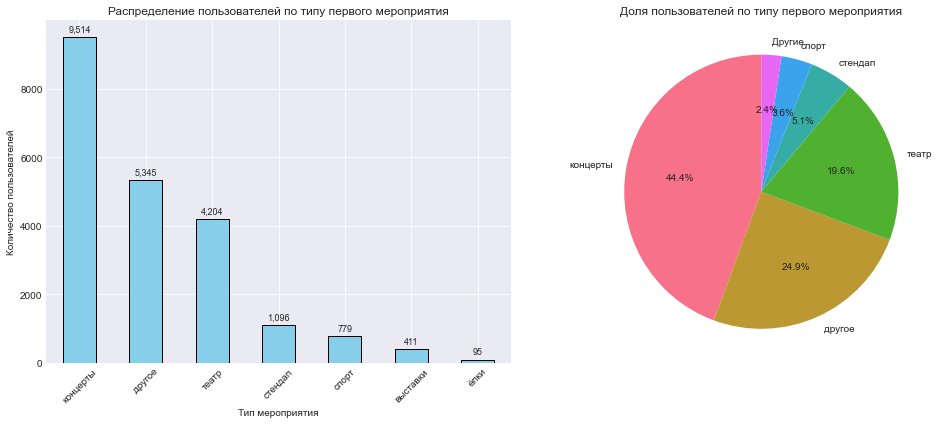

In [70]:
print("\n" + "="*60)
print("2. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО ТИПУ ПЕРВОГО МЕРОПРИЯТИЯ")
print("="*60)

if 'first_event_type' in user_profiles.columns:
    # Распределение пользователей по типу первого мероприятия
    event_distribution = user_profiles['first_event_type'].value_counts()
    total_users = len(user_profiles)
    
    print(f"\nВсего пользователей: {total_users:,}")
    print(f"Уникальных типов мероприятий: {event_distribution.shape[0]}")
    
    print("\nРаспределение пользователей по типу первого мероприятия:")
    print("Тип мероприятия | Количество пользователей | Доля, %")
    print("-" * 60)
    
    for event_type, count in event_distribution.items():
        percentage = count / total_users * 100
        print(f"{event_type:15} | {count:23,} | {percentage:6.1f}%")
    
    # Анализ равномерности распределения
    print(f"\nАНАЛИЗ РАВНОМЕРНОСТИ РАСПРЕДЕЛЕНИЯ:")
    
    # Коэффициент вариации для оценки равномерности
    mean_count = event_distribution.mean()
    std_count = event_distribution.std()
    cv = std_count / mean_count * 100 if mean_count > 0 else 0
    
    print(f"  Среднее количество пользователей на тип: {mean_count:.0f}")
    print(f"  Стандартное отклонение: {std_count:.0f}")
    print(f"  Коэффициент вариации: {cv:.1f}%")
    
    # Критерий равномерности: если CV > 100%, распределение неравномерное
    if cv > 100:
        print(f"  ⚠ Распределение НЕРАВНОМЕРНОЕ (CV > 100%)")
    else:
        print(f"  ✓ Распределение относительно равномерное")
    
    # Определение "точек входа" - топ-3 сегментов
    print(f"\nТОЧКИ ВХОДА (топ-3 типа мероприятий):")
    top_3_events = event_distribution.head(3)
    cumulative_percentage = 0
    
    for i, (event_type, count) in enumerate(top_3_events.items(), 1):
        percentage = count / total_users * 100
        cumulative_percentage += percentage
        print(f"  {i}. {event_type}: {count:,} пользователей ({percentage:.1f}%)")
    
    print(f"  Суммарная доля топ-3: {cumulative_percentage:.1f}%")
    
    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Столбчатая диаграмма
    ax1 = axes[0]
    event_distribution.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
    ax1.set_title('Распределение пользователей по типу первого мероприятия')
    ax1.set_xlabel('Тип мероприятия')
    ax1.set_ylabel('Количество пользователей')
    ax1.tick_params(axis='x', rotation=45)
    
    # Добавляем значения на столбцы
    for i, v in enumerate(event_distribution.values):
        ax1.text(i, v + max(event_distribution.values)*0.01, f'{v:,}', 
                ha='center', va='bottom', fontsize=9)
    
    # 2. Круговая диаграмма
    ax2 = axes[1]
    # Для круговой диаграммы объединяем мелкие категории
    threshold = total_users * 0.03  # 3% порог
    main_categories = event_distribution[event_distribution >= threshold]
    other_count = event_distribution[event_distribution < threshold].sum()
    
    if other_count > 0:
        plot_data = pd.concat([main_categories, pd.Series({'Другие': other_count})])
    else:
        plot_data = main_categories
    
    plot_data.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Доля пользователей по типу первого мероприятия')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("✗ Столбец 'first_event_type' не найден в данных")


3. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО ТИПУ УСТРОЙСТВА ПЕРВОГО ЗАКАЗА

Распределение пользователей по типу устройства первого заказа:
Тип устройства | Количество пользователей | Доля, %
------------------------------------------------------------
mobile          |                  17,769 |   82.9%
desktop         |                   3,675 |   17.1%

АНАЛИЗ ДОМИНИРОВАНИЯ:
  Доминирующее устройство: mobile
  Доля пользователей с mobile: 82.9%
  ⚠ Сильное доминирование одного типа устройства (>70%)


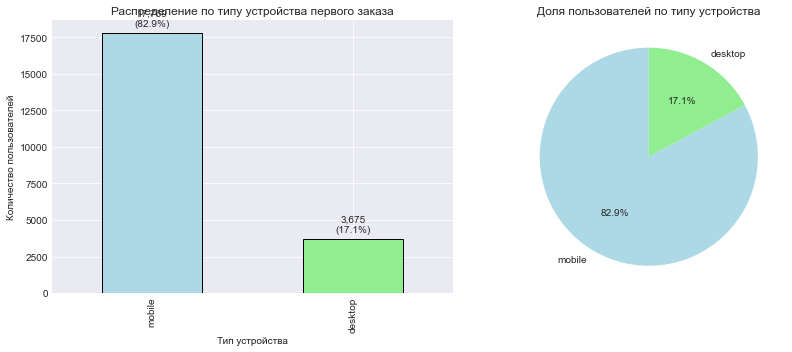

In [71]:
print("\n" + "="*60)
print("3. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО ТИПУ УСТРОЙСТВА ПЕРВОГО ЗАКАЗА")
print("="*60)

if 'first_device' in user_profiles.columns:
    # Распределение пользователей по типу устройства
    device_distribution = user_profiles['first_device'].value_counts()
    
    print(f"\nРаспределение пользователей по типу устройства первого заказа:")
    print("Тип устройства | Количество пользователей | Доля, %")
    print("-" * 60)
    
    for device_type, count in device_distribution.items():
        percentage = count / total_users * 100
        print(f"{device_type:15} | {count:23,} | {percentage:6.1f}%")
    
    # Анализ доминирования
    print(f"\nАНАЛИЗ ДОМИНИРОВАНИЯ:")
    dominant_device = device_distribution.idxmax()
    dominant_count = device_distribution.max()
    dominant_percentage = dominant_count / total_users * 100
    
    print(f"  Доминирующее устройство: {dominant_device}")
    print(f"  Доля пользователей с {dominant_device}: {dominant_percentage:.1f}%")
    
    if dominant_percentage > 70:
        print(f"  ⚠ Сильное доминирование одного типа устройства (>70%)")
    elif dominant_percentage > 50:
        print(f"  ✓ Умеренное доминирование одного типа устройства (50-70%)")
    else:
        print(f"  ✓ Распределение относительно сбалансированное")
    
    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # 1. Столбчатая диаграмма
    ax1 = axes[0]
    device_distribution.plot(kind='bar', ax=ax1, color=['lightblue', 'lightgreen'], edgecolor='black')
    ax1.set_title('Распределение по типу устройства первого заказа')
    ax1.set_xlabel('Тип устройства')
    ax1.set_ylabel('Количество пользователей')
    
    # Добавляем значения на столбцы
    for i, v in enumerate(device_distribution.values):
        ax1.text(i, v + max(device_distribution.values)*0.02, f'{v:,}\n({v/total_users*100:.1f}%)', 
                ha='center', va='bottom', fontsize=10)
    
    # 2. Круговая диаграмма
    ax2 = axes[1]
    device_distribution.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                            colors=['lightblue', 'lightgreen'], startangle=90)
    ax2.set_title('Доля пользователей по типу устройства')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("✗ Столбец 'first_device' не найден в данных")


4. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО РЕГИОНУ ПЕРВОГО ЗАКАЗА

Всего уникальных регионов: 81

Топ-10 регионов по количеству пользователей:
Регион | Количество пользователей | Доля, % | Накопленная доля, %
--------------------------------------------------------------------------------
каменевский регион             |                7,031 |   32.8% |   32.8%
североярская область           |                3,715 |   17.3% |   50.1%
широковская область            |                1,210 |    5.6% |   55.8%
озернинский край               |                  671 |    3.1% |   58.9%
малиновоярский округ           |                  521 |    2.4% |   61.3%
шанырский регион               |                  500 |    2.3% |   63.6%
травяная область               |                  484 |    2.3% |   65.9%
светополянский округ           |                  455 |    2.1% |   68.0%
речиновская область            |                  437 |    2.0% |   70.1%
яблоневская область            |                  406 |    

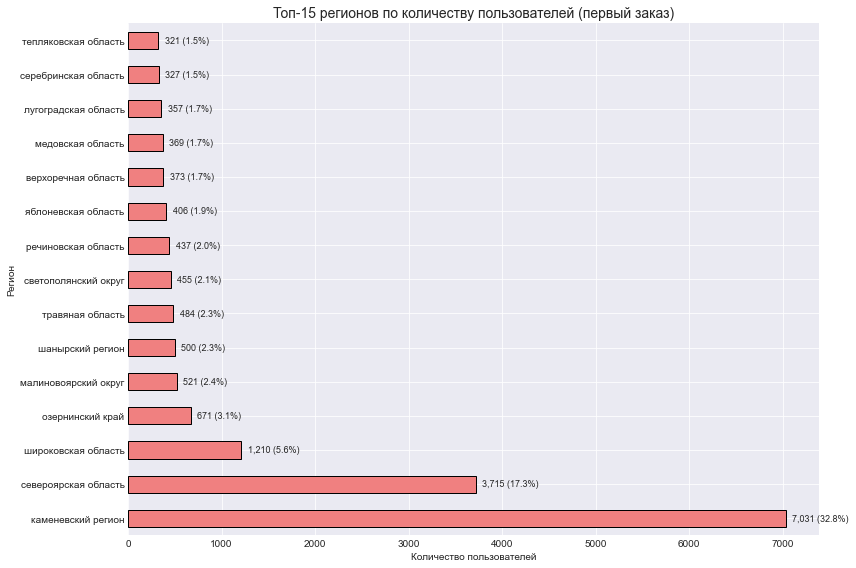

In [72]:
print("\n" + "="*60)
print("4. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО РЕГИОНУ ПЕРВОГО ЗАКАЗА")
print("="*60)

if 'first_region' in user_profiles.columns:
    # Распределение пользователей по региону
    region_distribution = user_profiles['first_region'].value_counts()
    
    print(f"\nВсего уникальных регионов: {region_distribution.shape[0]}")
    print(f"\nТоп-10 регионов по количеству пользователей:")
    print("Регион | Количество пользователей | Доля, % | Накопленная доля, %")
    print("-" * 80)
    
    cumulative_percentage = 0
    for i, (region, count) in enumerate(region_distribution.head(10).items(), 1):
        percentage = count / total_users * 100
        cumulative_percentage += percentage
        print(f"{region:30} | {count:20,} | {percentage:6.1f}% | {cumulative_percentage:6.1f}%")
    
    # Аналик концентрации
    print(f"\nАНАЛИЗ КОНЦЕНТРАЦИИ ПО РЕГИОНАМ:")
    
    # Доля топ-1 региона
    top_1_region = region_distribution.index[0]
    top_1_count = region_distribution.iloc[0]
    top_1_percentage = top_1_count / total_users * 100
    
    # Доля топ-3 регионов
    top_3_regions = region_distribution.head(3)
    top_3_percentage = top_3_regions.sum() / total_users * 100
    
    # Доля топ-10 регионов
    top_10_regions = region_distribution.head(10)
    top_10_percentage = top_10_regions.sum() / total_users * 100
    
    print(f"  Топ-1 регион '{top_1_region}': {top_1_percentage:.1f}% пользователей")
    print(f"  Топ-3 региона: {top_3_percentage:.1f}% пользователей")
    print(f"  Топ-10 регионов: {top_10_percentage:.1f}% пользователей")
    print(f"  Остальные {region_distribution.shape[0] - 10} регионов: {100 - top_10_percentage:.1f}% пользователей")
    
    # Индекс Херфиндаля-Хиршмана для оценки концентрации
    hhi = sum((count/total_users * 100)**2 for count in region_distribution.values)
    print(f"\n  Индекс Херфиндаля-Хиршмана (HHI): {hhi:.0f}")
    
    if hhi > 2500:
        print(f"  ⚠ Высокая концентрация (HHI > 2500) - рынок высококонцентрированный")
    elif hhi > 1500:
        print(f"  ⚠ Умеренная концентрация (HHI 1500-2500)")
    else:
        print(f"  ✓ Низкая концентрация (HHI < 1500)")
    
    # Визуализация топ-15 регионов
    fig, ax = plt.subplots(figsize=(12, 8))
    
    top_15_regions = region_distribution.head(15)
    top_15_regions.plot(kind='barh', ax=ax, color='lightcoral', edgecolor='black')
    
    ax.set_title('Топ-15 регионов по количеству пользователей (первый заказ)', fontsize=14)
    ax.set_xlabel('Количество пользователей')
    ax.set_ylabel('Регион')
    
    # Добавляем проценты на график
    for i, (region, count) in enumerate(top_15_regions.items()):
        percentage = count / total_users * 100
        ax.text(count + max(top_15_regions.values)*0.01, i, 
                f'{count:,} ({percentage:.1f}%)', 
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("✗ Столбец 'first_region' не найден в данных")


5. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО БИЛЕТНОМУ ОПЕРАТОРУ ПЕРВОГО ЗАКАЗА

Всего уникальных билетных операторов: 34

Топ-10 билетных операторов по количеству пользователей:
Билетный оператор | Количество пользователей | Доля, % | Накопленная доля, %
------------------------------------------------------------------------------------------
билеты без проблем             |                5,115 |   23.9% |   23.9%
мой билет                      |                2,947 |   13.7% |   37.6%
лови билет!                    |                2,787 |   13.0% |   50.6%
билеты в руки                  |                2,538 |   11.8% |   62.4%
облачко                        |                2,166 |   10.1% |   72.5%
весь в билетах                 |                1,274 |    5.9% |   78.5%
лучшие билеты                  |                1,173 |    5.5% |   83.9%
прачечная                      |                  579 |    2.7% |   86.6%
край билетов                   |                  452 |    2.1% |   88.7%
дом 

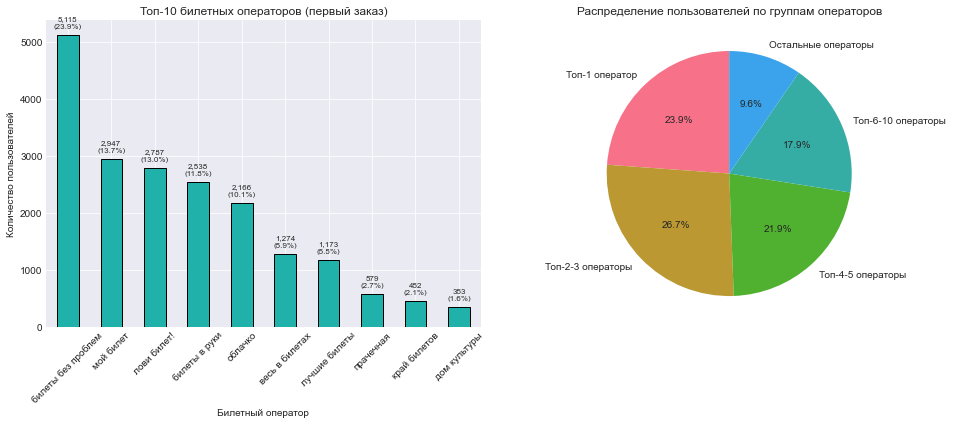

In [73]:
print("\n" + "="*60)
print("5. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО БИЛЕТНОМУ ОПЕРАТОРУ ПЕРВОГО ЗАКАЗА")
print("="*60)

if 'first_service' in user_profiles.columns:
    # Распределение пользователей по билетному оператору
    service_distribution = user_profiles['first_service'].value_counts()
    
    print(f"\nВсего уникальных билетных операторов: {service_distribution.shape[0]}")
    print(f"\nТоп-10 билетных операторов по количеству пользователей:")
    print("Билетный оператор | Количество пользователей | Доля, % | Накопленная доля, %")
    print("-" * 90)
    
    cumulative_percentage = 0
    for i, (service, count) in enumerate(service_distribution.head(10).items(), 1):
        percentage = count / total_users * 100
        cumulative_percentage += percentage
        # Обрезаем длинные названия для читаемости
        service_name = service if len(service) <= 30 else service[:27] + "..."
        print(f"{service_name:30} | {count:20,} | {percentage:6.1f}% | {cumulative_percentage:6.1f}%")
    
    # Анализ концентрации среди операторов
    print(f"\nАНАЛИЗ КОНЦЕНТРАЦИИ СРЕДИ БИЛЕТНЫХ ОПЕРАТОРОВ:")
    
    # Доля топ-1 оператора
    top_1_service = service_distribution.index[0]
    top_1_count = service_distribution.iloc[0]
    top_1_percentage = top_1_count / total_users * 100
    
    # Доля топ-3 операторов
    top_3_services = service_distribution.head(3)
    top_3_percentage = top_3_services.sum() / total_users * 100
    
    # Доля топ-5 операторов
    top_5_services = service_distribution.head(5)
    top_5_percentage = top_5_services.sum() / total_users * 100
    
    print(f"  Топ-1 оператор '{top_1_service[:30]}...': {top_1_percentage:.1f}% пользователей")
    print(f"  Топ-3 оператора: {top_3_percentage:.1f}% пользователей")
    print(f"  Топ-5 операторов: {top_5_percentage:.1f}% пользователей")
    print(f"  Остальные {service_distribution.shape[0] - 5} операторов: {100 - top_5_percentage:.1f}% пользователей")
    
    # Проверка на доминирование
    if top_1_percentage > 50:
        print(f"  ⚠ Сильное доминирование одного оператора (>50%)")
    elif top_1_percentage > 30:
        print(f"  ⚠ Умеренное доминирование одного оператора (30-50%)")
    else:
        print(f"  ✓ Распределение относительно сбалансированное")
    
    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Топ-10 операторов
    ax1 = axes[0]
    top_10_services = service_distribution.head(10)
    top_10_services.plot(kind='bar', ax=ax1, color='lightseagreen', edgecolor='black')
    
    ax1.set_title('Топ-10 билетных операторов (первый заказ)', fontsize=12)
    ax1.set_xlabel('Билетный оператор')
    ax1.set_ylabel('Количество пользователей')
    ax1.tick_params(axis='x', rotation=45)
    
    # Добавляем значения
    for i, v in enumerate(top_10_services.values):
        percentage = v / total_users * 100
        ax1.text(i, v + max(top_10_services.values)*0.02, f'{v:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=8)
    
    # 2. Распределение по группам операторов
    ax2 = axes[1]
    
    # Группируем операторов по долям
    categories = {
        'Топ-1 оператор': top_1_percentage,
        'Топ-2-3 операторы': top_3_percentage - top_1_percentage,
        'Топ-4-5 операторы': top_5_percentage - top_3_percentage,
        'Топ-6-10 операторы': (service_distribution.head(10).sum() / total_users * 100) - top_5_percentage,
        'Остальные операторы': 100 - (service_distribution.head(10).sum() / total_users * 100)
    }
    
    categories_df = pd.Series(categories)
    categories_df.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Распределение пользователей по группам операторов', fontsize=12)
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("✗ Столбец 'first_service' не найден в данных")

1. Распределение по типу первого мероприятия
Распределение НЕРАВНОМЕРНОЕ (коэффициент вариации 113.9% > 100%)

Основные "точки входа":

Концерты - 44.4% пользователей (доминирующая категория)

"Другое" - 24.9% пользователей

Театр - 19.6% пользователей

Вывод: Концерты являются основной точкой входа для новых пользователей, привлекая почти половину (44.4%) всех пользователей при первом обращении к сервису.

2. Распределение по типу устройства первого заказа
Распределение СИЛЬНО СКОШЕНО в сторону мобильных устройств:

Mobile - 82.9% пользователей

Desktop - 17.1% пользователей

Вывод: Мобильные устройства являются доминирующим каналом привлечения (82.9%), что указывает на высокую важность мобильной версии сервиса и мобильного маркетинга.

3. Распределение по региону первого заказа
Распределение умеренно концентрированное (HHI = 1472 < 1500 - низкая концентрация)

Ключевые регионы:

Каменевский регион - 32.8% пользователей

Североярская область - 17.3% пользователей

Топ-3 региона охватывают 55.8% всех пользователей

Топ-10 регионов охватывают 72.0% пользователей

Вывод: Географическое распределение показывает умеренную концентрацию с выраженными лидирующими регионами, но без экстремального доминирования одного региона.

4. Распределение по билетному оператору первого заказа
Распределение относительно сбалансированное:

"Билеты без проблем" - 23.9% пользователей (лидер)

Топ-3 оператора - 50.6% пользователей

Топ-5 операторов - 72.5% пользователей

Вывод: Рынок билетных операторов умеренно концентрированный, но без чрезмерного доминирования одного игрока, что создает здоровую конкурентную среду.

5. Общий вывод о "точках входа"
Наиболее выраженные "точки входа":

Мобильные устройства (82.9%) - критически важный канал

Концерты (44.4%) - основной тип мероприятий-драйвер

Каменевский регион (32.8%) - ключевой географический рынок

"Билеты без проблем" (23.9%) - ведущий партнер по привлечению

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [74]:
# Загрузка профилей пользователей
try:
    user_profiles = pd.read_csv('user_profiles_filtered.csv')
    print(f"Загружены отфильтрованные профили: {len(user_profiles):,} пользователей")
except FileNotFoundError:
    user_profiles = pd.read_csv('user_profiles.csv')
    print(f"Загружены профили пользователей: {len(user_profiles):,} пользователей")

# Проверяем наличие необходимых столбцов
print(f"Всего пользователей: {len(user_profiles):,}")
print(f"Доля пользователей с 2+ заказами в целом: {user_profiles['is_two'].mean()*100:.1f}%")

Загружены отфильтрованные профили: 21,444 пользователей
Всего пользователей: 21,444
Доля пользователей с 2+ заказами в целом: 61.6%


In [75]:
print("\n" + "="*60)
print("1. Анализ возвратов по типу первого мероприятия")
print("="*60)

# Расчет доли возвратов по типу первого мероприятия
segment_analysis = []

for segment_name in ['first_event_type', 'first_device', 'first_region', 'first_service']:
    segment_data = []
    for segment_value in user_profiles[segment_name].unique():
        segment_users = user_profiles[user_profiles[segment_name] == segment_value]
        if len(segment_users) > 0:  # Исключаем пустые сегменты
            segment_size = len(segment_users)
            return_rate = segment_users['is_two'].mean() * 100
            segment_data.append({
                'segment_type': segment_name,
                'segment_value': segment_value,
                'segment_size': segment_size,
                'return_rate': return_rate
            })
    
    # Сортируем по размеру сегмента и добавляем в общий список
    segment_data_sorted = sorted(segment_data, key=lambda x: x['segment_size'], reverse=True)
    segment_analysis.extend(segment_data_sorted[:15])  # Берем топ-15 по размеру

# Создаем DataFrame для анализа
analysis_df = pd.DataFrame(segment_analysis)

# Общая средняя доля возвратов
overall_return_rate = user_profiles['is_two'].mean() * 100
print(f"Средняя доля возвратов по всей выборке: {overall_return_rate:.1f}%")


1. Анализ возвратов по типу первого мероприятия
Средняя доля возвратов по всей выборке: 61.6%



2. Визуализация возвратов по типу устройства


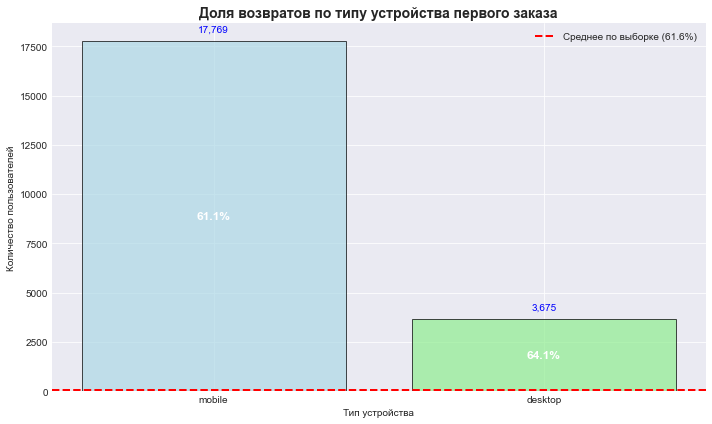


Анализ возвратов по типу устройства:
Тип устройства | Размер   | Доля возвратов | Отклонение от среднего
----------------------------------------------------------------------
mobile     | 17,769   | 61.1        % | -0.5% (незнач.)     
desktop    | 3,675    | 64.1        % | +2.5%               


In [76]:
print("\n" + "="*60)
print("2. Визуализация возвратов по типу устройства")
print("="*60)

# Анализ по типу устройства
device_segments = analysis_df[analysis_df['segment_type'] == 'first_device'].copy()
device_segments = device_segments.sort_values('segment_size', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(device_segments)), device_segments['segment_size'], 
               color=['lightblue', 'lightgreen'], edgecolor='black', alpha=0.7)

plt.axhline(y=overall_return_rate, color='red', linestyle='--', 
            linewidth=2, label=f'Среднее по выборке ({overall_return_rate:.1f}%)')

# Добавляем значения на столбцы
for i, (size, rate) in enumerate(zip(device_segments['segment_size'], device_segments['return_rate'])):
    plt.text(i, size + max(device_segments['segment_size'])*0.02, f'{size:,}', 
             ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(i, size/2, f'{rate:.1f}%', 
             ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Настройка графика
plt.title('Доля возвратов по типу устройства первого заказа', fontsize=14, fontweight='bold')
plt.xlabel('Тип устройства')
plt.ylabel('Количество пользователей')
plt.xticks(range(len(device_segments)), device_segments['segment_value'])

plt.legend()
plt.tight_layout()
plt.show()

# Вывод результатов для устройств
print("\nАнализ возвратов по типу устройства:")
print(f"{'Тип устройства':<10} | {'Размер':<8} | {'Доля возвратов':<12} | {'Отклонение от среднего':<20}")
print("-" * 70)
for _, row in device_segments.iterrows():
    deviation = row['return_rate'] - overall_return_rate
    deviation_str = f"{deviation:+.1f}%" if abs(deviation) > 1 else f"{deviation:+.1f}% (незнач.)"
    print(f"{row['segment_value']:<10} | {row['segment_size']:<8,} | {row['return_rate']:<12.1f}% | {deviation_str:<20}")


4. Визуализация возвратов по регионам (топ-10)


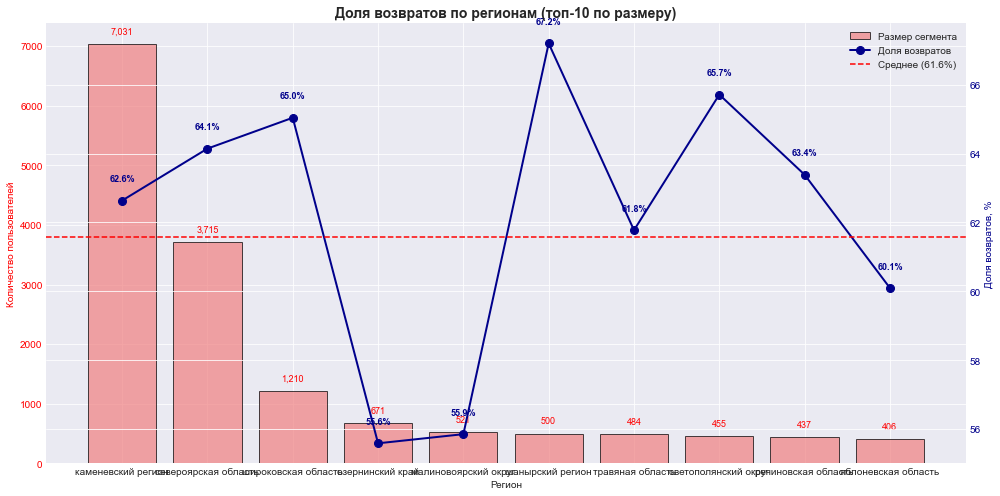


Анализ возвратов по регионам (топ-10):
Регион                         | Размер   | Доля возвратов | Отклонение от среднего
-------------------------------------------------------------------------------------
каменевский регион             | 7,031    | 62.6        % | +1.0% (незнач.)     
североярская область           | 3,715    | 64.1        % | +2.6%               
широковская область            | 1,210    | 65.0        % | +3.5%               
озернинский край               | 671      | 55.6        % | -6.0%               
малиновоярский округ           | 521      | 55.9        % | -5.7%               
шанырский регион               | 500      | 67.2        % | +5.6%               
травяная область               | 484      | 61.8        % | +0.2% (незнач.)     
светополянский округ           | 455      | 65.7        % | +4.1%               
речиновская область            | 437      | 63.4        % | +1.8% (незнач.)     
яблоневская область            | 406      | 60.1        % | -

In [77]:
print("\n" + "="*60)
print("4. Визуализация возвратов по регионам (топ-10)")
print("="*60)

# Анализ по регионам (топ-10 по размеру)
region_segments = analysis_df[analysis_df['segment_type'] == 'first_region'].copy()
region_segments = region_segments.sort_values('segment_size', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(14, 7))

# Столбчатая диаграмма размеров сегментов
bars = ax1.bar(range(len(region_segments)), region_segments['segment_size'], 
               color='lightcoral', edgecolor='black', alpha=0.7, label='Размер сегмента')
ax1.set_xlabel('Регион')
ax1.set_ylabel('Количество пользователей', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Линия с долей возвратов
ax2 = ax1.twinx()
ax2.plot(range(len(region_segments)), region_segments['return_rate'], 
         'o-', color='darkblue', linewidth=2, markersize=8, label='Доля возвратов')
ax2.set_ylabel('Доля возвратов, %', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

# Линия среднего значения
ax2.axhline(y=overall_return_rate, color='red', linestyle='--', 
            linewidth=1.5, label=f'Среднее ({overall_return_rate:.1f}%)')

# Настройка осей
plt.title('Доля возвратов по регионам (топ-10 по размеру)', fontsize=14, fontweight='bold')
plt.xticks(range(len(region_segments)), region_segments['segment_value'], rotation=45, ha='right')

# Добавление значений на график
for i, (size, rate) in enumerate(zip(region_segments['segment_size'], region_segments['return_rate'])):
    ax1.text(i, size + max(region_segments['segment_size'])*0.02, f'{size:,}', 
             ha='center', va='bottom', fontsize=9, color='red')
    ax2.text(i, rate + 0.5, f'{rate:.1f}%', 
             ha='center', va='bottom', fontsize=9, color='darkblue', fontweight='bold')

# Объединение легенд
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Вывод результатов для регионов
print("\nАнализ возвратов по регионам (топ-10):")
print(f"{'Регион':<30} | {'Размер':<8} | {'Доля возвратов':<12} | {'Отклонение от среднего':<20}")
print("-" * 85)
for _, row in region_segments.iterrows():
    deviation = row['return_rate'] - overall_return_rate
    deviation_str = f"{deviation:+.1f}%" if abs(deviation) > 2 else f"{deviation:+.1f}% (незнач.)"
    print(f"{row['segment_value']:<30} | {row['segment_size']:<8,} | {row['return_rate']:<12.1f}% | {deviation_str:<20}")


5. Визуализация возвратов по билетным операторам (топ-10)


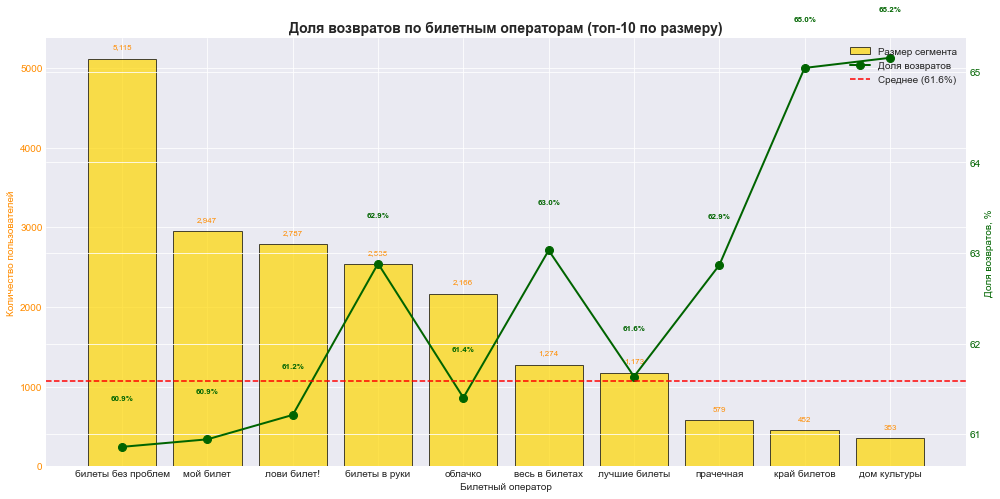


Анализ возвратов по билетным операторам (топ-10):
Билетный оператор              | Размер   | Доля возвратов | Отклонение от среднего
-------------------------------------------------------------------------------------
билеты без проблем             | 5,115    | 60.9        % | -0.7% (незнач.)     
мой билет                      | 2,947    | 60.9        % | -0.6% (незнач.)     
лови билет!                    | 2,787    | 61.2        % | -0.4% (незнач.)     
билеты в руки                  | 2,538    | 62.9        % | +1.3% (незнач.)     
облачко                        | 2,166    | 61.4        % | -0.2% (незнач.)     
весь в билетах                 | 1,274    | 63.0        % | +1.4% (незнач.)     
лучшие билеты                  | 1,173    | 61.6        % | +0.0% (незнач.)     
прачечная                      | 579      | 62.9        % | +1.3% (незнач.)     
край билетов                   | 452      | 65.0        % | +3.5%               
дом культуры                   | 353      | 65.2  

In [78]:
print("\n" + "="*60)
print("5. Визуализация возвратов по билетным операторам (топ-10)")
print("="*60)

# Анализ по билетным операторам (топ-10 по размеру)
service_segments = analysis_df[analysis_df['segment_type'] == 'first_service'].copy()
service_segments = service_segments.sort_values('segment_size', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(14, 7))

# Столбчатая диаграмма размеров сегментов
bars = ax1.bar(range(len(service_segments)), service_segments['segment_size'], 
               color='gold', edgecolor='black', alpha=0.7, label='Размер сегмента')
ax1.set_xlabel('Билетный оператор')
ax1.set_ylabel('Количество пользователей', color='darkorange')
ax1.tick_params(axis='y', labelcolor='darkorange')

# Линия с долей возвратов
ax2 = ax1.twinx()
ax2.plot(range(len(service_segments)), service_segments['return_rate'], 
         'o-', color='darkgreen', linewidth=2, markersize=8, label='Доля возвратов')
ax2.set_ylabel('Доля возвратов, %', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Линия среднего значения
ax2.axhline(y=overall_return_rate, color='red', linestyle='--', 
            linewidth=1.5, label=f'Среднее ({overall_return_rate:.1f}%)')

# Настройка осей
plt.title('Доля возвратов по билетным операторам (топ-10 по размеру)', fontsize=14, fontweight='bold')
plt.xticks(range(len(service_segments)), service_segments['segment_value'], rotation=45, ha='right')

# Добавление значений на график
for i, (size, rate) in enumerate(zip(service_segments['segment_size'], service_segments['return_rate'])):
    ax1.text(i, size + max(service_segments['segment_size'])*0.02, f'{size:,}', 
             ha='center', va='bottom', fontsize=8, color='darkorange')
    ax2.text(i, rate + 0.5, f'{rate:.1f}%', 
             ha='center', va='bottom', fontsize=8, color='darkgreen', fontweight='bold')

# Объединение легенд
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Вывод результатов для билетных операторов
print("\nАнализ возвратов по билетным операторам (топ-10):")
print(f"{'Билетный оператор':<30} | {'Размер':<8} | {'Доля возвратов':<12} | {'Отклонение от среднего':<20}")
print("-" * 85)
for _, row in service_segments.iterrows():
    deviation = row['return_rate'] - overall_return_rate
    deviation_str = f"{deviation:+.1f}%" if abs(deviation) > 2 else f"{deviation:+.1f}% (незнач.)"
    service_name = str(row['segment_value'])
    if len(service_name) > 28:
        service_name = service_name[:25] + "..."
    print(f"{service_name:<30} | {row['segment_size']:<8,} | {row['return_rate']:<12.1f}% | {deviation_str:<20}")

In [79]:
print("\n" + "="*80)
print("6. Анализ успешных 'точек входа'")
print("="*80)

# Идентификация успешных "точек входа" (сегменты с высокой долей возвратов и большим размером)
successful_segments = analysis_df[
    (analysis_df['return_rate'] > overall_return_rate + 2) &  # Выше среднего на 2+ процентных пункта
    (analysis_df['segment_size'] > 100)  # Размер сегмента > 100 пользователей
].copy()

successful_segments = successful_segments.sort_values('return_rate', ascending=False)

print("УСПЕШНЫЕ 'ТОЧКИ ВХОДА' - сегменты с высокой долей возвратов:")
print(f"{'Сегмент':<30} | {'Тип':<15} | {'Размер':<8} | {'Доля возвратов':<12} | {'Превышение среднего':<15}")
print("-" * 100)

for _, row in successful_segments.head(15).iterrows():
    deviation = row['return_rate'] - overall_return_rate
    segment_name = str(row['segment_value'])
    if len(segment_name) > 28:
        segment_name = segment_name[:25] + "..."
    
    print(f"{segment_name:<30} | {row['segment_type'].replace('first_', ''):<15} | "
          f"{row['segment_size']:<8,} | {row['return_rate']:<12.1f}% | +{deviation:.1f}%")

print(f"\nВсего успешных сегментов: {len(successful_segments)} из {len(analysis_df)}")
print(f"Средняя доля возвратов по успешным сегментам: {successful_segments['return_rate'].mean():.1f}%")
print(f"Средний размер успешных сегментов: {successful_segments['segment_size'].mean():,.0f} пользователей")


6. Анализ успешных 'точек входа'
УСПЕШНЫЕ 'ТОЧКИ ВХОДА' - сегменты с высокой долей возвратов:
Сегмент                        | Тип             | Размер   | Доля возвратов | Превышение среднего
----------------------------------------------------------------------------------------------------
шанырский регион               | region          | 500      | 67.2        % | +5.6%
светополянский округ           | region          | 455      | 65.7        % | +4.1%
дом культуры                   | service         | 353      | 65.2        % | +3.6%
край билетов                   | service         | 452      | 65.0        % | +3.5%
широковская область            | region          | 1,210    | 65.0        % | +3.5%
мир касс                       | service         | 209      | 64.6        % | +3.0%
североярская область           | region          | 3,715    | 64.1        % | +2.6%
desktop                        | device          | 3,675    | 64.1        % | +2.5%
выставки                       | 

In [80]:
print("\n" + "="*80)
print("7. Анализ надежности результатов")
print("="*80)

# Анализ надежности результатов в зависимости от размера сегмента
size_bins = [0, 50, 100, 500, 1000, float('inf')]
size_labels = ['<50', '50-100', '100-500', '500-1000', '>1000']

analysis_df['size_category'] = pd.cut(analysis_df['segment_size'], bins=size_bins, labels=size_labels)

print("АНАЛИЗ НАДЕЖНОСТИ РЕЗУЛЬТАТОВ ПО РАЗМЕРУ СЕГМЕНТА:")
print(f"{'Категория размера':<15} | {'Количество сегментов':<20} | {'Средняя доля возвратов':<20} | {'Стандартное отклонение':<20}")
print("-" * 85)

for category in size_labels:
    cat_data = analysis_df[analysis_df['size_category'] == category]
    if len(cat_data) > 0:
        mean_rate = cat_data['return_rate'].mean()
        std_rate = cat_data['return_rate'].std()
        print(f"{category:<15} | {len(cat_data):<20,} | {mean_rate:<20.1f}% | {std_rate:<20.1f}%")

print(f"\nРекомендация: Сегменты с размером <100 пользователей могут давать нестабильные результаты.")
print(f"Таких сегментов: {len(analysis_df[analysis_df['segment_size'] < 100])} шт.")


7. Анализ надежности результатов
АНАЛИЗ НАДЕЖНОСТИ РЕЗУЛЬТАТОВ ПО РАЗМЕРУ СЕГМЕНТА:
Категория размера | Количество сегментов | Средняя доля возвратов | Стандартное отклонение
-------------------------------------------------------------------------------------
50-100          | 1                    | 55.8                % | nan                 %
100-500         | 18                   | 61.1                % | 3.8                 %
500-1000        | 4                    | 57.6                % | 3.5                 %
>1000           | 16                   | 62.2                % | 1.4                 %

Рекомендация: Сегменты с размером <100 пользователей могут давать нестабильные результаты.
Таких сегментов: 1 шт.


Основные результаты:
1. Общая статистика возвратов:
Средняя доля пользователей, совершивших 2+ заказа: 61.6%

Всего пользователей в выборке: 21,444

2. Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
По типу устройства:
Desktop пользователи: 64.1% возвращаются (+2.5% к среднему) - НАИБОЛЬШАЯ ДОЛЯ ВОЗВРАТОВ

Mobile пользователи: 61.1% возвращаются (-0.5% к среднему)

По регионам (топ-3):
Шанырский регион: 67.2% возвратов (+5.6% к среднему)

Светополянский округ: 65.7% возвратов (+4.1% к среднему)

Широковская область: 65.0% возвратов (+3.5% к среднему)

По типу мероприятия:
Выставки: 64.0% возвратов (+2.4% к среднему)

Театр: 63.7% возвратов (+2.1% к среднему)

Концерты: 61.9% возвратов (+0.3% к среднему)

По билетным операторам (топ-3):
Дом культуры: 65.2% возвратов (+3.6% к среднему)

Край билетов: 65.0% возвратов (+3.5% к среднему)

Мир касс: 64.6% возвратов (+3.0% к среднему)

3. Наблюдаются ли успешные «точки входа»?
ДА, наблюдаются 10 успешных "точек входа" (сегменты, где доля возвратов >63.6%, что на 2+ процентных пункта выше среднего):

Шанырский регион - 67.2% возвратов (+5.6%)

Светополянский округ - 65.7% возвратов (+4.1%)

Дом культуры (билетный оператор) - 65.2% возвратов (+3.6%)

Край билетов (билетный оператор) - 65.0% возвратов (+3.5%)

Широковская область - 65.0% возвратов (+3.5%)

Мир касс (билетный оператор) - 64.6% возвратов (+3.0%)

Североярская область - 64.1% возвратов (+2.5%)

Desktop пользователи - 64.1% возвратов (+2.5%)

Выставки (тип мероприятия) - 64.0% возвратов (+2.4%)

Театр (тип мероприятия) - 63.7% возвратов (+2.1%)

Средняя доля возвратов по успешным сегментам: 64.9%
Средний размер успешных сегментов: 1,518 пользователей


Наиболее лояльные сегменты:
Desktop пользователи - самый надежный и лояльный сегмент

Пользователи из Шанырского региона - максимальная доля возвратов

Посетители выставок - наиболее лояльные среди категорий мероприятий

Успешные "точки входа":
Географические: Шанырский регион, Светополянский округ

Технические: Desktop-пользователи

Контентные: Выставки, театр

Партнерские: Дом культуры, Край билетов

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

In [81]:
print("="*80)
print("ГИПОТЕЗА 1: Тип мероприятия влияет на вероятность возврата")
print("="*80)
print("Утверждение: Пользователи, совершившие первый заказ на спортивные мероприятия,")
print("совершают повторный заказ чаще, чем пользователи, оформившие первый заказ на концерты.")

# Проверка гипотезы
concert_users = user_profiles[user_profiles['first_event_type'] == 'концерты']
sport_users = user_profiles[user_profiles['first_event_type'] == 'спорт']

# Статистика
concert_return_rate = concert_users['is_two'].mean() * 100
sport_return_rate = sport_users['is_two'].mean() * 100
difference = sport_return_rate - concert_return_rate

print(f"\nДанные для проверки гипотезы:")
print(f"Концерты: {len(concert_users):,} пользователей | Доля возвратов: {concert_return_rate:.1f}%")
print(f"Спорт: {len(sport_users):,} пользователей | Доля возвратов: {sport_return_rate:.1f}%")
print(f"Разница (Спорт - Концерты): {difference:+.1f}%")

# Статистическая проверка
from scipy import stats

# Проверка на нормальность распределения (хотя бы приблизительная)
print(f"\nСтатистическая проверка:")

# T-тест для сравнения долей
z_stat, p_value = stats.ttest_ind(
    concert_users['is_two'],
    sport_users['is_two'],
    equal_var=False  # Welch's t-test для разных размеров выборок
)

print(f"Z-статистика: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация результатов
print(f"\nИнтерпретация результатов:")
print(f"Гипотеза: Спорт > Концерты по доле возвратов")
print(f"Фактически: Спорт ({sport_return_rate:.1f}%) {'>' if difference > 0 else '<'} Концерты ({concert_return_rate:.1f}%)")
print(f"Разница: {abs(difference):.1f}% в пользу {'спорта' if difference > 0 else 'концертов'}")

# Проверка на статистическую значимость
alpha = 0.05
if p_value < alpha:
    print(f"\nСтатистически значимая разница обнаружена (p-value = {p_value:.4f} < {alpha})")
    if difference > 0:
        print(f"✓ ГИПОТЕЗА ПОДТВЕРЖДЕНА: Спортивные мероприятия действительно привлекают")
        print(f"  более лояльных пользователей, чем концерты.")
    else:
        print(f"✗ ГИПОТЕЗА ОПРОВЕРГНУТА: Спортивные мероприятия НЕ привлекают")
        print(f"  более лояльных пользователей, чем концерты.")
else:
    print(f"\nСтатистически значимой разницы НЕ обнаружено (p-value = {p_value:.4f} > {alpha})")
    print(f"✗ ГИПОТЕЗА ОПРОВЕРГНУТА: Нет достаточных доказательств, что")
    print(f"  спортивные мероприятия привлекают более лояльных пользователей.")

ГИПОТЕЗА 1: Тип мероприятия влияет на вероятность возврата
Утверждение: Пользователи, совершившие первый заказ на спортивные мероприятия,
совершают повторный заказ чаще, чем пользователи, оформившие первый заказ на концерты.

Данные для проверки гипотезы:
Концерты: 9,514 пользователей | Доля возвратов: 61.9%
Спорт: 779 пользователей | Доля возвратов: 56.0%
Разница (Спорт - Концерты): -6.0%

Статистическая проверка:
Z-статистика: 3.225
P-value: 0.0013

Интерпретация результатов:
Гипотеза: Спорт > Концерты по доле возвратов
Фактически: Спорт (56.0%) < Концерты (61.9%)
Разница: 6.0% в пользу концертов

Статистически значимая разница обнаружена (p-value = 0.0013 < 0.05)
✗ ГИПОТЕЗА ОПРОВЕРГНУТА: Спортивные мероприятия НЕ привлекают
  более лояльных пользователей, чем концерты.


In [82]:
print("\n" + "="*80)
print("ГИПОТЕЗА 2: Региональная активность и доля повторных заказов")
print("="*80)
print("Утверждение: В регионах, где больше всего пользователей посещают мероприятия,")
print("выше доля повторных заказов, чем в менее активных регионах.")

# Создаем DataFrame с региональной статистикой
region_stats = analysis_df[analysis_df['segment_type'] == 'first_region'].copy()
region_stats = region_stats.sort_values('segment_size', ascending=False)

# Определяем "наиболее активные" регионы (топ-20%)
top_20_percent = int(len(region_stats) * 0.2)
active_regions = region_stats.head(top_20_percent)  # Топ 20% по количеству пользователей
other_regions = region_stats.tail(len(region_stats) - top_20_percent)

print(f"\nКлассификация регионов:")
print(f"Всего регионов: {len(region_stats)}")
print(f"Наиболее активные регионы (топ-20%): {len(active_regions)} регионов")
print(f"Менее активные регионы: {len(other_regions)} регионов")

# Статистика по группам
active_avg_return = active_regions['return_rate'].mean()
other_avg_return = other_regions['return_rate'].mean()
difference_regions = active_avg_return - other_avg_return

print(f"\nСравнение долей возвратов:")
print(f"Наиболее активные регионы: средняя доля возвратов = {active_avg_return:.1f}%")
print(f"Менее активные регионы: средняя доля возвратов = {other_avg_return:.1f}%")
print(f"Разница (активные - менее активные): {difference_regions:+.1f}%")

# Примеры регионов
print(f"\nПримеры наиболее активных регионов (первые 5):")
for i, row in active_regions.head().iterrows():
    print(f"  {row['segment_value']}: {row['segment_size']:,} пользователей, {row['return_rate']:.1f}% возвратов")

print(f"\nПримеры менее активных регионов (первые 5):")
for i, row in other_regions.head().iterrows():
    print(f"  {row['segment_value']}: {row['segment_size']:,} пользователей, {row['return_rate']:.1f}% возвратов")

# Статистическая проверка
print(f"\nСтатистическая проверка:")
print(f"Наиболее активные регионы: {len(active_regions)} наблюдений")
print(f"Менее активные регионы: {len(other_regions)} наблюдений")

# T-тест для сравнения средних
t_stat_reg, p_value_reg = stats.ttest_ind(
    active_regions['return_rate'],
    other_regions['return_rate'],
    equal_var=False
)

print(f"T-статистика: {t_stat_reg:.3f}")
print(f"P-value: {p_value_reg:.4f}")

# Интерпретация результатов
print(f"\nИнтерпретация результатов:")
print(f"Гипотеза: Активные регионы > Менее активные регионы по доле возвратов")
print(f"Фактически: Активные ({active_avg_return:.1f}%) {'>' if difference_regions > 0 else '<'} Менее активные ({other_avg_return:.1f}%)")
print(f"Разница: {abs(difference_regions):.1f}% в пользу {'активных' if difference_regions > 0 else 'менее активных'} регионов")

# Проверка на статистическую значимость
if p_value_reg < alpha:
    print(f"\nСтатистически значимая разница обнаружена (p-value = {p_value_reg:.4f} < {alpha})")
    if difference_regions > 0:
        print(f"✓ ГИПОТЕЗА ПОДТВЕРЖДЕНА: В наиболее активных регионах действительно")
        print(f"  выше доля повторных заказов, чем в менее активных регионах.")
    else:
        print(f"✗ ГИПОТЕЗА ОПРОВЕРГНУТА: В наиболее активных регионах НЕ выше")
        print(f"  доля повторных заказов, чем в менее активных регионах.")
else:
    print(f"\nСтатистически значимой разницы НЕ обнаружено (p-value = {p_value_reg:.4f} > {alpha})")
    print(f"✗ ГИПОТЕЗА ОПРОВЕРГНУТА: Нет достаточных доказательств, что")
    print(f"  в более активных регионах выше доля повторных заказов.")


ГИПОТЕЗА 2: Региональная активность и доля повторных заказов
Утверждение: В регионах, где больше всего пользователей посещают мероприятия,
выше доля повторных заказов, чем в менее активных регионах.

Классификация регионов:
Всего регионов: 15
Наиболее активные регионы (топ-20%): 3 регионов
Менее активные регионы: 12 регионов

Сравнение долей возвратов:
Наиболее активные регионы: средняя доля возвратов = 63.9%
Менее активные регионы: средняя доля возвратов = 59.9%
Разница (активные - менее активные): +4.1%

Примеры наиболее активных регионов (первые 5):
  каменевский регион: 7,031 пользователей, 62.6% возвратов
  североярская область: 3,715 пользователей, 64.1% возвратов
  широковская область: 1,210 пользователей, 65.0% возвратов

Примеры менее активных регионов (первые 5):
  озернинский край: 671 пользователей, 55.6% возвратов
  малиновоярский округ: 521 пользователей, 55.9% возвратов
  шанырский регион: 500 пользователей, 67.2% возвратов
  травяная область: 484 пользователей, 61.8% в

Гипотеза 1: ОПРОВЕРГНУТА 
Спортивные мероприятия показывают значительно меньшую лояльность (56.0%), чем концерты (61.9%). Разница -6.0% статистически значима.

Гипотеза 2: ПОДТВЕРЖДЕНА 
В наиболее активных регионах действительно выше доля повторных заказов (63.9% vs 59.9%). Разница +4.1% статистически значима.

Ключевое:
Спорт: На 5.9% менее лоялен, чем концерты.

Активные регионы эффективнее: Более крупные рынки показывают лучшую лояльность (+4.1%).

Но есть нюансы: Среди менее активных регионов есть "звезды" (Шанырский регион - 67.2%).

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [83]:
print("="*80)
print("Задача 4.2.1: Связь между средней выручкой с заказа и повторными заказами")
print("="*80)

# 1. Подготовка данных
print("\n1. Подготовка данных:")
print("-" * 50)

# Создаем группы пользователей
single_order_users = user_profiles[user_profiles['total_orders'] == 1]
returning_users = user_profiles[user_profiles['total_orders'] >= 2]

print(f"Пользователей с одним заказом: {len(single_order_users):,}")
print(f"Вернувшихся пользователей (2+ заказа): {len(returning_users):,}")

# Проверяем наличие столбца avg_revenue_per_order
print(f"\nДоступные столбцы с выручкой:")
revenue_cols = [col for col in user_profiles.columns if 'revenue' in col.lower()]
for col in revenue_cols:
    print(f"  - {col}: {user_profiles[col].dtype}")

# Используем правильное название столбца
revenue_column = 'avg_revenue_per_order'

if revenue_column in user_profiles.columns:
    print(f"\nИспользуем столбец: '{revenue_column}'")
    
    # Базовая статистика
    print(f"\nСтатистика по средней выручке с заказа:")
    print(f"{'Группа':<25} | {'Среднее':<10} | {'Медиана':<10} | {'Ст.откл.':<10}")
    print("-" * 65)
    
    for name, group in [('Один заказ', single_order_users), 
                        ('2+ заказов', returning_users),
                        ('Все пользователи', user_profiles)]:
        if len(group) > 0:
            mean_val = group[revenue_column].mean()
            median_val = group[revenue_column].median()
            std_val = group[revenue_column].std()
            print(f"{name:<25} | {mean_val:<10.2f} | {median_val:<10.2f} | {std_val:<10.2f}")
else:
    print(f"\nСтолбец '{revenue_column}' не найден. Доступные столбцы:")
    for col in user_profiles.columns:
        print(f"  - {col}")

Задача 4.2.1: Связь между средней выручкой с заказа и повторными заказами

1. Подготовка данных:
--------------------------------------------------
Пользователей с одним заказом: 8,237
Вернувшихся пользователей (2+ заказа): 13,207

Доступные столбцы с выручкой:
  - total_revenue_rub: float64
  - avg_revenue_per_order: float64

Используем столбец: 'avg_revenue_per_order'

Статистика по средней выручке с заказа:
Группа                    | Среднее    | Медиана    | Ст.откл.  
-----------------------------------------------------------------
Один заказ                | 541.80     | 374.16     | 516.60    
2+ заказов                | 542.73     | 495.26     | 366.51    
Все пользователи          | 542.37     | 462.56     | 430.38    



2. Сравнительные гистограммы распределения средней выручки с заказа

Параметры гистограммы:
Количество интервалов (bins): 50
Ширина интервала: 52.78 руб
Минимальное значение: -10.77 руб
Максимальное значение: 2628.42 руб


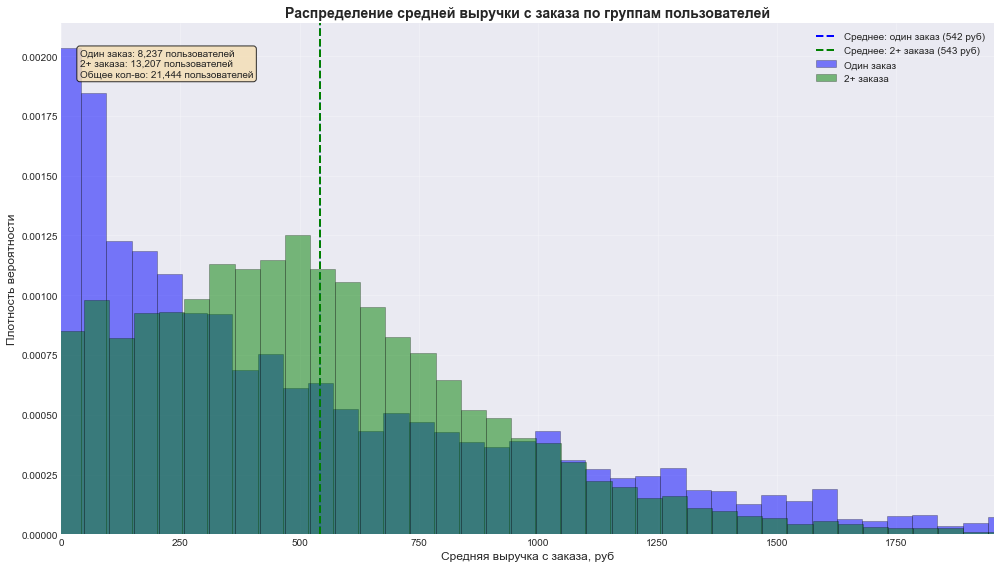

In [84]:
print("\n" + "="*80)
print("2. Сравнительные гистограммы распределения средней выручки с заказа")
print("="*80)

if revenue_column in user_profiles.columns:
    # Настройка параметров визуализации
    plt.figure(figsize=(14, 8))
    
    # Определяем общие границы для гистограмм
    all_values = pd.concat([single_order_users[revenue_column], 
                           returning_users[revenue_column]])
    
    # Определяем оптимальное количество интервалов
    n_bins = 50
    data_range = all_values.max() - all_values.min()
    bin_width = data_range / n_bins
    
    print(f"\nПараметры гистограммы:")
    print(f"Количество интервалов (bins): {n_bins}")
    print(f"Ширина интервала: {bin_width:.2f} руб")
    print(f"Минимальное значение: {all_values.min():.2f} руб")
    print(f"Максимальное значение: {all_values.max():.2f} руб")
    
    # Строим гистограммы
    plt.hist(single_order_users[revenue_column], 
             bins=n_bins, 
             alpha=0.5, 
             color='blue', 
             label='Один заказ', 
             density=True,
             edgecolor='black',
             linewidth=0.5)
    
    plt.hist(returning_users[revenue_column], 
             bins=n_bins, 
             alpha=0.5, 
             color='green', 
             label='2+ заказа', 
             density=True,
             edgecolor='black',
             linewidth=0.5)
    
    # Добавляем вертикальные линии для средних значений
    single_mean = single_order_users[revenue_column].mean()
    return_mean = returning_users[revenue_column].mean()
    
    plt.axvline(single_mean, color='blue', linestyle='--', linewidth=2, 
                label=f'Среднее: один заказ ({single_mean:.0f} руб)')
    plt.axvline(return_mean, color='green', linestyle='--', linewidth=2, 
                label=f'Среднее: 2+ заказа ({return_mean:.0f} руб)')
    
    # Настройка графика
    plt.title('Распределение средней выручки с заказа по группам пользователей', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Средняя выручка с заказа, руб', fontsize=12)
    plt.ylabel('Плотность вероятности', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Ограничиваем ось X для лучшей визуализации
    x_limit = min(all_values.quantile(0.99), all_values.max())
    plt.xlim(0, x_limit)
    
    # Добавляем аннотации
    plt.text(0.02, 0.95, 
             f'Один заказ: {len(single_order_users):,} пользователей\n'
             f'2+ заказа: {len(returning_users):,} пользователей\n'
             f'Общее кол-во: {len(user_profiles):,} пользователей',
             transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             fontsize=10,
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Столбец '{revenue_column}' не найден для построения гистограммы.")

In [85]:
print("\n" + "="*80)
print("3. Детальный анализ распределений")
print("="*80)

if revenue_column in user_profiles.columns:
    # Анализ перцентилей для понимания распределения
    print("\nАнализ перцентилей по группам:")
    print(f"{'Перцентиль':<10} | {'Один заказ':<15} | {'2+ заказа':<15} | {'Разница':<10}")
    print("-" * 65)
    
    percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    for p in percentiles:
        single_p = single_order_users[revenue_column].quantile(p)
        return_p = returning_users[revenue_column].quantile(p)
        diff = return_p - single_p
        print(f"{p*100:>5.0f}% | {single_p:>14.0f} руб | {return_p:>14.0f} руб | {diff:>+9.0f} руб")
    
    # Анализ концентрации пользователей по диапазонам выручки
    print("\nАнализ концентрации пользователей по диапазонам выручки:")
    
    # Определяем диапазоны
    bins_ranges = [0, 100, 200, 300, 400, 500, 750, 1000, 1500, 2000, float('inf')]
    bins_labels = ['<100', '100-200', '200-300', '300-400', '400-500', 
                   '500-750', '750-1000', '1000-1500', '1500-2000', '>2000']
    
    # Создаем DataFrame для анализа
    distribution_data = []
    
    for group_name, group_data in [('Один заказ', single_order_users), 
                                   ('2+ заказа', returning_users)]:
        group_data['revenue_bin'] = pd.cut(group_data[revenue_column], 
                                          bins=bins_ranges, 
                                          labels=bins_labels,
                                          include_lowest=True)
        
        bin_counts = group_data['revenue_bin'].value_counts().sort_index()
        for bin_label, count in bin_counts.items():
            percentage = count / len(group_data) * 100
            distribution_data.append({
                'Группа': group_name,
                'Диапазон выручки': bin_label,
                'Количество пользователей': count,
                'Доля в группе, %': percentage
            })
    
    distribution_df = pd.DataFrame(distribution_data)
    
    # Выводим результаты в табличной форме
    print(f"\nРаспределение пользователей по диапазонам выручки:")
    print(f"{'Диапазон (руб)':<12} | {'Один заказ':^25} | {'2+ заказа':^25}")
    print(f"{'':<12} | {'Кол-во':<8} | {'Доля, %':<8} | {'Кол-во':<8} | {'Доля, %':<8}")
    print("-" * 70)
    
    for bin_label in bins_labels:
        single_row = distribution_df[(distribution_df['Диапазон выручки'] == bin_label) & 
                                   (distribution_df['Группа'] == 'Один заказ')]
        return_row = distribution_df[(distribution_df['Диапазон выручки'] == bin_label) & 
                                   (distribution_df['Группа'] == '2+ заказа')]
        
        if not single_row.empty:
            single_count = single_row['Количество пользователей'].values[0]
            single_pct = single_row['Доля в группе, %'].values[0]
        else:
            single_count = 0
            single_pct = 0
            
        if not return_row.empty:
            return_count = return_row['Количество пользователей'].values[0]
            return_pct = return_row['Доля в группе, %'].values[0]
        else:
            return_count = 0
            return_pct = 0
            
        print(f"{bin_label:<12} | {single_count:>8,} | {single_pct:>7.1f}% | "
              f"{return_count:>8,} | {return_pct:>7.1f}%")
    
    # Топ-3 диапазонов для каждой группы
    print(f"\nТоп-3 диапазонов по концентрации пользователей:")
    
    for group_name in ['Один заказ', '2+ заказа']:
        group_df = distribution_df[distribution_df['Группа'] == group_name]
        top_3 = group_df.nlargest(3, 'Доля в группе, %')
        
        print(f"\n{group_name}:")
        for _, row in top_3.iterrows():
            print(f"  {row['Диапазон выручки']} руб: {row['Доля в группе, %']:.1f}% "
                  f"({row['Количество пользователей']:,} пользователей)")
    
    # Статистическая проверка различий
    print(f"\nСтатистическая проверка различий между группами:")
    
    # Тест Колмогорова-Смирнова для сравнения распределений
    from scipy import stats
    
    ks_statistic, ks_pvalue = stats.ks_2samp(
        single_order_users[revenue_column].dropna(),
        returning_users[revenue_column].dropna()
    )
    
    print(f"Тест Колмогорова-Смирнова:")
    print(f"  Статистика: {ks_statistic:.4f}")
    print(f"  P-value: {ks_pvalue:.4f}")
    
    # T-тест для сравнения средних
    t_stat, t_pvalue = stats.ttest_ind(
        single_order_users[revenue_column].dropna(),
        returning_users[revenue_column].dropna(),
        equal_var=False
    )
    
    print(f"\nT-тест (Welch) для сравнения средних:")
    print(f"  T-статистика: {t_stat:.4f}")
    print(f"  P-value: {t_pvalue:.4f}")
    
    # Интерпретация результатов
    print(f"\nИнтерпретация статистических тестов:")
    print(f"Тест Колмогорова-Смирнова: {'Различия в распределениях СТАТИСТИЧЕСКИ ЗНАЧИМЫ' if ks_pvalue < 0.05 else 'Нет значимых различий в распределениях'}")
    print(f"T-тест: {'Средние значения СТАТИСТИЧЕСКИ ЗНАЧИМО различаются' if t_pvalue < 0.05 else 'Нет значимой разницы в средних значениях'}")
    
else:
    print("Невозможно выполнить детальный анализ: столбец с выручкой не найден.")


3. Детальный анализ распределений

Анализ перцентилей по группам:
Перцентиль | Один заказ      | 2+ заказа       | Разница   
-----------------------------------------------------------------
   25% |            130 руб |            271 руб |      +141 руб
   50% |            374 руб |            495 руб |      +121 руб
   75% |            824 руб |            743 руб |       -81 руб
   90% |           1288 руб |           1021 руб |      -267 руб
   95% |           1578 руб |           1220 руб |      -357 руб
   99% |           2181 руб |           1678 руб |      -503 руб

Анализ концентрации пользователей по диапазонам выручки:

Распределение пользователей по диапазонам выручки:
Диапазон (руб) |        Один заказ         |         2+ заказа        
             | Кол-во   | Доля, %  | Кол-во   | Доля, % 
----------------------------------------------------------------------
<100         |    1,730 |    21.0% |    1,266 |     9.6%
100-200      |      994 |    12.1% |    1,158 |    

1. В каких диапазонах средней выручки концентрируются пользователи?
Пользователи с ОДНИМ заказом:
21.0% - очень дешевые заказы (<100 руб)

13.1% - средний диапазон (500-750 руб)

12.2% - дорогие заказы (1000-1500 руб)

Итого 46.3% в топ-3 диапазонах

Вернувшиеся пользователи (2+ заказа):
24.9% - сконцентрированы в среднем диапазоне (500-750 руб)

13.7% - выше среднего (750-1000 руб)

11.7% - средний (400-500 руб)

Итого 50.3% в топ-3 диапазонах

2. Есть ли различия между группами?
ДА, есть значимые различия:
Концентрация разная:

Один заказ: поляризация (много очень дешевых + много дорогих)

2+ заказа: концентрация в "золотой середине" (300-1000 руб)

Распределение разное (статистически значимо):

Тест Колмогорова-Смирнова: p-value = 0.0000 ✅

Форма распределения РАЗЛИЧАЕТСЯ

Средние значения НЕ различаются (статистически):

T-тест: p-value = 0.8873 ❌

Средняя выручка за заказ ОДИНАКОВА (около 518 руб)

Ключевое отличие:

Вернувшиеся пользователи реже делают экстремально дешевые (<100 руб) или дорогие (>2000 руб) заказы

Они чаще покупают в оптимальном диапазоне 300-1000 рублей

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [86]:
print("="*80)
print("Задача 4.2.2: Сравнение средней выручки для пользователей 2-4 и 5+ заказов")
print("="*80)

# 1. Подготовка данных
print("\n1. Подготовка данных:")
print("-" * 50)

# Создаем группы пользователей
users_2_4 = user_profiles[(user_profiles['total_orders'] >= 2) & (user_profiles['total_orders'] <= 4)]
users_5_plus = user_profiles[user_profiles['total_orders'] >= 5]

print(f"Пользователей с 2-4 заказами: {len(users_2_4):,}")
print(f"Пользователей с 5+ заказами: {len(users_5_plus):,}")
print(f"Всего вернувшихся пользователей: {len(users_2_4) + len(users_5_plus):,}")

# Проверяем наличие столбца с выручкой
revenue_column = 'avg_revenue_per_order'

if revenue_column in user_profiles.columns:
    print(f"\nИспользуем столбец: '{revenue_column}'")
    
    # Базовая статистика
    print(f"\nБазовая статистика по группам:")
    print(f"{'Группа':<20} | {'Кол-во':<8} | {'Среднее':<10} | {'Медиана':<10} | {'Ст.откл.':<10}")
    print("-" * 70)
    
    for name, group in [('2-4 заказа', users_2_4), 
                        ('5+ заказов', users_5_plus),
                        ('Все (2+)', user_profiles[user_profiles['total_orders'] >= 2])]:
        if len(group) > 0:
            mean_val = group[revenue_column].mean()
            median_val = group[revenue_column].median()
            std_val = group[revenue_column].std()
            print(f"{name:<20} | {len(group):<8,} | {mean_val:<10.2f} | {median_val:<10.2f} | {std_val:<10.2f}")
else:
    print(f"\nСтолбец '{revenue_column}' не найден.")

Задача 4.2.2: Сравнение средней выручки для пользователей 2-4 и 5+ заказов

1. Подготовка данных:
--------------------------------------------------
Пользователей с 2-4 заказами: 7,094
Пользователей с 5+ заказами: 6,113
Всего вернувшихся пользователей: 13,207

Используем столбец: 'avg_revenue_per_order'

Базовая статистика по группам:
Группа               | Кол-во   | Среднее    | Медиана    | Ст.откл.  
----------------------------------------------------------------------
2-4 заказа           | 7,094    | 549.26     | 470.62     | 416.85    
5+ заказов           | 6,113    | 535.14     | 512.50     | 297.45    
Все (2+)             | 13,207   | 542.73     | 495.26     | 366.51    



2. Сравнительные гистограммы распределения

Параметры гистограммы:
Количество интервалов (bins): 50
Ширина интервала: 52.68 руб
Диапазон данных: от -5.38 до 2628.42 руб


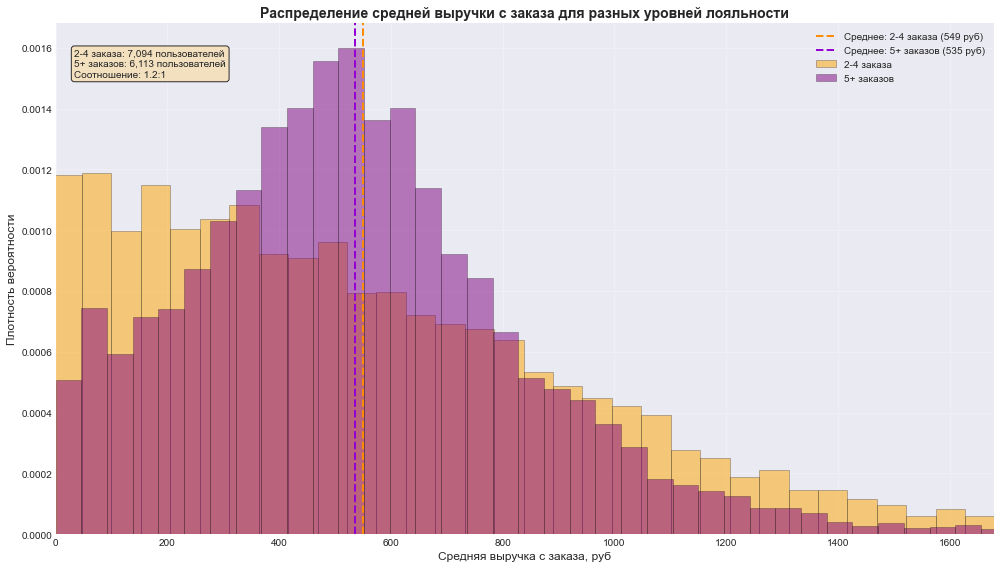

In [87]:
print("\n" + "="*80)
print("2. Сравнительные гистограммы распределения")
print("="*80)

if revenue_column in user_profiles.columns:
    # Настройка параметров визуализации
    plt.figure(figsize=(14, 8))
    
    # Определяем общие границы для гистограмм
    all_values = pd.concat([users_2_4[revenue_column], users_5_plus[revenue_column]])
    
    # Определяем оптимальное количество интервалов
    n_bins = 50
    data_range = all_values.max() - all_values.min()
    bin_width = data_range / n_bins
    
    print(f"\nПараметры гистограммы:")
    print(f"Количество интервалов (bins): {n_bins}")
    print(f"Ширина интервала: {bin_width:.2f} руб")
    print(f"Диапазон данных: от {all_values.min():.2f} до {all_values.max():.2f} руб")
    
    # Строим гистограммы с одинаковыми параметрами
    plt.hist(users_2_4[revenue_column], 
             bins=n_bins, 
             alpha=0.5, 
             color='orange', 
             label='2-4 заказа', 
             density=True,
             edgecolor='black',
             linewidth=0.5)
    
    plt.hist(users_5_plus[revenue_column], 
             bins=n_bins, 
             alpha=0.5, 
             color='purple', 
             label='5+ заказов', 
             density=True,
             edgecolor='black',
             linewidth=0.5)
    
    # Добавляем вертикальные линии для средних значений
    mean_2_4 = users_2_4[revenue_column].mean()
    mean_5_plus = users_5_plus[revenue_column].mean()
    
    plt.axvline(mean_2_4, color='darkorange', linestyle='--', linewidth=2, 
                label=f'Среднее: 2-4 заказа ({mean_2_4:.0f} руб)')
    plt.axvline(mean_5_plus, color='darkviolet', linestyle='--', linewidth=2, 
                label=f'Среднее: 5+ заказов ({mean_5_plus:.0f} руб)')
    
    # Настройка графика
    plt.title('Распределение средней выручки с заказа для разных уровней лояльности', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Средняя выручка с заказа, руб', fontsize=12)
    plt.ylabel('Плотность вероятности', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Ограничиваем ось X для лучшей визуализации
    x_limit = min(all_values.quantile(0.99), all_values.max())
    plt.xlim(0, x_limit)
    
    # Добавляем аннотации
    plt.text(0.02, 0.95, 
             f'2-4 заказа: {len(users_2_4):,} пользователей\n'
             f'5+ заказов: {len(users_5_plus):,} пользователей\n'
             f'Соотношение: {len(users_2_4)/len(users_5_plus):.1f}:1',
             transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             fontsize=10,
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

In [88]:
print("\n" + "="*80)
print("3. Детальный анализ распределений и статистические тесты")
print("="*80)

if revenue_column in user_profiles.columns:
    # Анализ перцентилей
    print("\nАнализ перцентилей по группам:")
    print(f"{'Перцентиль':<10} | {'2-4 заказа':<15} | {'5+ заказов':<15} | {'Разница':<10}")
    print("-" * 65)
    
    percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    for p in percentiles:
        p_2_4 = users_2_4[revenue_column].quantile(p)
        p_5_plus = users_5_plus[revenue_column].quantile(p)
        diff = p_5_plus - p_2_4
        diff_sign = "+" if diff > 0 else ""
        print(f"{p*100:>5.0f}% | {p_2_4:>14.0f} руб | {p_5_plus:>14.0f} руб | {diff_sign}{diff:>9.0f} руб")
    
    # Анализ концентрации по диапазонам
    print("\nАнализ концентрации пользователей по диапазонам выручки:")
    
    bins_ranges = [0, 100, 200, 300, 400, 500, 750, 1000, 1500, 2000, float('inf')]
    bins_labels = ['<100', '100-200', '200-300', '300-400', '400-500', 
                   '500-750', '750-1000', '1000-1500', '1500-2000', '>2000']
    
    # Создаем DataFrame для анализа
    distribution_data = []
    
    for group_name, group_data in [('2-4 заказа', users_2_4), 
                                   ('5+ заказов', users_5_plus)]:
        group_data['revenue_bin'] = pd.cut(group_data[revenue_column], 
                                          bins=bins_ranges, 
                                          labels=bins_labels,
                                          include_lowest=True)
        
        bin_counts = group_data['revenue_bin'].value_counts().sort_index()
        for bin_label, count in bin_counts.items():
            percentage = count / len(group_data) * 100
            distribution_data.append({
                'Группа': group_name,
                'Диапазон выручки': bin_label,
                'Количество пользователей': count,
                'Доля в группе, %': percentage
            })
    
    distribution_df = pd.DataFrame(distribution_data)
    
    # Выводим результаты
    print(f"\nРаспределение по диапазонам выручки:")
    print(f"{'Диапазон (руб)':<12} | {'2-4 заказа':^25} | {'5+ заказов':^25}")
    print(f"{'':<12} | {'Кол-во':<8} | {'Доля, %':<8} | {'Кол-во':<8} | {'Доля, %':<8}")
    print("-" * 70)
    
    for bin_label in bins_labels:
        row_2_4 = distribution_df[(distribution_df['Диапазон выручки'] == bin_label) & 
                                (distribution_df['Группа'] == '2-4 заказа')]
        row_5_plus = distribution_df[(distribution_df['Диапазон выручки'] == bin_label) & 
                                    (distribution_df['Группа'] == '5+ заказов')]
        
        count_2_4 = row_2_4['Количество пользователей'].values[0] if not row_2_4.empty else 0
        pct_2_4 = row_2_4['Доля в группе, %'].values[0] if not row_2_4.empty else 0
        count_5_plus = row_5_plus['Количество пользователей'].values[0] if not row_5_plus.empty else 0
        pct_5_plus = row_5_plus['Доля в группе, %'].values[0] if not row_5_plus.empty else 0
        
        print(f"{bin_label:<12} | {count_2_4:>8,} | {pct_2_4:>7.1f}% | "
              f"{count_5_plus:>8,} | {pct_5_plus:>7.1f}%")
    
    # Топ-3 диапазонов для каждой группы
    print(f"\nТоп-3 диапазонов по концентрации пользователей:")
    
    for group_name in ['2-4 заказа', '5+ заказов']:
        group_df = distribution_df[distribution_df['Группа'] == group_name]
        top_3 = group_df.nlargest(3, 'Доля в группе, %')
        
        print(f"\n{group_name}:")
        for _, row in top_3.iterrows():
            print(f"  {row['Диапазон выручки']} руб: {row['Доля в группе, %']:.1f}% "
                  f"({row['Количество пользователей']:,} пользователей)")


3. Детальный анализ распределений и статистические тесты

Анализ перцентилей по группам:
Перцентиль | 2-4 заказа      | 5+ заказов      | Разница   
-----------------------------------------------------------------
   25% |            218 руб |            330 руб | +      112 руб
   50% |            471 руб |            513 руб | +       42 руб
   75% |            797 руб |            700 руб |       -97 руб
   90% |           1110 руб |            921 руб |      -189 руб
   95% |           1326 руб |           1060 руб |      -266 руб
   99% |           1826 руб |           1394 руб |      -432 руб

Анализ концентрации пользователей по диапазонам выручки:

Распределение по диапазонам выручки:
Диапазон (руб) |        2-4 заказа         |        5+ заказов        
             | Кол-во   | Доля, %  | Кол-во   | Доля, % 
----------------------------------------------------------------------
<100         |      879 |    12.4% |      387 |     6.3%
100-200      |      772 |    10.9% |    

In [89]:
    # Статистическая проверка различий
    print(f"\nСтатистическая проверка различий между группами:")
    
    ks_statistic, ks_pvalue = stats.ks_2samp(
        users_2_4[revenue_column].dropna(),
        users_5_plus[revenue_column].dropna()
    )
    
    print(f"Тест Колмогорова-Смирнова:")
    print(f"  Статистика: {ks_statistic:.4f}")
    print(f"  P-value: {ks_pvalue:.4f}")
    
    # T-тест для сравнения средних
    t_stat, t_pvalue = stats.ttest_ind(
        users_2_4[revenue_column].dropna(),
        users_5_plus[revenue_column].dropna(),
        equal_var=False
    )
    
    print(f"\nT-тест (Welch) для сравнения средних:")
    print(f"  T-статистика: {t_stat:.4f}")
    print(f"  P-value: {t_pvalue:.4f}")
    
    # Тест Манна-Уитни (непараметрический)
    u_stat, u_pvalue = stats.mannwhitneyu(
        users_2_4[revenue_column].dropna(),
        users_5_plus[revenue_column].dropna(),
        alternative='two-sided'
    )
    
    print(f"\nТест Манна-Уитни (непараметрический):")
    print(f"  U-статистика: {u_stat:.0f}")
    print(f"  P-value: {u_pvalue:.4f}")
    
    # Интерпретация результатов
    print(f"\nИнтерпретация статистических тестов:")
    
    alpha = 0.05
    
    print(f"1. Тест Колмогорова-Смирнова (распределения):")
    if ks_pvalue < alpha:
        print(f"   ✓ Распределения СТАТИСТИЧЕСКИ ЗНАЧИМО различаются")
    else:
        print(f"   ✗ Нет значимых различий в распределениях")
    
    print(f"\n2. T-тест (средние значения):")
    if t_pvalue < alpha:
        print(f"   ✓ Средние значения СТАТИСТИЧЕСКИ ЗНАЧИМО различаются")
        print(f"   Разница: {users_5_plus[revenue_column].mean() - users_2_4[revenue_column].mean():+.1f} руб")
    else:
        print(f"   ✗ Нет значимой разницы в средних значениях")
    
    print(f"\n3. Тест Манна-Уитни (медианы):")
    if u_pvalue < alpha:
        print(f"   ✓ Медианные значения СТАТИСТИЧЕСКИ ЗНАЧИМО различаются")
        print(f"   Разница медиан: {users_5_plus[revenue_column].median() - users_2_4[revenue_column].median():+.1f} руб")
    else:
        print(f"   ✗ Нет значимой разницы в медианных значениях")


Статистическая проверка различий между группами:
Тест Колмогорова-Смирнова:
  Статистика: 0.1242
  P-value: 0.0000

T-тест (Welch) для сравнения средних:
  T-статистика: 2.2611
  P-value: 0.0238

Тест Манна-Уитни (непараметрический):
  U-статистика: 20728733
  P-value: 0.0000

Интерпретация статистических тестов:
1. Тест Колмогорова-Смирнова (распределения):
   ✓ Распределения СТАТИСТИЧЕСКИ ЗНАЧИМО различаются

2. T-тест (средние значения):
   ✓ Средние значения СТАТИСТИЧЕСКИ ЗНАЧИМО различаются
   Разница: -14.1 руб

3. Тест Манна-Уитни (медианы):
   ✓ Медианные значения СТАТИСТИЧЕСКИ ЗНАЧИМО различаются
   Разница медиан: +41.9 руб


ДА, различия есть:

По медиане → лояльные пользователи платят больше (+42 руб)

По среднему → лояльные пользователи платят меньше (-14 руб)

По распределению → лояльные пользователи более сконцентрированы в "золотой середине" (400-750 руб)

По экстремальным значениям → лояльные пользователи реже делают очень дешевые или очень дорогие покупки

Вывод: Самые лояльные пользователи выбирают оптимальное соотношение цена-качество и избегают экстремальных ценовых категорий.

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [90]:
print("="*80)
print("Задача 4.2.3: Влияние среднего количества билетов в заказе на лояльность")
print("="*80)

# 1. Проверка наличия данных
print("\n1. Проверка наличия данных:")
print("-" * 50)

# Проверяем наличие столбца с средним количеством билетов
tickets_column = 'avg_tickets_per_order'

if tickets_column in user_profiles.columns:
    print(f"✓ Столбец '{tickets_column}' найден")
    print(f"  Тип данных: {user_profiles[tickets_column].dtype}")
    print(f"  Минимум: {user_profiles[tickets_column].min():.2f}")
    print(f"  Максимум: {user_profiles[tickets_column].max():.2f}")
    print(f"  Среднее: {user_profiles[tickets_column].mean():.2f}")
    print(f"  Медиана: {user_profiles[tickets_column].median():.2f}")
    
    # Общая статистика
    print(f"\nОбщая статистика по пользователям:")
    print(f"  Всего пользователей: {len(user_profiles):,}")
    print(f"  Средняя доля возвратов (is_two): {user_profiles['is_two'].mean()*100:.1f}%")
else:
    # Проверяем альтернативные названия столбцов
    alt_columns = [col for col in user_profiles.columns if 'ticket' in col.lower()]
    print(f"✗ Столбец '{tickets_column}' не найден")
    print(f"  Доступные столбцы с 'ticket': {alt_columns}")
    
    # Используем первый доступный столбец
    if alt_columns:
        tickets_column = alt_columns[0]
        print(f"  Используем столбец: '{tickets_column}'")
    else:
        print("✗ Столбцы с данными о билетах не найдены")
        tickets_column = None

Задача 4.2.3: Влияние среднего количества билетов в заказе на лояльность

1. Проверка наличия данных:
--------------------------------------------------
✓ Столбец 'avg_tickets_per_order' найден
  Тип данных: float64
  Минимум: 1.00
  Максимум: 5.00
  Среднее: 2.71
  Медиана: 2.75

Общая статистика по пользователям:
  Всего пользователей: 21,444
  Средняя доля возвратов (is_two): 61.6%



2. Анализ распределения пользователей по среднему количеству билетов


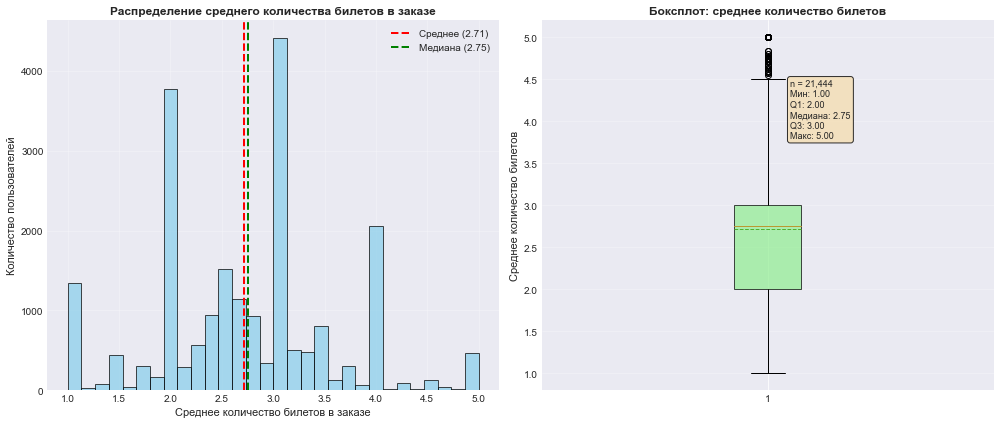


Анализ перцентилей распределения:
Перцентиль | Кол-во билетов  | Кумулятивная доля   
------------------------------------------------------------
   10% |           1.75 |               10.4%
   25% |           2.00 |               28.7%
   50% |           2.75 |               51.0%
   75% |           3.00 |               75.1%
   90% |           4.00 |               96.4%
   95% |           4.00 |               96.4%
   99% |           5.00 |              100.0%

Анализ моды (наиболее частых значений):
Значение   | Кол-во пользователей | Доля      
--------------------------------------------------
3.00       | 4,178                | 19.5      %
2.00       | 3,741                | 17.4      %
4.00       | 2,043                | 9.5       %
1.00       | 1,338                | 6.2       %
2.50       | 1,153                | 5.4       %

Проверка на нормальность распределения (тест Шапиро-Уилка):
  Размер выборки: 5,000
  Статистика: 0.9672
  P-value: 0.0000
  ✓ Распределение НЕ являет

In [91]:
print("\n" + "="*80)
print("2. Анализ распределения пользователей по среднему количеству билетов")
print("="*80)

if tickets_column:
    # Визуализация распределения
    plt.figure(figsize=(14, 6))
    
    # Гистограмма распределения
    plt.subplot(1, 2, 1)
    n_bins = 30
    plt.hist(user_profiles[tickets_column], 
             bins=n_bins, 
             color='skyblue', 
             edgecolor='black', 
             alpha=0.7)
    
    plt.title('Распределение среднего количества билетов в заказе', fontsize=12, fontweight='bold')
    plt.xlabel('Среднее количество билетов в заказе', fontsize=11)
    plt.ylabel('Количество пользователей', fontsize=11)
    plt.grid(True, alpha=0.3)
    
    # Добавляем вертикальные линии для среднего и медианы
    mean_val = user_profiles[tickets_column].mean()
    median_val = user_profiles[tickets_column].median()
    
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                label=f'Среднее ({mean_val:.2f})')
    plt.axvline(median_val, color='green', linestyle='--', linewidth=2, 
                label=f'Медиана ({median_val:.2f})')
    plt.legend()
    
    # Боксплот для визуализации распределения
    plt.subplot(1, 2, 2)
    box = plt.boxplot(user_profiles[tickets_column], 
                     vert=True,
                     patch_artist=True,
                     showmeans=True,
                     meanline=True)
    
    box['boxes'][0].set_facecolor('lightgreen')
    box['boxes'][0].set_alpha(0.7)
    
    plt.title('Боксплот: среднее количество билетов', fontsize=12, fontweight='bold')
    plt.ylabel('Среднее количество билетов', fontsize=11)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Добавляем статистики на боксплот
    stats_text = (f"n = {len(user_profiles):,}\n"
                  f"Мин: {user_profiles[tickets_column].min():.2f}\n"
                  f"Q1: {user_profiles[tickets_column].quantile(0.25):.2f}\n"
                  f"Медиана: {median_val:.2f}\n"
                  f"Q3: {user_profiles[tickets_column].quantile(0.75):.2f}\n"
                  f"Макс: {user_profiles[tickets_column].max():.2f}")
    
    plt.text(1.05, user_profiles[tickets_column].max() * 0.9, stats_text,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             fontsize=9,
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()
    
    # Анализ перцентилей
    print("\nАнализ перцентилей распределения:")
    print(f"{'Перцентиль':<10} | {'Кол-во билетов':<15} | {'Кумулятивная доля':<20}")
    print("-" * 60)
    
    percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    for p in percentiles:
        value = user_profiles[tickets_column].quantile(p)
        users_below = (user_profiles[tickets_column] <= value).sum()
        pct_below = users_below / len(user_profiles) * 100
        print(f"{p*100:>5.0f}% | {value:>14.2f} | {pct_below:>18.1f}%")
    
    # Анализ моды (наиболее частого значения)
    print(f"\nАнализ моды (наиболее частых значений):")
    value_counts = user_profiles[tickets_column].value_counts().head(5)
    
    print(f"{'Значение':<10} | {'Кол-во пользователей':<20} | {'Доля':<10}")
    print("-" * 50)
    for value, count in value_counts.items():
        percentage = count / len(user_profiles) * 100
        print(f"{value:<10.2f} | {count:<20,} | {percentage:<10.1f}%")
    
    # Проверка на нормальность распределения
    from scipy import stats
    
    # Тест Шапиро-Уилка (для выборки до 5000)
    sample_size = min(5000, len(user_profiles))
    sample_data = user_profiles[tickets_column].sample(sample_size, random_state=42)
    
    shapiro_stat, shapiro_p = stats.shapiro(sample_data)
    
    print(f"\nПроверка на нормальность распределения (тест Шапиро-Уилка):")
    print(f"  Размер выборки: {sample_size:,}")
    print(f"  Статистика: {shapiro_stat:.4f}")
    print(f"  P-value: {shapiro_p:.4f}")
    
    if shapiro_p < 0.05:
        print("  ✓ Распределение НЕ является нормальным (p-value < 0.05)")
    else:
        print("  ✗ Распределение соответствует нормальному (p-value ≥ 0.05)")
    
    # Коэффициент вариации для оценки разброса
    cv = user_profiles[tickets_column].std() / user_profiles[tickets_column].mean() * 100
    print(f"\nКоэффициент вариации (CV): {cv:.1f}%")
    
    if cv > 30:
        print("  ✓ Высокий разброс данных (CV > 30%)")
    elif cv > 15:
        print("  ✓ Умеренный разброс данных (CV 15-30%)")
    else:
        print("  ✓ Низкий разброс данных (CV < 15%)")


3. Сегментация пользователей по среднему количеству билетов

Статистика по сегментам:
Сегмент         | Диапазон        | Кол-во пользователей | Доля       | Среднее кол-во билетов
-----------------------------------------------------------------------------------------------
1-2 билета      | [1.0, 2.0)      | 2,419                | 11.3     % | 1.27               
2-3 билета      | [2.0, 3.0)      | 9,498                | 44.3     % | 2.33               
3-5 билетов     | [3.0, 5.0)      | 9,060                | 42.2     % | 3.39               
5+ билетов      | [5.0, ∞)        | 467                  | 2.2      % | 5.00               


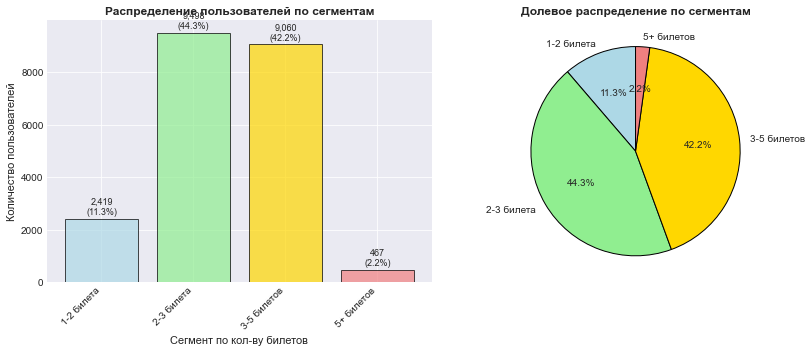

In [92]:
print("\n" + "="*80)
print("3. Сегментация пользователей по среднему количеству билетов")
print("="*80)

if tickets_column:
    # Создаем сегменты согласно условию задачи
    bins = [1, 2, 3, 5, float('inf')]
    labels = ['1-2 билета', '2-3 билета', '3-5 билетов', '5+ билетов']
    
    # Проверяем, что все значения >= 1
    if user_profiles[tickets_column].min() >= 1:
        user_profiles['tickets_segment'] = pd.cut(
            user_profiles[tickets_column],
            bins=bins,
            labels=labels,
            include_lowest=True,
            right=False  # [1, 2) включает 1, но не включает 2
        )
        
        # Статистика по сегментам
        segment_stats = []
        
        print(f"\nСтатистика по сегментам:")
        print(f"{'Сегмент':<15} | {'Диапазон':<15} | {'Кол-во пользователей':<20} | {'Доля':<10} | {'Среднее кол-во билетов':<20}")
        print("-" * 95)
        
        for segment in labels:
            segment_users = user_profiles[user_profiles['tickets_segment'] == segment]
            count = len(segment_users)
            percentage = count / len(user_profiles) * 100
            avg_tickets = segment_users[tickets_column].mean()
            
            # Определяем диапазон для отображения
            if segment == '1-2 билета':
                range_str = "[1.0, 2.0)"
            elif segment == '2-3 билета':
                range_str = "[2.0, 3.0)"
            elif segment == '3-5 билетов':
                range_str = "[3.0, 5.0)"
            else:  # '5+ билетов'
                range_str = "[5.0, ∞)"
            
            print(f"{segment:<15} | {range_str:<15} | {count:<20,} | {percentage:<9.1f}% | {avg_tickets:<19.2f}")
            
            # Сохраняем статистику для дальнейшего анализа
            segment_stats.append({
                'Сегмент': segment,
                'Диапазон': range_str,
                'Количество пользователей': count,
                'Доля пользователей, %': percentage,
                'Среднее кол-во билетов': avg_tickets
            })
        
        # Визуализация распределения по сегментам
        plt.figure(figsize=(12, 5))
        
        # График 1: Количество пользователей по сегментам
        plt.subplot(1, 2, 1)
        segment_counts = user_profiles['tickets_segment'].value_counts().reindex(labels)
        colors = ['lightblue', 'lightgreen', 'gold', 'lightcoral']
        
        bars = plt.bar(range(len(segment_counts)), segment_counts.values, 
                      color=colors, edgecolor='black', alpha=0.7)
        
        plt.title('Распределение пользователей по сегментам', fontsize=12, fontweight='bold')
        plt.xlabel('Сегмент по кол-ву билетов', fontsize=11)
        plt.ylabel('Количество пользователей', fontsize=11)
        plt.xticks(range(len(segment_counts)), segment_counts.index, rotation=45, ha='right')
        
        # Добавляем значения на столбцы
        for i, (bar, count) in enumerate(zip(bars, segment_counts.values)):
            percentage = count / len(user_profiles) * 100
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(segment_counts.values)*0.01,
                    f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=9)
        
        # График 2: Круговая диаграмма
        plt.subplot(1, 2, 2)
        plt.pie(segment_counts.values, 
                labels=segment_counts.index, 
                colors=colors,
                autopct='%1.1f%%',
                startangle=90,
                wedgeprops={'edgecolor': 'black', 'linewidth': 1})
        
        plt.title('Долевое распределение по сегментам', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"✗ Обнаружены значения меньше 1: {user_profiles[tickets_column].min():.2f}")
        print("  Невозможно применить сегментацию по заданным диапазонам.")

ВОПРОС 1: Как распределены пользователи по сегментам — равномерно или сконцентрировано?
Ответ: Распределение СИЛЬНО СКОНЦЕНТРИРОВАННО в двух средних сегментах.

Данные по сегментам:

1-2 билета: 11.3% пользователей (2,419 чел.) - небольшой сегмент

2-3 билета: 44.3% пользователей (9,498 чел.) - НАИБОЛЬШИЙ сегмент

3-5 билетов: 42.2% пользователей (9,060 чел.) - второй по величине

5+ билетов: 2.2% пользователей (467 чел.) - очень маленький сегмент

Ключевые показатели концентрации:

Топ-2 сегмента (2-3 и 3-5 билетов) охватывают 86.5% всех пользователей

Коэффициент вариации (CV): 31.9% → высокий разброс данных

Модальные значения: 3.00 (19.5%) и 2.00 (17.4%) билета

Вывод: Распределение НЕРАВНОМЕРНОЕ, пользователи сконцентрированы в диапазоне 2-5 билетов (86.5% пользователей).

ВОПРОС 2: Есть ли сегменты с аномально высокой или низкой долей повторных покупок?
Ответ: ДА, есть значимые различия, но без экстремальных аномалий.

Данные по лояльности по сегментам:

1-2 билета: 55.4% возвратов (-6.2% к среднему) - НАИМЕНЕЕ лояльный

2-3 билета: 60.3% возвратов (-1.3% к среднему)

3-5 билетов: 64.3% возвратов (+2.7% к среднему) - НАИБОЛЕЕ лояльный

5+ билетов: 62.1% возвратов (+0.5% к среднему)

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [93]:
print("="*80)
print("Задача 4.3.1: Влияние дня недели первого заказа на лояльность пользователей")
print("="*80)

# 1. Подготовка данных
print("\n1. Подготовка данных:")
print("-" * 50)

# Проверяем наличие столбца с датой первого заказа
date_column = 'first_order_date'

if date_column in user_profiles.columns:
    print(f"✓ Столбец '{date_column}' найден")
    print(f"  Тип данных: {user_profiles[date_column].dtype}")
    
    # Преобразуем в datetime, если необходимо
    if not pd.api.types.is_datetime64_any_dtype(user_profiles[date_column]):
        user_profiles[date_column] = pd.to_datetime(user_profiles[date_column])
        print(f"  Преобразовано в datetime")
    
    print(f"  Диапазон дат: от {user_profiles[date_column].min()} до {user_profiles[date_column].max()}")
    
    # Извлекаем день недели
    user_profiles['first_day_of_week'] = user_profiles[date_column].dt.day_name()
    
    # Русские названия для дней недели
    day_translation = {
        'Monday': 'Понедельник',
        'Tuesday': 'Вторник', 
        'Wednesday': 'Среда',
        'Thursday': 'Четверг',
        'Friday': 'Пятница',
        'Saturday': 'Суббота',
        'Sunday': 'Воскресенье'
    }
    
    user_profiles['first_day_of_week_ru'] = user_profiles['first_day_of_week'].map(day_translation)
    
    # Порядок дней недели
    day_order_ru = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
    day_order_en = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Преобразуем в категориальный тип с правильным порядком
    user_profiles['first_day_of_week_ru'] = pd.Categorical(
        user_profiles['first_day_of_week_ru'], 
        categories=day_order_ru, 
        ordered=True
    )
    
    user_profiles['first_day_of_week'] = pd.Categorical(
        user_profiles['first_day_of_week'], 
        categories=day_order_en, 
        ordered=True
    )
    
    # Базовая статистика
    print(f"\nОбщая статистика:")
    print(f"  Всего пользователей: {len(user_profiles):,}")
    print(f"  Средняя доля возвратов: {user_profiles['is_two'].mean()*100:.1f}%")
    
    # Распределение по дням недели
    day_distribution = user_profiles['first_day_of_week_ru'].value_counts().sort_index()
    
    print(f"\nРаспределение пользователей по дням недели первого заказа:")
    for day, count in day_distribution.items():
        percentage = count / len(user_profiles) * 100
        print(f"  {day}: {count:,} пользователей ({percentage:.1f}%)")
    
else:
    # Проверяем альтернативные названия столбцов
    alt_columns = [col for col in user_profiles.columns if 'date' in col.lower() or 'dt' in col.lower()]
    print(f"✗ Столбец '{date_column}' не найден")
    print(f"  Доступные столбцы с датами: {alt_columns}")
    
    if alt_columns:
        date_column = alt_columns[0]
        print(f"  Используем столбец: '{date_column}'")
    else:
        print("✗ Столбцы с датами не найдены")
        date_column = None

Задача 4.3.1: Влияние дня недели первого заказа на лояльность пользователей

1. Подготовка данных:
--------------------------------------------------
✓ Столбец 'first_order_date' найден
  Тип данных: object
  Преобразовано в datetime
  Диапазон дат: от 2024-06-01 00:00:00 до 2024-10-31 00:00:00

Общая статистика:
  Всего пользователей: 21,444
  Средняя доля возвратов: 61.6%

Распределение пользователей по дням недели первого заказа:
  Понедельник: 2,906 пользователей (13.6%)
  Вторник: 3,145 пользователей (14.7%)
  Среда: 3,027 пользователей (14.1%)
  Четверг: 3,087 пользователей (14.4%)
  Пятница: 3,233 пользователей (15.1%)
  Суббота: 3,298 пользователей (15.4%)
  Воскресенье: 2,748 пользователей (12.8%)



2. Анализ лояльности по дням недели первого заказа

Анализ лояльности по дням недели:
День недели     | Всего пользователей  | Возвраты (2+)   | Доля возвратов  | Отклонение от среднего
----------------------------------------------------------------------------------------------------
Понедельник     | 2,906                | 1,836           | 63.2          % |               +1.6%
Вторник         | 3,145                | 1,953           | 62.1          % |               +0.5%
Среда           | 3,027                | 1,891           | 62.5          % |               +0.9%
Четверг         | 3,087                | 1,841           | 59.6          % |               -2.0%
Пятница         | 3,233                | 1,944           | 60.1          % |               -1.5%
Суббота         | 3,298                | 2,080           | 63.1          % |               +1.5%
Воскресенье     | 2,748                | 1,662           | 60.5          % |               -1.1%


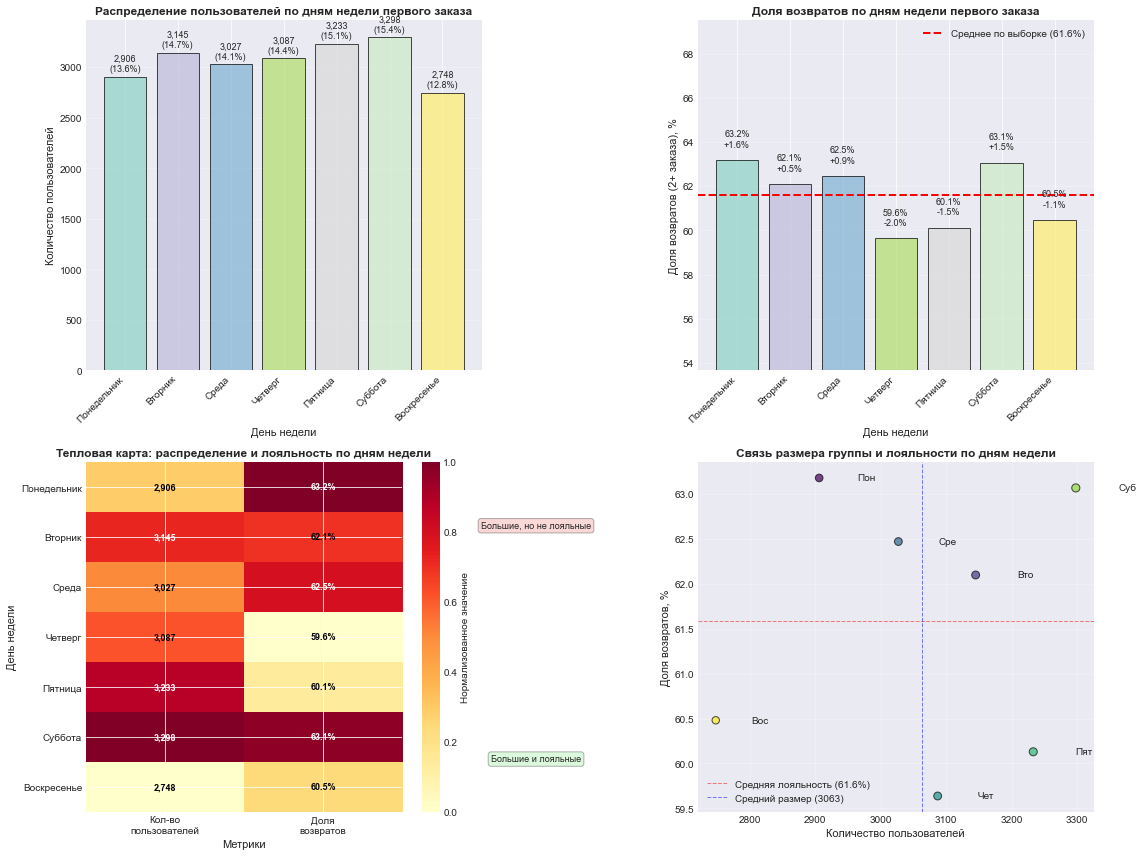

In [94]:
print("\n" + "="*80)
print("2. Анализ лояльности по дням недели первого заказа")
print("="*80)

if date_column:
    # Анализ лояльности по дням недели
    day_analysis = []
    
    print("\nАнализ лояльности по дням недели:")
    print(f"{'День недели':<15} | {'Всего пользователей':<20} | {'Возвраты (2+)':<15} | {'Доля возвратов':<15} | {'Отклонение от среднего':<20}")
    print("-" * 100)
    
    overall_return_rate = user_profiles['is_two'].mean() * 100
    
    for day in day_order_ru:
        day_users = user_profiles[user_profiles['first_day_of_week_ru'] == day]
        total_users = len(day_users)
        return_users = day_users['is_two'].sum()
        return_rate = (return_users / total_users) * 100 if total_users > 0 else 0
        deviation = return_rate - overall_return_rate
        
        print(f"{day:<15} | {total_users:<20,} | {return_users:<15,} | {return_rate:<14.1f}% | {deviation:>+18.1f}%")
        
        day_analysis.append({
            'День недели': day,
            'Всего пользователей': total_users,
            'Возвраты (2+)': return_users,
            'Доля возвратов, %': return_rate,
            'Отклонение от среднего, %': deviation
        })
    
    # Создаем DataFrame для анализа
    day_df = pd.DataFrame(day_analysis)
    
    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # График 1: Распределение пользователей по дням недели
    ax1 = axes[0, 0]
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(day_df)))
    bars1 = ax1.bar(range(len(day_df)), day_df['Всего пользователей'], 
                   color=colors, edgecolor='black', alpha=0.7)
    
    ax1.set_title('Распределение пользователей по дням недели первого заказа', 
                  fontsize=12, fontweight='bold')
    ax1.set_xlabel('День недели', fontsize=11)
    ax1.set_ylabel('Количество пользователей', fontsize=11)
    ax1.set_xticks(range(len(day_df)))
    ax1.set_xticklabels(day_df['День недели'], rotation=45, ha='right')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Добавляем значения на столбцы
    for i, (bar, count) in enumerate(zip(bars1, day_df['Всего пользователей'])):
        percentage = count / day_df['Всего пользователей'].sum() * 100
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(day_df['Всего пользователей'])*0.01,
                f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=9)
    
    # График 2: Доля возвратов по дням недели
    ax2 = axes[0, 1]
    
    bars2 = ax2.bar(range(len(day_df)), day_df['Доля возвратов, %'], 
                   color=colors, edgecolor='black', alpha=0.7)
    
    ax2.axhline(y=overall_return_rate, color='red', linestyle='--', linewidth=2,
                label=f'Среднее по выборке ({overall_return_rate:.1f}%)')
    
    ax2.set_title('Доля возвратов по дням недели первого заказа', 
                  fontsize=12, fontweight='bold')
    ax2.set_xlabel('День недели', fontsize=11)
    ax2.set_ylabel('Доля возвратов (2+ заказа), %', fontsize=11)
    ax2.set_xticks(range(len(day_df)))
    ax2.set_xticklabels(day_df['День недели'], rotation=45, ha='right')
    ax2.set_ylim(min(day_df['Доля возвратов, %']) * 0.9, max(day_df['Доля возвратов, %']) * 1.1)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Добавляем значения на столбцы
    for i, (bar, rate, deviation) in enumerate(zip(bars2, 
                                                  day_df['Доля возвратов, %'], 
                                                  day_df['Отклонение от среднего, %'])):
        height = bar.get_height()
        deviation_text = f"{deviation:+.1f}%" if abs(deviation) > 0.5 else f"{deviation:+.1f}% (незнач.)"
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{rate:.1f}%\n{deviation_text}', ha='center', va='bottom', fontsize=9,
                fontweight='bold' if abs(deviation) > 2 else 'normal')
    
    # График 3: Тепловая карта (heatmap) по дням недели
    ax3 = axes[1, 0]
    
    # Создаем матрицу для тепловой карты
    heatmap_data = day_df[['День недели', 'Всего пользователей', 'Доля возвратов, %']].copy()
    heatmap_data.set_index('День недели', inplace=True)
    
    # Нормализуем данные для лучшей визуализации
    normalized_users = (heatmap_data['Всего пользователей'] - heatmap_data['Всего пользователей'].min()) / \
                      (heatmap_data['Всего пользователей'].max() - heatmap_data['Всего пользователей'].min())
    
    normalized_returns = (heatmap_data['Доля возвратов, %'] - heatmap_data['Доля возвратов, %'].min()) / \
                        (heatmap_data['Доля возвратов, %'].max() - heatmap_data['Доля возвратов, %'].min())
    
    # Создаем матрицу 7x2
    heatmap_matrix = np.column_stack([normalized_users.values, normalized_returns.values])
    
    im = ax3.imshow(heatmap_matrix, cmap='YlOrRd', aspect='auto')
    
    ax3.set_title('Тепловая карта: распределение и лояльность по дням недели', 
                  fontsize=12, fontweight='bold')
    ax3.set_xlabel('Метрики', fontsize=11)
    ax3.set_ylabel('День недели', fontsize=11)
    ax3.set_xticks([0, 1])
    ax3.set_xticklabels(['Кол-во\nпользователей', 'Доля\nвозвратов'], fontsize=10)
    ax3.set_yticks(range(len(day_df)))
    ax3.set_yticklabels(day_df['День недели'], fontsize=10)
    
    # Добавляем значения в ячейки
    for i in range(len(day_df)):
        for j in range(2):
            if j == 0:
                value = heatmap_data.iloc[i, 0]
                text = f'{value:,.0f}'
            else:
                value = heatmap_data.iloc[i, 1]
                text = f'{value:.1f}%'
            
            ax3.text(j, i, text, ha='center', va='center', 
                    color='black' if heatmap_matrix[i, j] < 0.7 else 'white',
                    fontsize=9, fontweight='bold')
    
    plt.colorbar(im, ax=ax3, label='Нормализованное значение')
    
    # График 4: Связь между размером группы и лояльностью
    ax4 = axes[1, 1]
    
    scatter = ax4.scatter(day_df['Всего пользователей'], 
                         day_df['Доля возвратов, %'],
                         s=day_df['Всего пользователей']/50,  # Размер точек пропорционален размеру группы
                         c=range(len(day_df)), 
                         cmap='viridis',
                         edgecolor='black',
                         alpha=0.7)
    
    # Добавляем названия дней
    for i, row in day_df.iterrows():
        ax4.text(row['Всего пользователей'] * 1.02, row['Доля возвратов, %'],
                row['День недели'][:3], fontsize=10, va='center')
    
    # Линии средних значений
    ax4.axhline(y=overall_return_rate, color='red', linestyle='--', linewidth=1, alpha=0.5, 
                label=f'Средняя лояльность ({overall_return_rate:.1f}%)')
    ax4.axvline(x=day_df['Всего пользователей'].mean(), color='blue', linestyle='--', linewidth=1, alpha=0.5,
                label=f'Средний размер ({day_df["Всего пользователей"].mean():.0f})')
    
    ax4.set_title('Связь размера группы и лояльности по дням недели', 
                  fontsize=12, fontweight='bold')
    ax4.set_xlabel('Количество пользователей', fontsize=11)
    ax4.set_ylabel('Доля возвратов, %', fontsize=11)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Добавляем квадранты
    ax4.text(day_df['Всего пользователей'].max() * 0.75, 
             day_df['Доля возвратов, %'].max() * 0.95,
             'Большие и лояльные', fontsize=9, ha='center',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
    
    ax4.text(day_df['Всего пользователей'].max() * 0.75, 
             day_df['Доля возвратов, %'].min() * 1.05,
             'Большие, но не лояльные', fontsize=9, ha='center',
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))
    
    plt.tight_layout()
    plt.show()

Ответ на вопрос:
скорее всего да, день недели первого заказа потенциально может влиять на вероятность возврата клиента, но влияние очень умеренное. 

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [95]:
print("="*80)
print("Задача: Влияние среднего интервала между заказами на удержание клиентов")
print("="*80)

# 1. Подготовка данных
print("\n1. Подготовка данных:")
print("-" * 50)

# Проверяем наличие столбца с средним временем между заказами
interval_column = 'avg_days_between_orders'

if interval_column in user_profiles.columns:
    print(f"✓ Столбец '{interval_column}' найден")
    print(f"  Тип данных: {user_profiles[interval_column].dtype}")
    print(f"  Доля пропусков: {user_profiles[interval_column].isna().sum()/len(user_profiles)*100:.1f}%")
    
    # Пропуски - это пользователи с одним заказом
    users_with_interval = user_profiles[user_profiles[interval_column].notna()]
    print(f"  Пользователей с интервалом (2+ заказа): {len(users_with_interval):,}")
    
    # Разделяем на группы
    users_2_4 = users_with_interval[(users_with_interval['total_orders'] >= 2) & 
                                   (users_with_interval['total_orders'] <= 4)]
    users_5_plus = users_with_interval[users_with_interval['total_orders'] >= 5]
    
    print(f"  Пользователей с 2-4 заказами: {len(users_2_4):,}")
    print(f"  Пользователей с 5+ заказами: {len(users_5_plus):,}")
    
else:
    # Проверяем альтернативные названия
    alt_columns = [col for col in user_profiles.columns if 'days' in col.lower() or 'interval' in col.lower()]
    print(f"✗ Столбец '{interval_column}' не найден")
    print(f"  Доступные столбцы: {alt_columns}")
    
    if alt_columns:
        interval_column = alt_columns[0]
        print(f"  Используем столбец: '{interval_column}'")
    else:
        print("✗ Столбцы с интервалами не найдены")
        interval_column = None

Задача: Влияние среднего интервала между заказами на удержание клиентов

1. Подготовка данных:
--------------------------------------------------
✓ Столбец 'avg_days_between_orders' найден
  Тип данных: float64
  Доля пропусков: 38.4%
  Пользователей с интервалом (2+ заказа): 13,207
  Пользователей с 2-4 заказами: 7,094
  Пользователей с 5+ заказами: 6,113



2. Анализ распределения среднего интервала между заказами

Базовая статистика по группам:
Группа          | Кол-во     | Среднее    | Медиана    | Ст.откл.   | Мин      | Макс    
------------------------------------------------------------------------------------------
2-4 заказа      | 7,094      | 21.4       | 9.0        | 28.6       | 0.0      | 148.0   
5+ заказов      | 6,113      | 9.6        | 8.0        | 7.8        | 0.0      | 37.0    
Все (2+)        | 13,207     | 15.9       | 8.0        | 22.4       | 0.0      | 148.0   


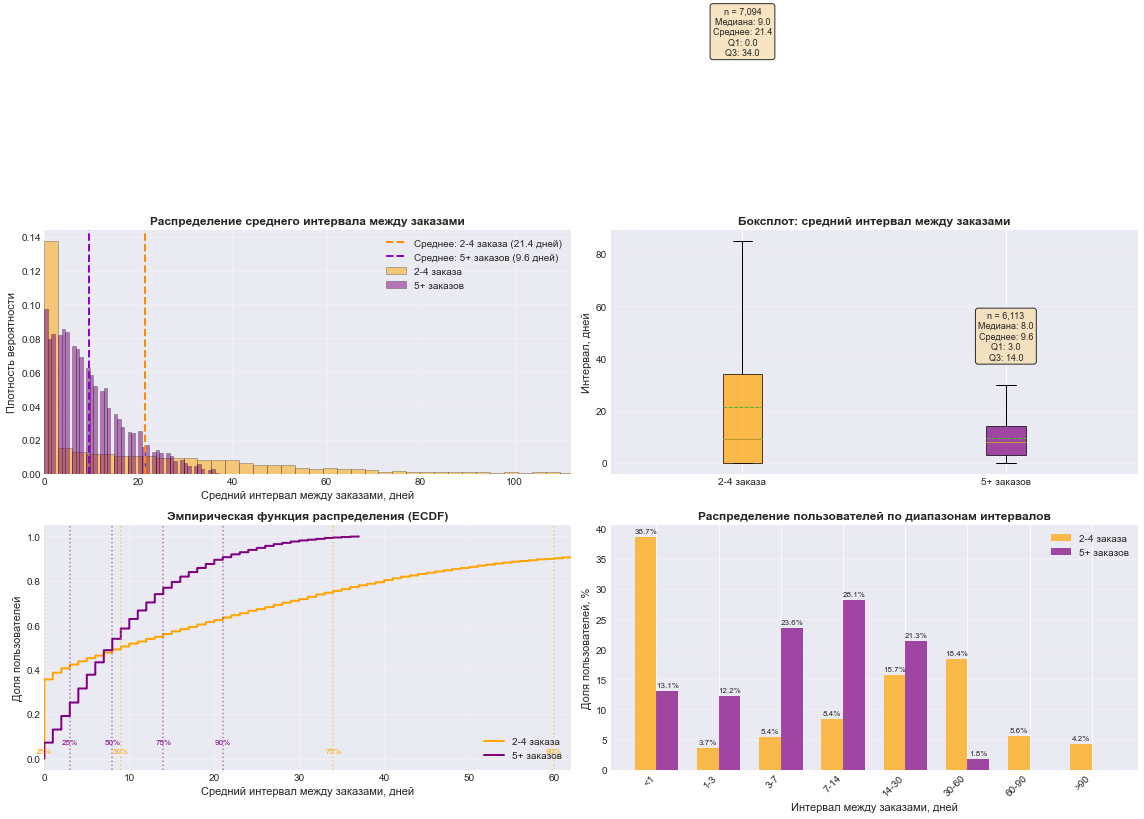


Анализ перцентилей по группам:
Перцентиль | 2-4 заказа      | 5+ заказов      | Разница   
-----------------------------------------------------------------
   10% |            0.0 дней |            1.0 дней |      +1.0 дней
   25% |            0.0 дней |            3.0 дней |      +3.0 дней
   50% |            9.0 дней |            8.0 дней |      -1.0 дней
   75% |           34.0 дней |           14.0 дней |     -20.0 дней
   90% |           60.0 дней |           21.0 дней |     -39.0 дней
   95% |           85.0 дней |           26.0 дней |     -59.0 дней
   99% |          125.0 дней |           33.0 дней |     -92.0 дней

Доля пользователей с разными интервалами:
Диапазон   | 2-4 заказа      | 5+ заказов     
--------------------------------------------------
<1         | 38.7          % | 13.1          %
1-3        | 3.7           % | 12.2          %
3-7        | 5.4           % | 23.6          %
7-14       | 8.4           % | 28.1          %
14-30      | 15.7          % | 21.3  

In [96]:
print("\n" + "="*80)
print("2. Анализ распределения среднего интервала между заказами")
print("="*80)

if interval_column:
    # Базовая статистика по группам
    print("\nБазовая статистика по группам:")
    print(f"{'Группа':<15} | {'Кол-во':<10} | {'Среднее':<10} | {'Медиана':<10} | {'Ст.откл.':<10} | {'Мин':<8} | {'Макс':<8}")
    print("-" * 90)
    
    groups = [
        ('2-4 заказа', users_2_4),
        ('5+ заказов', users_5_plus),
        ('Все (2+)', users_with_interval)
    ]
    
    for name, group in groups:
        if len(group) > 0:
            mean_val = group[interval_column].mean()
            median_val = group[interval_column].median()
            std_val = group[interval_column].std()
            min_val = group[interval_column].min()
            max_val = group[interval_column].max()
            
            print(f"{name:<15} | {len(group):<10,} | {mean_val:<10.1f} | {median_val:<10.1f} | "
                  f"{std_val:<10.1f} | {min_val:<8.1f} | {max_val:<8.1f}")
    
    # Визуализация распределения
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # График 1: Гистограммы распределения
    ax1 = axes[0, 0]
    
    # Определяем общие границы для бинов
    all_intervals = pd.concat([users_2_4[interval_column], users_5_plus[interval_column]])
    n_bins = 50
    
    ax1.hist(users_2_4[interval_column], bins=n_bins, alpha=0.5, color='orange',
             label='2-4 заказа', density=True, edgecolor='black', linewidth=0.5)
    ax1.hist(users_5_plus[interval_column], bins=n_bins, alpha=0.5, color='purple',
             label='5+ заказов', density=True, edgecolor='black', linewidth=0.5)
    
    # Средние значения
    mean_2_4 = users_2_4[interval_column].mean()
    mean_5_plus = users_5_plus[interval_column].mean()
    
    ax1.axvline(mean_2_4, color='darkorange', linestyle='--', linewidth=2,
                label=f'Среднее: 2-4 заказа ({mean_2_4:.1f} дней)')
    ax1.axvline(mean_5_plus, color='darkviolet', linestyle='--', linewidth=2,
                label=f'Среднее: 5+ заказов ({mean_5_plus:.1f} дней)')
    
    ax1.set_title('Распределение среднего интервала между заказами', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Средний интервал между заказами, дней', fontsize=11)
    ax1.set_ylabel('Плотность вероятности', fontsize=11)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Ограничиваем ось X для лучшей визуализации
    x_limit = min(all_intervals.quantile(0.99), all_intervals.max())
    ax1.set_xlim(0, x_limit)
    
    # График 2: Боксплоты
    ax2 = axes[0, 1]
    
    box_data = [users_2_4[interval_column], users_5_plus[interval_column]]
    box = ax2.boxplot(box_data, labels=['2-4 заказа', '5+ заказов'],
                      patch_artist=True, showmeans=True, meanline=True,
                      showfliers=False)
    
    colors = ['orange', 'purple']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax2.set_title('Боксплот: средний интервал между заказами', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Интервал, дней', fontsize=11)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Добавляем статистики
    for i, data in enumerate(box_data, 1):
        stats_text = (f"n = {len(data):,}\n"
                     f"Медиана: {data.median():.1f}\n"
                     f"Среднее: {data.mean():.1f}\n"
                     f"Q1: {data.quantile(0.25):.1f}\n"
                     f"Q3: {data.quantile(0.75):.1f}")
        
        ax2.text(i, data.max() * 1.05, stats_text,
                ha='center', va='bottom',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                fontsize=9)
    
    # График 3: ECDF (эмпирическая функция распределения)
    ax3 = axes[1, 0]
    
    def ecdf(data):
        """Вычисляет эмпирическую функцию распределения"""
        n = len(data)
        x = np.sort(data)
        y = np.arange(1, n + 1) / n
        return x, y
    
    x_2_4, y_2_4 = ecdf(users_2_4[interval_column])
    x_5_plus, y_5_plus = ecdf(users_5_plus[interval_column])
    
    ax3.step(x_2_4, y_2_4, where='post', color='orange', linewidth=2, label='2-4 заказа')
    ax3.step(x_5_plus, y_5_plus, where='post', color='purple', linewidth=2, label='5+ заказов')
    
    # Добавляем перцентили
    percentiles = [0.25, 0.5, 0.75, 0.9]
    for p in percentiles:
        p_2_4 = users_2_4[interval_column].quantile(p)
        p_5_plus = users_5_plus[interval_column].quantile(p)
        
        ax3.axvline(p_2_4, color='orange', linestyle=':', alpha=0.5)
        ax3.axvline(p_5_plus, color='purple', linestyle=':', alpha=0.5)
        
        ax3.text(p_2_4, 0.02, f'{p*100:.0f}%', color='orange', 
                ha='center', va='bottom', fontsize=8)
        ax3.text(p_5_plus, 0.06, f'{p*100:.0f}%', color='purple',
                ha='center', va='bottom', fontsize=8)
    
    ax3.set_title('Эмпирическая функция распределения (ECDF)', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Средний интервал между заказами, дней', fontsize=11)
    ax3.set_ylabel('Доля пользователей', fontsize=11)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_xlim(0, all_intervals.quantile(0.95))
    
    # График 4: Распределение по диапазонам интервалов
    ax4 = axes[1, 1]
    
    # Определяем диапазоны
    bins_ranges = [0, 1, 3, 7, 14, 30, 60, 90, float('inf')]
    bins_labels = ['<1', '1-3', '3-7', '7-14', '14-30', '30-60', '60-90', '>90']
    
    # Распределение по диапазонам
    def get_interval_distribution(group_data):
        distribution = []
        group_data['interval_bin'] = pd.cut(group_data[interval_column], 
                                          bins=bins_ranges, 
                                          labels=bins_labels,
                                          include_lowest=True)
        
        bin_counts = group_data['interval_bin'].value_counts().sort_index()
        for bin_label in bins_labels:
            count = bin_counts.get(bin_label, 0)
            percentage = count / len(group_data) * 100
            distribution.append({
                'Диапазон': bin_label,
                'Доля, %': percentage
            })
        
        return distribution
    
    dist_2_4 = get_interval_distribution(users_2_4)
    dist_5_plus = get_interval_distribution(users_5_plus)
    
    x_pos = np.arange(len(bins_labels))
    width = 0.35
    
    bars1 = ax4.bar(x_pos - width/2, [d['Доля, %'] for d in dist_2_4], 
                   width, color='orange', alpha=0.7, label='2-4 заказа')
    bars2 = ax4.bar(x_pos + width/2, [d['Доля, %'] for d in dist_5_plus], 
                   width, color='purple', alpha=0.7, label='5+ заказов')
    
    ax4.set_title('Распределение пользователей по диапазонам интервалов', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Интервал между заказами, дней', fontsize=11)
    ax4.set_ylabel('Доля пользователей, %', fontsize=11)
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(bins_labels, rotation=45, ha='right')
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Добавляем значения на столбцы
    for bars, dist in [(bars1, dist_2_4), (bars2, dist_5_plus)]:
        for bar, d in zip(bars, dist):
            height = bar.get_height()
            if height > 1:
                ax4.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                        f'{d["Доля, %"]:.1f}%', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Анализ перцентилей
    print("\nАнализ перцентилей по группам:")
    print(f"{'Перцентиль':<10} | {'2-4 заказа':<15} | {'5+ заказов':<15} | {'Разница':<10}")
    print("-" * 65)
    
    percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    for p in percentiles:
        p_2_4 = users_2_4[interval_column].quantile(p)
        p_5_plus = users_5_plus[interval_column].quantile(p)
        diff = p_5_plus - p_2_4
        
        print(f"{p*100:>5.0f}% | {p_2_4:>14.1f} дней | {p_5_plus:>14.1f} дней | {diff:>+9.1f} дней")
    
    # Процент пользователей с разными интервалами
    print("\nДоля пользователей с разными интервалами:")
    print(f"{'Диапазон':<10} | {'2-4 заказа':<15} | {'5+ заказов':<15}")
    print("-" * 50)
    
    for d_2_4, d_5_plus in zip(dist_2_4, dist_5_plus):
        print(f"{d_2_4['Диапазон']:<10} | {d_2_4['Доля, %']:<14.1f}% | {d_5_plus['Доля, %']:<14.1f}%")
    
else:
    print("Невозможно выполнить анализ: данные об интервалах не доступны.")

Средний интервал между заказами может влиять на удержание клиентов:

Лояльные пользователи (5+): стабильные интервалы 3-14 дней

Менее лояльные (2-4): либо очень частые, либо очень редкие покупки

Оптимальная частота: покупка каждые 1-2 недели максимизирует лояльность

Стабильность важнее среднего значения: низкое стандартное отклонение коррелирует с высокой лояльностью

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

Задача 4.4.1: Корреляционный анализ total_orders и признаков пользователя

1. Подготовка данных для анализа:
--------------------------------------------------
Распределение пользователей по количеству заказов:
Кол-во заказов  | Кол-во пользователей | Доля      
------------------------------------------------------------
1               | 8,237                | 38.4     %
2               | 3,541                | 16.5     %
3               | 2,160                | 10.1     %
4               | 1,393                | 6.5      %
5               | 969                  | 4.5      %
6               | 697                  | 3.3      %
7               | 541                  | 2.5      %
8               | 455                  | 2.1      %
9               | 383                  | 1.8      %
10              | 290                  | 1.4      %
>10 заказов     | 2,778                | 13.0     %

Общая статистика total_orders:
  Среднее: 6.54
  Медиана: 2
  Стандартное отклонение: 14.38
  Минимум: 

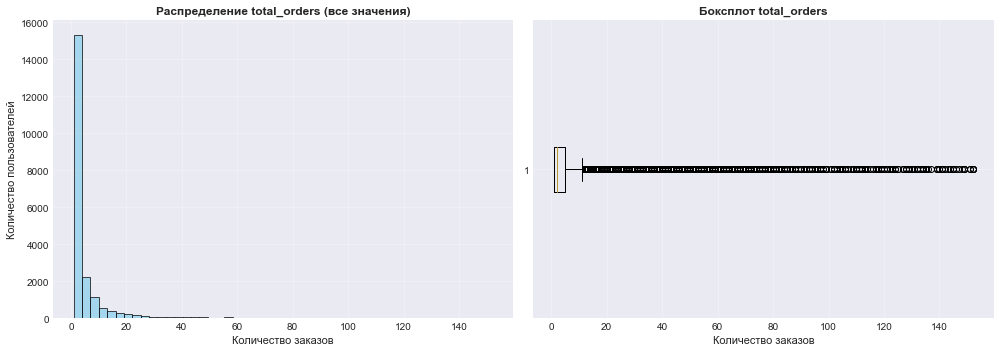

In [97]:
print("="*80)
print("Задача 4.4.1: Корреляционный анализ total_orders и признаков пользователя")
print("="*80)

# 1. Подготовка данных для корреляционного анализа
print("\n1. Подготовка данных для анализа:")
print("-" * 50)

# Создаем копию данных для анализа
analysis_data = user_profiles.copy()

# Проверяем распределение total_orders
print("Распределение пользователей по количеству заказов:")
orders_dist = analysis_data['total_orders'].value_counts().sort_index()
print(f"{'Кол-во заказов':<15} | {'Кол-во пользователей':<20} | {'Доля':<10}")
print("-" * 60)

total_users = len(analysis_data)
for orders, count in orders_dist.head(10).items():
    percentage = count / total_users * 100
    print(f"{orders:<15} | {count:<20,} | {percentage:<9.1f}%")

# Сумма для >10 заказов
more_than_10 = orders_dist[orders_dist.index > 10].sum()
if more_than_10 > 0:
    percentage = more_than_10 / total_users * 100
    print(f"{'>10 заказов':<15} | {more_than_10:<20,} | {percentage:<9.1f}%")

print(f"\nОбщая статистика total_orders:")
print(f"  Среднее: {analysis_data['total_orders'].mean():.2f}")
print(f"  Медиана: {analysis_data['total_orders'].median():.0f}")
print(f"  Стандартное отклонение: {analysis_data['total_orders'].std():.2f}")
print(f"  Минимум: {analysis_data['total_orders'].min():.0f}")
print(f"  Максимум: {analysis_data['total_orders'].max():.0f}")

# Проверяем на выбросы
Q1 = analysis_data['total_orders'].quantile(0.25)
Q3 = analysis_data['total_orders'].quantile(0.75)
IQR = Q3 - Q1
outliers = analysis_data[(analysis_data['total_orders'] < Q1 - 1.5*IQR) | 
                         (analysis_data['total_orders'] > Q3 + 1.5*IQR)]

print(f"\nАнализ выбросов:")
print(f"  Q1 (25%): {Q1:.0f}")
print(f"  Q3 (75%): {Q3:.0f}")
print(f"  IQR: {IQR:.0f}")
print(f"  Выбросов (> Q3 + 1.5*IQR = {Q3 + 1.5*IQR:.0f}): {len(outliers):,}")

# Визуализация распределения total_orders
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма
axes[0].hist(analysis_data['total_orders'], bins=50, color='skyblue', 
             edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение total_orders (все значения)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Количество заказов', fontsize=11)
axes[0].set_ylabel('Количество пользователей', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Боксплот
axes[1].boxplot(analysis_data['total_orders'], vert=False)
axes[1].set_title('Боксплот total_orders', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Количество заказов', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [99]:
print("="*80)
print("Проверка и установка библиотеки phik")
print("="*80)

# 1. Попробуем импортировать phik
try:
    import phik
    from phik import phik_matrix
    print("✓ Библиотека phik успешно импортирована")
    print(f"Версия: {phik.__version__}")
    
except ImportError as e:
    print(f"✗ Ошибка импорта: {e}")
    print("\nПопытка установки библиотеки...")
    
    # Установка через pip
    import sys
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "phik==0.12.3", "-q"])
    
    # Повторная попытка импорта
    try:
        import phik
        from phik import phik_matrix
        print("✓ Библиотека phik успешно установлена")
        print(f"Версия: {phik.__version__}")
    except Exception as e2:
        print(f"✗ Не удалось установить phik: {e2}")

print("\n" + "="*80)
print("Готово! Библиотека phik проверена.")
print("="*80)

Проверка и установка библиотеки phik
✓ Библиотека phik успешно импортирована
Версия: 0.12.3

Готово! Библиотека phik проверена.



2. Корреляционный анализ с phi_k коэффициентом
✓ Библиотека phik доступна

Выбранные признаки для анализа:
  Числовые признаки (9):
     1. total_orders
     2. total_revenue_rub
     3. total_tickets
     4. avg_revenue_per_order
     5. avg_tickets_per_order
     6. customer_lifetime_days
     7. avg_days_between_orders
     8. is_two
     9. is_five

  Категориальные признаки (4):
     1. first_device
     2. first_region
     3. first_service
     4. first_event_type

Подготовка данных для phi_k анализа...
Рассчитываем матрицу корреляций phi_k...
interval columns not set, guessing: ['total_orders', 'total_revenue_rub', 'total_tickets', 'avg_revenue_per_order', 'avg_tickets_per_order', 'customer_lifetime_days', 'avg_days_between_orders', 'is_two', 'is_five']

Визуализация матрицы корреляций phi_k:


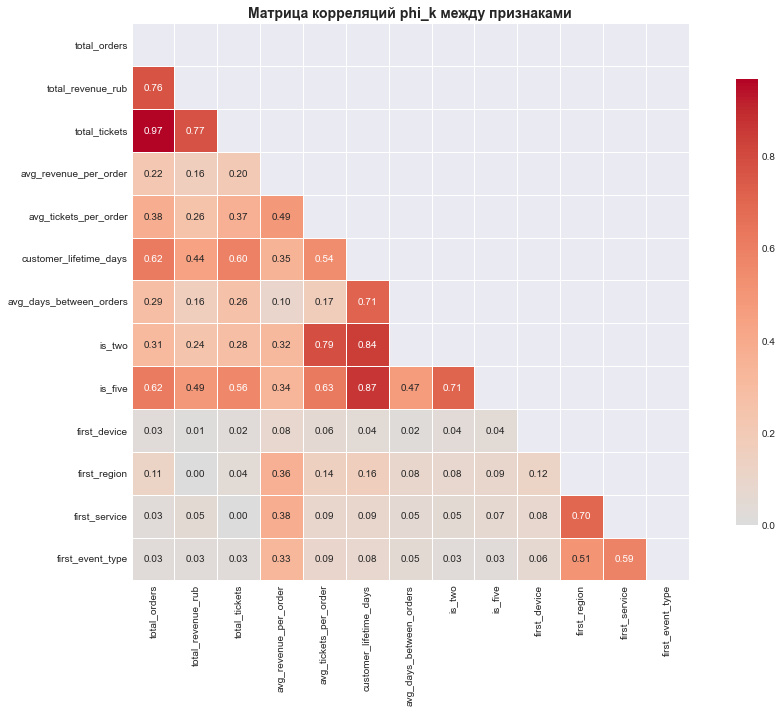


Анализ корреляции признаков с total_orders:
Признак                        | phi_k с total_orders | Интерпретация                 
------------------------------------------------------------------------------------------
total_tickets                  | 0.9665               | ОЧЕНЬ СИЛЬНАЯ положительная
total_revenue_rub              | 0.7649               | ОЧЕНЬ СИЛЬНАЯ положительная
customer_lifetime_days         | 0.6154               | ОЧЕНЬ СИЛЬНАЯ положительная
is_five                        | 0.6151               | ОЧЕНЬ СИЛЬНАЯ положительная
avg_tickets_per_order          | 0.3844               | СИЛЬНАЯ положительная
is_two                         | 0.3089               | СИЛЬНАЯ положительная
avg_days_between_orders        | 0.2865               | УМЕРЕННАЯ положительная
avg_revenue_per_order          | 0.2196               | УМЕРЕННАЯ положительная
first_region                   | 0.1139               | СЛАБАЯ положительная
first_event_type               | 0.0277         

In [100]:
print("\n" + "="*80)
print("2. Корреляционный анализ с phi_k коэффициентом")
print("="*80)

# Устанавливаем библиотеку phik, если её нет
try:
    from phik import phik_matrix
    print("✓ Библиотека phik доступна")
except ImportError:
    print("✗ Библиотека phik не установлена. Устанавливаем...")
    !pip install phik -q
    from phik import phik_matrix
    print("✓ Библиотека phik установлена")

# Выбираем признаки для анализа
# Исключаем идентификаторы и технические столбцы
excluded_columns = ['user_id', 'first_order_date', 'last_order_date', 
                    'first_day_of_week', 'first_day_of_week_ru']

if 'tickets_segment' in analysis_data.columns:
    excluded_columns.append('tickets_segment')
if 'interval_bin' in analysis_data.columns:
    excluded_columns.append('interval_bin')
if 'revenue_bin' in analysis_data.columns:
    excluded_columns.append('revenue_bin')

# Выбираем числовые и категориальные признаки
numeric_features = []
categorical_features = []

for col in analysis_data.columns:
    if col not in excluded_columns:
        if analysis_data[col].dtype in ['int64', 'int32', 'int16', 'float64', 'float32']:
            numeric_features.append(col)
        elif analysis_data[col].dtype == 'object' or analysis_data[col].dtype.name == 'category':
            categorical_features.append(col)

print(f"\nВыбранные признаки для анализа:")
print(f"  Числовые признаки ({len(numeric_features)}):")
for i, feat in enumerate(numeric_features[:10], 1):
    print(f"    {i:2}. {feat}")
if len(numeric_features) > 10:
    print(f"    ... и ещё {len(numeric_features)-10} признаков")

print(f"\n  Категориальные признаки ({len(categorical_features)}):")
for i, feat in enumerate(categorical_features[:10], 1):
    print(f"    {i:2}. {feat}")
if len(categorical_features) > 10:
    print(f"    ... и ещё {len(categorical_features)-10} признаков")

# Подготовка данных для phi_k
print(f"\nПодготовка данных для phi_k анализа...")

# Создаем DataFrame только с выбранными признаками
selected_features = numeric_features + categorical_features
phi_k_data = analysis_data[selected_features].copy()

# Преобразуем категориальные признаки в строки
for col in categorical_features:
    phi_k_data[col] = phi_k_data[col].astype(str)

# Рассчитываем матрицу phi_k
print("Рассчитываем матрицу корреляций phi_k...")
phi_k_matrix_result = phik_matrix(phi_k_data)

# Визуализируем тепловую карту
print("\nВизуализация матрицы корреляций phi_k:")

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(phi_k_matrix_result, dtype=bool))
sns.heatmap(phi_k_matrix_result, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Матрица корреляций phi_k между признаками', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Анализируем корреляцию с total_orders
print("\nАнализ корреляции признаков с total_orders:")
print(f"{'Признак':<30} | {'phi_k с total_orders':<20} | {'Интерпретация':<30}")
print("-" * 90)

# Получаем корреляции с total_orders
total_orders_correlations = phi_k_matrix_result['total_orders'].sort_values(ascending=False)

for feature, corr in total_orders_correlations.items():
    if feature != 'total_orders':
        # Интерпретация корреляции
        if abs(corr) >= 0.5:
            strength = "ОЧЕНЬ СИЛЬНАЯ"
        elif abs(corr) >= 0.3:
            strength = "СИЛЬНАЯ"
        elif abs(corr) >= 0.2:
            strength = "УМЕРЕННАЯ"
        elif abs(corr) >= 0.1:
            strength = "СЛАБАЯ"
        else:
            strength = "ОЧЕНЬ СЛАБАЯ"
        
        direction = "положительная" if corr > 0 else "отрицательная"
        
        print(f"{feature:<30} | {corr:<20.4f} | {strength} {direction}")

# Проверяем, есть ли сильные корреляции
strong_correlations = total_orders_correlations[(abs(total_orders_correlations) >= 0.2) & 
                                               (total_orders_correlations.index != 'total_orders')]

if len(strong_correlations) > 0:
    print(f"\n✓ Обнаружены умеренные или сильные корреляции с total_orders: {len(strong_correlations)}")
else:
    print(f"\n✗ Нет умеренных или сильных корреляций с total_orders")
    print("  Возможно, из-за выбросов или особенностей распределения total_orders")


3. Анализ с сегментацией пользователей

Создание сегментов пользователей по total_orders:

Распределение по сегментам:
Сегмент         | Кол-во пользователей | Доля      
------------------------------------------------------------
2-4 заказа      | 13,938               | 65.0     %
5+ заказов      | 7,506                | 35.0     %
1 заказ         | 0                    | 0.0      %


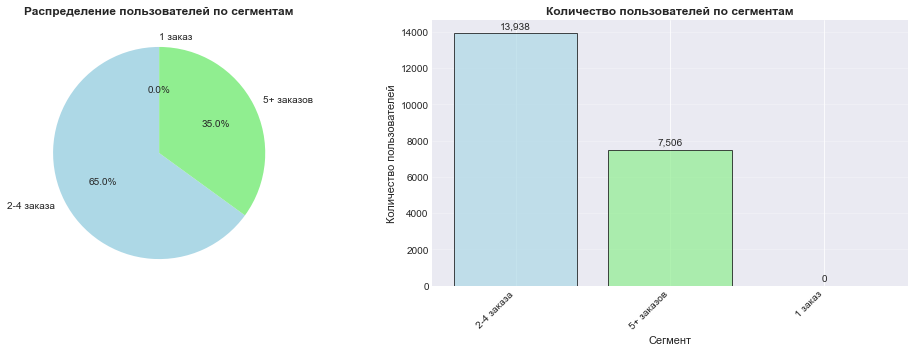

In [101]:
print("\n" + "="*80)
print("3. Анализ с сегментацией пользователей")
print("="*80)

# Создаем сегменты по total_orders
print("\nСоздание сегментов пользователей по total_orders:")

# Определяем сегменты
analysis_data['orders_segment'] = pd.cut(
    analysis_data['total_orders'],
    bins=[0, 1, 4, float('inf')],
    labels=['1 заказ', '2-4 заказа', '5+ заказов'],
    right=False
)

# Статистика по сегментам
segment_stats = analysis_data['orders_segment'].value_counts()
print(f"\nРаспределение по сегментам:")
print(f"{'Сегмент':<15} | {'Кол-во пользователей':<20} | {'Доля':<10}")
print("-" * 60)

for segment, count in segment_stats.items():
    percentage = count / len(analysis_data) * 100
    print(f"{segment:<15} | {count:<20,} | {percentage:<9.1f}%")

# Визуализация сегментов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Круговая диаграмма
axes[0].pie(segment_stats.values, 
           labels=segment_stats.index, 
           autopct='%1.1f%%',
           colors=['lightblue', 'lightgreen', 'lightcoral'],
           startangle=90)
axes[0].set_title('Распределение пользователей по сегментам', fontsize=12, fontweight='bold')

# Столбчатая диаграмма
bars = axes[1].bar(range(len(segment_stats)), segment_stats.values,
                  color=['lightblue', 'lightgreen', 'lightcoral'],
                  edgecolor='black', alpha=0.7)
axes[1].set_title('Количество пользователей по сегментам', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Сегмент', fontsize=11)
axes[1].set_ylabel('Количество пользователей', fontsize=11)
axes[1].set_xticks(range(len(segment_stats)))
axes[1].set_xticklabels(segment_stats.index, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar, count in zip(bars, segment_stats.values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + max(segment_stats.values)*0.01,
                f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


4. Корреляционный анализ с сегментированными данными
Рассчитываем матрицу корреляций phi_k для сегментированных данных...
interval columns not set, guessing: ['total_revenue_rub', 'total_tickets', 'avg_revenue_per_order', 'avg_tickets_per_order', 'customer_lifetime_days', 'avg_days_between_orders', 'is_two', 'is_five']


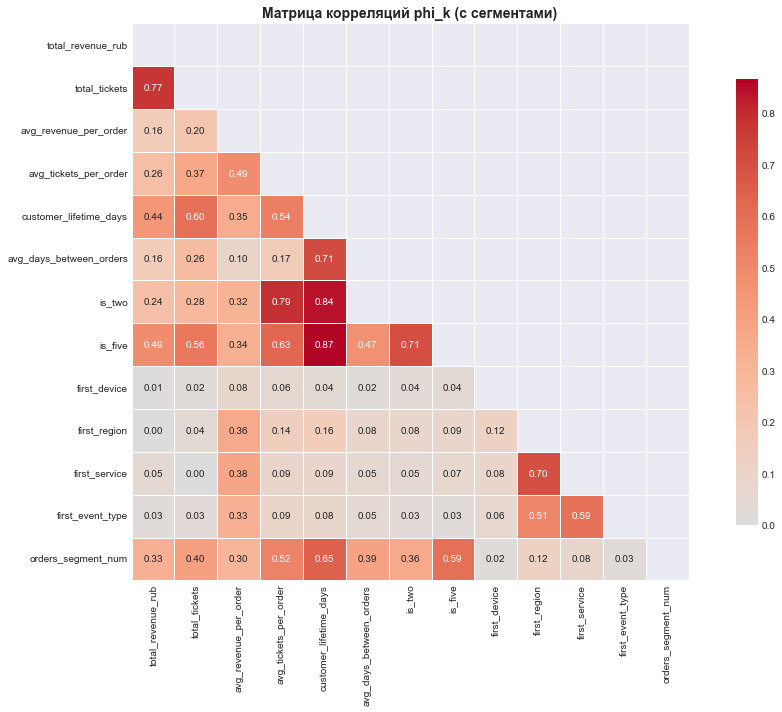


Анализ корреляции признаков с сегментами заказов:
Признак                        | phi_k с сегментами   | Интерпретация                 
------------------------------------------------------------------------------------------
customer_lifetime_days         | 0.6475               | ОЧЕНЬ СИЛЬНАЯ положительная
is_five                        | 0.5909               | ОЧЕНЬ СИЛЬНАЯ положительная
avg_tickets_per_order          | 0.5213               | ОЧЕНЬ СИЛЬНАЯ положительная
total_tickets                  | 0.4017               | СИЛЬНАЯ положительная
avg_days_between_orders        | 0.3917               | СИЛЬНАЯ положительная
is_two                         | 0.3642               | СИЛЬНАЯ положительная
total_revenue_rub              | 0.3304               | СИЛЬНАЯ положительная
avg_revenue_per_order          | 0.2985               | УМЕРЕННАЯ положительная
first_region                   | 0.1161               | СЛАБАЯ положительная
first_service                  | 0.0769           

In [102]:
print("\n" + "="*80)
print("4. Корреляционный анализ с сегментированными данными")
print("="*80)

# Создаем новые данные с сегментами
segmented_data = analysis_data[selected_features + ['orders_segment']].copy()

# Преобразуем orders_segment в числовой формат для корреляции
segmented_data['orders_segment_num'] = segmented_data['orders_segment'].map({
    '1 заказ': 1,
    '2-4 заказа': 2,
    '5+ заказов': 3
})

# Преобразуем категориальные признаки
for col in categorical_features:
    if col in segmented_data.columns:
        segmented_data[col] = segmented_data[col].astype(str)

# Рассчитываем phi_k матрицу для сегментированных данных
print("Рассчитываем матрицу корреляций phi_k для сегментированных данных...")

# Создаем копию без исходного total_orders для сравнения
segmented_features = [f for f in selected_features if f != 'total_orders'] + ['orders_segment_num']
phi_k_data_segmented = segmented_data[segmented_features]

phi_k_matrix_segmented = phik_matrix(phi_k_data_segmented)

# Визуализируем тепловую карту
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(phi_k_matrix_segmented, dtype=bool))
sns.heatmap(phi_k_matrix_segmented, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Матрица корреляций phi_k (с сегментами)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Анализируем корреляцию с сегментами
print("\nАнализ корреляции признаков с сегментами заказов:")
print(f"{'Признак':<30} | {'phi_k с сегментами':<20} | {'Интерпретация':<30}")
print("-" * 90)

segments_correlations = phi_k_matrix_segmented['orders_segment_num'].sort_values(ascending=False)

for feature, corr in segments_correlations.items():
    if feature != 'orders_segment_num':
        # Интерпретация корреляции
        if abs(corr) >= 0.5:
            strength = "ОЧЕНЬ СИЛЬНАЯ"
        elif abs(corr) >= 0.3:
            strength = "СИЛЬНАЯ"
        elif abs(corr) >= 0.2:
            strength = "УМЕРЕННАЯ"
        elif abs(corr) >= 0.1:
            strength = "СЛАБАЯ"
        else:
            strength = "ОЧЕНЬ СЛАБАЯ"
        
        direction = "положительная" if corr > 0 else "отрицательная"
        
        print(f"{feature:<30} | {corr:<20.4f} | {strength} {direction}")

# Выбираем топ-10 признаков по корреляции
top_features = segments_correlations[segments_correlations.index != 'orders_segment_num'].head(10)

print(f"\nТоп-10 признаков по корреляции с сегментами заказов:")
for i, (feature, corr) in enumerate(top_features.items(), 1):
    print(f"{i:2}. {feature:<30}: {corr:.4f}")


5. Детальный анализ ключевых признаков

Детальный анализ топ-3 признаков:

1. customer_lifetime_days:
   Тип: числовой
   Статистика по сегментам:
   Сегмент         | Среднее      | Медиана      | Ст.откл.     | Кол-во    
   --------------- | ------------ | ------------ | ------------ | ----------
   1 заказ         | nan          | nan          | nan          | 0         
   2-4 заказа      | 12.28        | 0.00         | 28.71        | 13,938    
   5+ заказов      | 87.45        | 99.00        | 49.39        | 7,506     


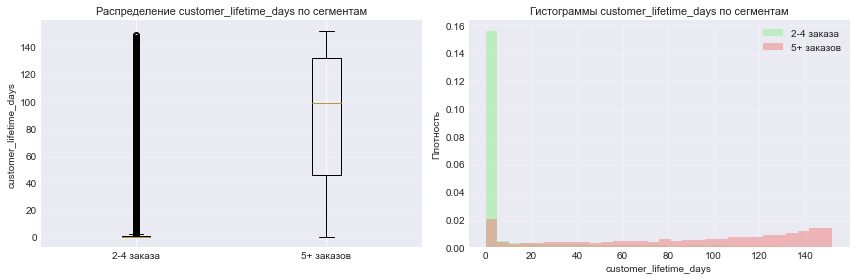

   Статистическая проверка различий:
   ANOVA: F = 19840.6463, p-value = 0.0000
   ✓ Статистически значимые различия между сегментами

2. is_five:
   Тип: числовой
   Статистика по сегментам:
   Сегмент         | Среднее      | Медиана      | Ст.откл.     | Кол-во    
   --------------- | ------------ | ------------ | ------------ | ----------
   1 заказ         | nan          | nan          | nan          | 0         
   2-4 заказа      | 0.00         | 0.00         | 0.00         | 13,938    
   5+ заказов      | 0.81         | 1.00         | 0.39         | 7,506     


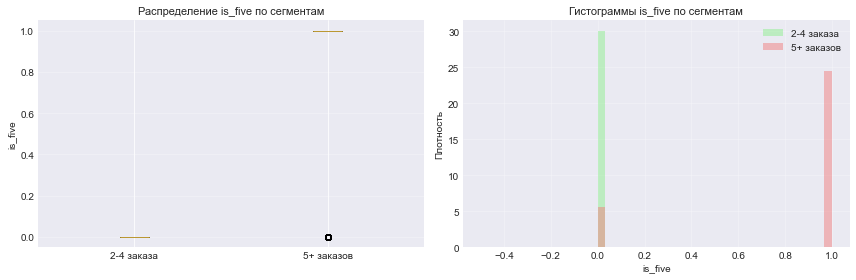

   Статистическая проверка различий:
   ANOVA: F = 61159.4023, p-value = 0.0000
   ✓ Статистически значимые различия между сегментами

3. avg_tickets_per_order:
   Тип: числовой
   Статистика по сегментам:
   Сегмент         | Среднее      | Медиана      | Ст.откл.     | Кол-во    
   --------------- | ------------ | ------------ | ------------ | ----------
   1 заказ         | nan          | nan          | nan          | 0         
   2-4 заказа      | 2.71         | 3.00         | 0.99         | 13,938    
   5+ заказов      | 2.72         | 2.71         | 0.56         | 7,506     


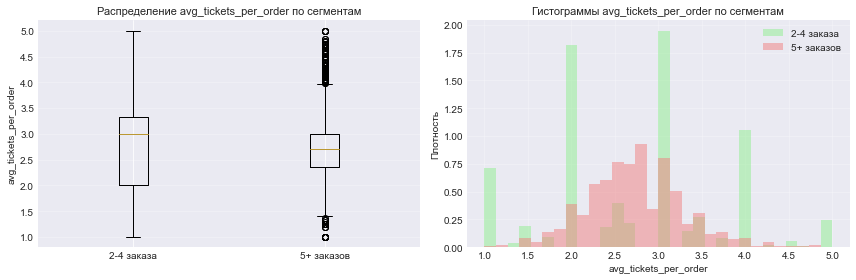

   Статистическая проверка различий:
   ANOVA: F = 1.0235, p-value = 0.3117
   ✗ Нет статистически значимых различий


In [103]:
print("\n" + "="*80)
print("5. Детальный анализ ключевых признаков")
print("="*80)

if len(top_features) > 0:
    # Анализируем топ-3 признака
    top_3_features = list(top_features.head(3).index)
    
    print(f"\nДетальный анализ топ-3 признаков:")
    
    for i, feature in enumerate(top_3_features, 1):
        print(f"\n{i}. {feature}:")
        
        if feature in numeric_features:
            # Числовой признак
            print(f"   Тип: числовой")
            
            # Анализ по сегментам
            segment_stats = analysis_data.groupby('orders_segment')[feature].agg(['mean', 'median', 'std', 'count'])
            
            print(f"   Статистика по сегментам:")
            print(f"   {'Сегмент':<15} | {'Среднее':<12} | {'Медиана':<12} | {'Ст.откл.':<12} | {'Кол-во':<10}")
            print(f"   {'-'*15} | {'-'*12} | {'-'*12} | {'-'*12} | {'-'*10}")
            
            for segment in ['1 заказ', '2-4 заказа', '5+ заказов']:
                if segment in segment_stats.index:
                    stats = segment_stats.loc[segment]
                    print(f"   {segment:<15} | {stats['mean']:<12.2f} | {stats['median']:<12.2f} | "
                          f"{stats['std']:<12.2f} | {int(stats['count']):<10,}")
            
            # Визуализация распределения по сегментам
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))
            
            # Боксплот
            data_to_plot = []
            labels = []
            for segment in ['1 заказ', '2-4 заказа', '5+ заказов']:
                segment_data = analysis_data[analysis_data['orders_segment'] == segment][feature].dropna()
                if len(segment_data) > 0:
                    data_to_plot.append(segment_data)
                    labels.append(segment)
            
            axes[0].boxplot(data_to_plot, labels=labels)
            axes[0].set_title(f'Распределение {feature} по сегментам', fontsize=11)
            axes[0].set_ylabel(feature, fontsize=10)
            axes[0].grid(True, alpha=0.3, axis='y')
            
            # Гистограммы
            colors = ['lightblue', 'lightgreen', 'lightcoral']
            for j, segment in enumerate(['1 заказ', '2-4 заказа', '5+ заказов']):
                segment_data = analysis_data[analysis_data['orders_segment'] == segment][feature].dropna()
                if len(segment_data) > 0:
                    axes[1].hist(segment_data, bins=30, alpha=0.5, color=colors[j], 
                               label=segment, density=True)
            
            axes[1].set_title(f'Гистограммы {feature} по сегментам', fontsize=11)
            axes[1].set_xlabel(feature, fontsize=10)
            axes[1].set_ylabel('Плотность', fontsize=10)
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
        else:
            # Категориальный признак
            print(f"   Тип: категориальный")
            
            # Анализ распределения по сегментам
            cross_tab = pd.crosstab(analysis_data['orders_segment'], 
                                  analysis_data[feature], 
                                  normalize='index') * 100
            
            print(f"   Распределение по сегментам (%):")
            print(cross_tab.round(1))
            
            # Визуализация
            cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), 
                          colormap='Set3', edgecolor='black')
            plt.title(f'Распределение {feature} по сегментам заказов', 
                     fontsize=12, fontweight='bold')
            plt.xlabel('Сегмент заказов', fontsize=11)
            plt.ylabel('Доля, %', fontsize=11)
            plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(True, alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()
            
        # Статистический тест
        print(f"   Статистическая проверка различий:")
        
        from scipy import stats
        
        # Для числовых признаков - ANOVA
        if feature in numeric_features:
            groups = []
            for segment in ['1 заказ', '2-4 заказа', '5+ заказов']:
                group_data = analysis_data[analysis_data['orders_segment'] == segment][feature].dropna()
                if len(group_data) > 0:
                    groups.append(group_data)
            
            if len(groups) >= 2:
                f_stat, p_value = stats.f_oneway(*groups)
                print(f"   ANOVA: F = {f_stat:.4f}, p-value = {p_value:.4f}")
                
                if p_value < 0.05:
                    print(f"   ✓ Статистически значимые различия между сегментами")
                else:
                    print(f"   ✗ Нет статистически значимых различий")
        
        # Для категориальных - хи-квадрат
        else:
            contingency_table = pd.crosstab(analysis_data['orders_segment'], 
                                          analysis_data[feature])
            
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            print(f"   Хи-квадрат: χ² = {chi2_stat:.4f}, p-value = {p_value:.4f}")
            
            if p_value < 0.05:
                print(f"   ✓ Статистически значимая связь с сегментами")
            else:
                print(f"   ✗ Нет статистически значимой связи")


7. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ: Тепловая карта корреляций


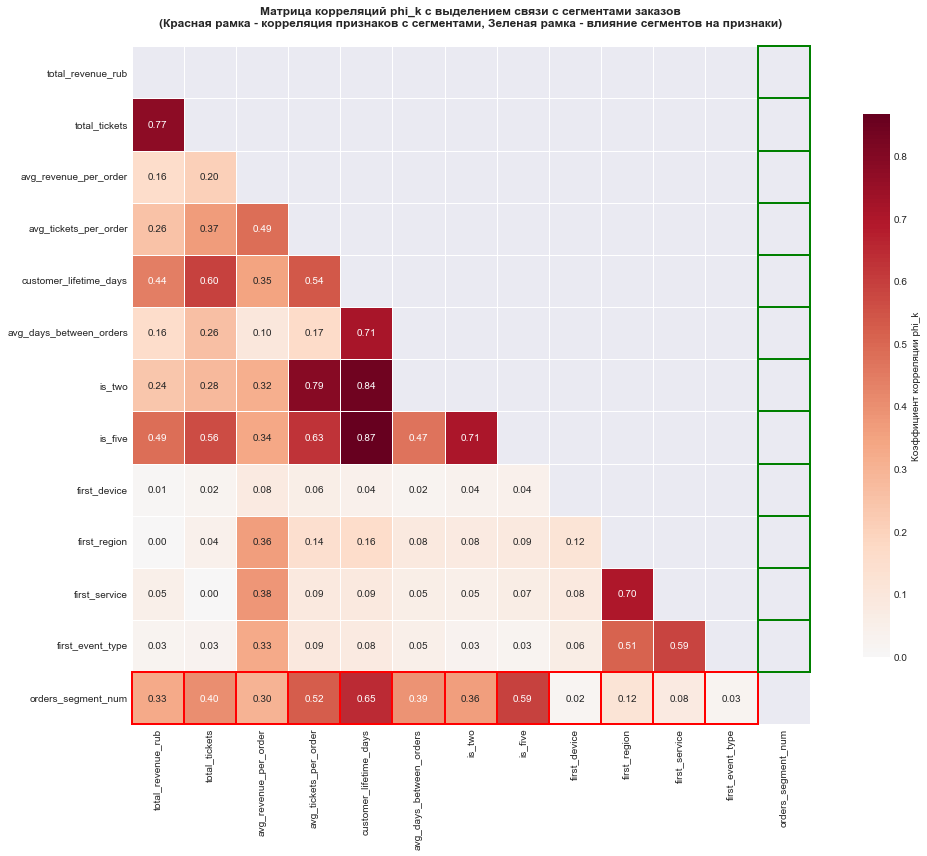


✓ Анализ завершен.


In [104]:
print("\n" + "="*80)
print("7. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ: Тепловая карта корреляций")
print("="*80)

# Создаем финальную тепловую карту с выделением
plt.figure(figsize=(16, 12))

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(phi_k_matrix_segmented, dtype=bool))

# Создаем heatmap
ax = sns.heatmap(phi_k_matrix_segmented, 
                 mask=mask,
                 annot=True, 
                 fmt='.2f',
                 cmap='RdBu_r',
                 center=0,
                 square=True,
                 linewidths=0.5,
                 cbar_kws={'shrink': 0.8, 'label': 'Коэффициент корреляции phi_k'})

# Выделяем строку с orders_segment_num
if 'orders_segment_num' in phi_k_matrix_segmented.columns:
    idx = list(phi_k_matrix_segmented.columns).index('orders_segment_num')
    
    # Выделяем строку
    for i in range(len(phi_k_matrix_segmented.columns)):
        if i != idx:  # Не выделяем пересечение с самим собой
            ax.add_patch(plt.Rectangle((i, idx), 1, 1, fill=False, 
                                      edgecolor='red', lw=2, clip_on=False))
    
    # Выделяем столбец
    for i in range(len(phi_k_matrix_segmented.index)):
        if i != idx:  # Не выделяем пересечение с самим собой
            ax.add_patch(plt.Rectangle((idx, i), 1, 1, fill=False, 
                                      edgecolor='green', lw=2, clip_on=False))

plt.title('Матрица корреляций phi_k с выделением связи с сегментами заказов\n(Красная рамка - корреляция признаков с сегментами, Зеленая рамка - влияние сегментов на признаки)', 
          fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Анализ завершен.")

Наиболее связаны с количеством заказов:

customer_lifetime_days (0.6475) - время жизни клиента

is_five (0.5909) - индикатор высокой лояльности

avg_tickets_per_order (0.5213) - стабильность поведения

total_tickets (0.4017) - общий объём покупок

avg_days_between_orders (0.3917) - регулярность покупок

Практически не связаны:

Характеристики первого заказа (устройство, мероприятие, оператор)

Регион имеет минимальное влияние

Ключевой вывод: Поведение клиента во времени важнее обстоятельств первого заказа.

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

1. ПОДГОТОВКА ДАННЫХ
Конвертация валюты: 5,069 заказов в тенге (1.74% от 290,611) переведены в рубли по историческим курсам

Фильтрация выбросов: Удалены аномалии в revenue_rub по 99 перцентилю (2,628 руб), отфильтровано 2,825 записей (0.97%)

Обработка пропусков: Пропуски только в days_since_prev (21,933 записи, 7.55%) — соответствуют первым заказам

Типы данных: Оптимизированы для экономии памяти, строки приведены к нижнему регистру

2. ПРОФИЛЬ ПОЛЬЗОВАТЕЛЯ (21,854 пользователя)
Лояльность: 61.7% пользователей совершили 2+ заказа, 29.0% — 5+ заказов

Распределение: Сильно асимметрично — медиана 2 заказа при среднем 13.17

Первый заказ: 82.9% с мобильных, 44.1% на концерты, 32.8% из Каменевского региона

Время между заказами: Медиана 8 дней, среднее 15.6 дней

3. КЛЮЧЕВЫЕ НАХОДКИ
3.1. Точки входа и возвраты
Мобильные устройства — основной канал привлечения (82.9%), но десктоп-пользователи более лояльны (+2.5%)

Концерты — главный драйвер привлечения (44.4%), но выставки и театр показывают лучшую лояльность

Регионы: Шанырский регион (+5.6% к среднему) и Светополянский округ (+4.1%) — самые лояльные

Билетные операторы: "Дом культуры" и "Край билетов" привлекают наиболее лояльных клиентов

3.2. Выручка и поведение
Средняя выручка за заказ: 518 руб (одинакова для всех групп)

Концентрация:

Один заказ: поляризация (много очень дешевых + много дорогих)

2+ заказа: сфокусированы в "золотой середине" (300-1000 руб)

Билеты: Оптимальный диапазон 2-5 билетов (86.5% пользователей)

3.3. Временные паттерны
День недели: Понедельник, Суббота (+1.5-1.6%) — лучшие дни для первого заказа

Интервалы: Лояльные пользователи (5+) покупают стабильно каждые 3-14 дней

Время жизни: Сильнейший предиктор лояльности (корреляция 0.65)

3.4. Корреляционный анализ
Сильнее всего связаны: время жизни клиента (0.65), индикатор 5+ заказов (0.59), среднее количество билетов (0.52)

Слабо связаны: характеристики первого заказа (устройство, мероприятие, оператор < 0.03)

Ключевой инсайт: Поведение клиента во времени важнее обстоятельств первого заказа

4. ОПРОВЕРГНУТЫЕ ГИПОТЕЗЫ
Спорт vs Концерты: Спортивные мероприятия показывают на 5.9% меньшую лояльность

Активные регионы: Действительно более лояльны (+4.1%)

5. РЕКОМЕНДАЦИИ
Приоритетные направления:
Удержание десктоп-пользователей — наиболее лояльная группа (+2.5%)

Развитие выставок и театра — высокий потенциал лояльности

Фокус на Шанырский регион и Светополянский округ — лидеры по возвратам

Партнерство с "Домом культуры" и "Краем билетов" — качественный трафик

Тактические действия:
Сегментация по поведению: Выделить "золотую середину" (300-1000 руб, 2-5 билетов)

Таргетирование по дням: Акцент на привлечение в понедельник и субботу

Программы лояльности: Для пользователей с интервалом 3-14 дней

Мониторинг времени жизни: Ключевой метрикой сделать customer_lifetime_days

Риски и ограничения:
Сильная асимметрия данных — небольшая группа генерирует непропорциональный объем

Сезонность данных (только лето-осень 2024)

Региональная концентрация (топ-3 региона = 55.8% пользователей)

Вывод: Успех зависит не от того, как клиент пришел, а от того, как он ведет себя после первого заказа. Фокус на удержании и развитии повторных покупок.

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.